In [1]:
import os 
import glob 
import json 


directories = paths = ["/data0/shypula/prog_diversity/all_experiments/Open_Ended_Reevaluation_EAD_Open_and_Commercial_2024-08-02_16-02-07/", 
                        "/data1/shypula/prog_diversity/all_experiments/OpenEndedCommercialV3_2024-08-09_02-28-20/"]


key_columns = ["all_semantic_count_wcoh_nonempty_woutput", "all_average_cosine_distance_programs", "all_average_cosine_distance_raw", 
               "all_average_cosine_distance_programs_zero_null", 
               "all_ead_4_bootstrap", "all_stripped_subtrees_4_bootstrap", 
               "generations", "extracted_programs", "experiment_name", "problem_id"]


def read_tsv_file(file_path):
    """
    Read a TSV file and return all key-value pairs as a dictionary.
    """
    result_dict = {}
    with open(file_path, 'r') as f:
        for line in f:
            key, value = line.strip().split('\t')
            result_dict[key] = value
    return result_dict


experiment_dirs = []
for directory in directories:
    ds = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    ds = [os.path.join(directory, d) for d in ds]
    experiment_dirs.extend(ds)

all_results = []

from tqdm import tqdm
    
pbar = tqdm(total=len(experiment_dirs))
for i, directory in enumerate(experiment_dirs):
    # results_tsvs = glob.glob(os.path.join(directory, "p*", "result.tsv"))
    # if i < 5:
    #     print(f"Found {len(results_tsvs)} result.tsv files in {directory}")
    
    # for tsv_path in results_tsvs:
    #     result = read_tsv_file(tsv_path)
    #     all_results.append(result)
    experiment_name = os.path.basename(directory)
    problem_dirs = glob.glob(os.path.join(directory, "p*"))
    for problem_dir in problem_dirs:
        problem_id = os.path.basename(problem_dir)
        tsv_path = os.path.join(problem_dir, "result.tsv")
        result = read_tsv_file(tsv_path)
        generation_paths = glob.glob(os.path.join(problem_dir, "generated", "gen_*.txt"))
        extracted_program_paths = glob.glob(os.path.join(problem_dir, "generated", "prog_*.txt"))
        assert len(generation_paths) == len(extracted_program_paths) == 100, f"Expected 100 generations and extracted programs, but found {len(generation_paths)} generations and {len(extracted_program_paths)} extracted programs in {problem_dir}"
        generations = []
        extracted_programs = []
        for gen_path in generation_paths:
            with open(gen_path, 'r') as f:
                generations.append(f.read().strip())
        for prog_path in extracted_program_paths:
            with open(prog_path, 'r') as f:
                extracted_programs.append(f.read().strip())
        result["experiment_name"] = experiment_name 
        result["problem_id"] = problem_id
        result["generations"] = generations
        result["extracted_programs"] = extracted_programs
        
        all_results.append(result)
    pbar.update(1)
                
        
        
    
filtered_result_dicts = [{k: v for k, v in result.items() if k in key_columns} for result in all_results]        
    
    
    


  0%|          | 0/99 [00:00<?, ?it/s]

 99%|█████████▉| 98/99 [00:10<00:00, 11.81it/s]

In [2]:
print(len(filtered_result_dicts))
print(filtered_result_dicts[0])
for k, v in filtered_result_dicts[0].items():
    if k == "generations" or k == "extracted_programs":
        print(k, f"({len(v)} generations)")
    

2037
{'all_semantic_count_wcoh_nonempty_woutput': '0', 'all_average_cosine_distance_programs': '0.13482898473739624', 'all_average_cosine_distance_raw': '0.0870131328701973', 'all_average_cosine_distance_programs_zero_null': '0.12457308918237686', 'all_ead_4_bootstrap': '0.9033094657355264', 'all_stripped_subtrees_4_bootstrap': '0.9179964390448261', 'experiment_name': 'meta-llama-Meta-Llama-3-8B_temp_1.0_top_p_1.0_num_return_sequences_100_open_ended_default', 'problem_id': 'problem_p00050', 'generations': ['', "INPUT and OUTPUT format of ANY solution is important!!!\n\n### Output Description:\n\nPrint all the fruits in the text (count just once), they will always be separated by at least one space. There is no other info or annotation (regarding the fruits) in the text. They will be separated by whitespaces (spaces or newlines), but nothing else. \n\nThe order of fruits Does NOT matter in the answer.\n\nIgnore the meaning of white characters that are not spaces or newlines.\n```\n'Mac'

In [3]:
! pip install code-bert-score

In [5]:
# import code_bert_score
# prediction_idx = 0
# ref_idx = 1
# non_empty_results = [p for p in filtered_result_dicts[0]["extracted_programs"] if p.strip() != ""]
# print(f"Found {len(non_empty_results)} non-empty programs out of {len(filtered_result_dicts[0]['extracted_programs'])} total programs")

# predictions = [non_empty_results[prediction_idx]]
# references = [non_empty_results[ref_idx]]

# print(f"----------- Prediction -----------")
# print(f"Prediction: {predictions[0]}")
# print(f"----------- Reference -----------")
# print(f"Reference: {references[0]}")


# pred_results = code_bert_score.score(cands=predictions,
#                                      refs=references,
#                                      no_punc=True, lang='python')

# print("----------- CodeBERT Score -----------")
# print(f'Prediction precision: {pred_results[0][0]:.3f}, recall: {pred_results[1][0]:.3f}, f1: {pred_results[2][0]:.3f}, f3: {pred_results[3][0]:.3f}')

/data0/bzhang16/anaconda3/envs/diversity2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 39 non-empty programs out of 100 total programs
----------- Prediction -----------
Prediction: ### Output Description:




'Mac'








### Example Output:



### Test Output:
Input:  'peach apple' 

Output: 'peach, apple'

Input: 'banana cherry melon'
Output: 'banana, cherry, melon'

Input: 'apple peach banana'
Output: 'apple, banana, peach'

Input: 'banana cherry melon pineapple papaya watermelon'
Output: 'apple, banana, cherry, melon, papaya, peach, pineapple, watermelon'
----------- Reference -----------
Reference: ### Output Description:
"The cost is apples and pears overall"
"The cost of a peach is 1.25 times that of an apple."

print("\n\n\n")


tv=psutil.virtual_memory()

print(tv.total)
print(tv.used)
print(tv.free)
print(tv.percenDetail)

print(sys.getsizeof((True)))

cursor_row_results = json.loads(cursor_row_results)
print(type(cursor_row_results))


/data0/bzhang16/anaconda3/envs/diversity2/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/data0/bzhang16/anaconda3/envs/diversity2/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


----------- CodeBERT Score -----------
Prediction precision: 0.709, recall: 0.641, f1: 0.673, f3: 0.647


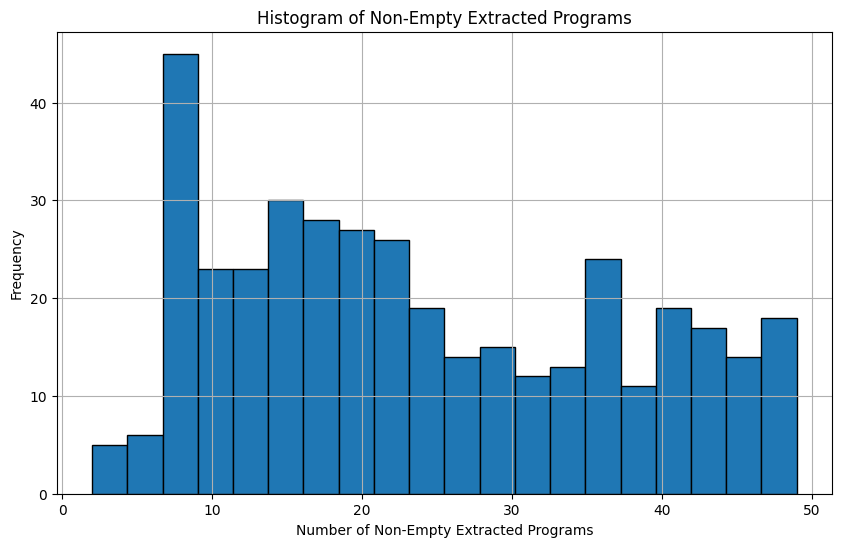

In [57]:
import matplotlib.pyplot as plt

program_counts = [len([p for p in sample["extracted_programs"] if p.strip() != ""]) for sample in filtered_result_dicts]

plt.figure(figsize=(10, 6))
plt.hist(program_counts, bins=20, edgecolor='black')
plt.title('Histogram of Non-Empty Extracted Programs')
plt.xlabel('Number of Non-Empty Extracted Programs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [56]:
import random
import code_bert_score
import numpy as np
from datetime import datetime

filtered_result_dicts = [
    sample for sample in filtered_result_dicts if len([p for p in sample["extracted_programs"] if p.strip() != ""]) > 0
]
max_num_programs = max(len([p for p in sample["extracted_programs"] if p.strip() != ""]) for sample in filtered_result_dicts)
print(f"Num of non-empty program examples: {len(filtered_result_dicts)} (max={max_num_programs})")

instruct_filtered_result_dicts = []
base_filtered_result_dicts = []
commercial_filtered_result_dicts = []
for sample in filtered_result_dicts:
    if "llama" in sample["experiment_name"].lower() and "instruct" in sample["experiment_name"].lower():
        instruct_filtered_result_dicts.append(sample)
    elif "llama" in sample["experiment_name"].lower():
        base_filtered_result_dicts.append(sample)
    else:
        commercial_filtered_result_dicts.append(sample)
print(len(instruct_filtered_result_dicts), len(base_filtered_result_dicts), len(commercial_filtered_result_dicts))
subsampled_result_dicts = random.sample(instruct_filtered_result_dicts, 10)
subsampled_result_dicts.extend(random.sample(base_filtered_result_dicts, 10))
subsampled_result_dicts.extend(random.sample(commercial_filtered_result_dicts, 10))

max_num_programs = max(len([p for p in sample["extracted_programs"] if p.strip() != ""]) for sample in subsampled_result_dicts)
print(f"Selected {len(subsampled_result_dicts)} samples (max={max_num_programs}).")
print(subsampled_result_dicts[29])

Results successfully saved to 389_result_dicts_programs_only_20240918_173530.json


In [53]:
pbar = tqdm(total=len(subsampled_result_dicts))
for sample in tqdm(subsampled_result_dicts, desc="Processing samples", unit="sample"):
    extracted_programs = sample["extracted_programs"]

    non_empty_programs = [p for p in extracted_programs if p.strip() != ""]

    if len(non_empty_programs) < 2:
        sample["avg_code_bert_extracted_programs_f1"] = None
        sample["avg_code_bert_extracted_programs_precision"] = None
        sample["avg_code_bert_extracted_programs_recall"] = None
        continue

    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Calculate average CodeBERT score for programs
    for i in range(len(non_empty_programs)):
        for j in range(len(non_empty_programs)):
            if i != j:
                predictions = [non_empty_programs[i]]
                references = [non_empty_programs[j]]

                score_results = code_bert_score.score(cands=predictions,
                                                      refs=references,
                                                      no_punc=True,
                                                      lang='python')
                
                precision_scores.append(score_results[0].item())  # Precision
                recall_scores.append(score_results[1].item())     # Recall
                f1_scores.append(score_results[2].item())         # F1 Score
                print(f"{i}/{len(non_empty_programs)} x {j}/{len(non_empty_programs)}:")
                print(f"Precision = {score_results[0].item()}")
                print(f"Recall = {score_results[1].item()}")
                print(f"F1 = {score_results[2].item()}")

    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    sample["avg_code_bert_extracted_programs_precision"] = avg_precision
    sample["avg_code_bert_extracted_programs_recall"] = avg_recall
    sample["avg_code_bert_extracted_programs_f1"] = avg_f1
    pbar.update(1)

 13%|█▎        | 13/100 [2:46:02<18:31:11, 766.33s/it]
/data0/bzhang16/anaconda3/envs/diversity2/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


0/17 x 1/17:
Precision = 0.7423171401023865
Recall = 0.822594940662384
F1 = 0.7803969979286194
0/17 x 2/17:
Precision = 0.6959090232849121
Recall = 0.848447322845459
F1 = 0.7646449208259583
0/17 x 3/17:
Precision = 0.6132568120956421
Recall = 0.8646714687347412
F1 = 0.71757972240448
0/17 x 4/17:
Precision = 0.7190508246421814
Recall = 0.8030413389205933
F1 = 0.7587288022041321
0/17 x 5/17:
Precision = 0.45557624101638794
Recall = 0.5965447425842285
F1 = 0.516616702079773
0/17 x 6/17:
Precision = 0.8142890930175781
Recall = 0.6832860112190247
F1 = 0.7430577278137207
0/17 x 7/17:
Precision = 0.746019721031189
Recall = 0.8241738080978394
F1 = 0.7831517457962036
0/17 x 8/17:
Precision = 0.7798607349395752
Recall = 0.6496493220329285
F1 = 0.7088246941566467
0/17 x 9/17:
Precision = 0.6620475053787231
Recall = 0.7925973534584045
F1 = 0.721464216709137
0/17 x 10/17:
Precision = 0.7511925101280212
Recall = 0.7924375534057617
F1 = 0.7712639570236206
0/17 x 11/17:
Precision = 0.658612847328186
R

  3%|▎         | 1/30 [02:34<1:14:33, 154.25s/it]

16/17 x 15/17:
Precision = 0.6449872255325317
Recall = 0.6647256016731262
F1 = 0.654707670211792
0/14 x 1/14:
Precision = 0.7316163182258606
Recall = 0.5853582620620728
F1 = 0.6503658294677734
0/14 x 2/14:
Precision = 0.6591886281967163
Recall = 0.719062089920044
F1 = 0.6878248453140259
0/14 x 3/14:
Precision = 0.7743790149688721
Recall = 0.6298309564590454
F1 = 0.6946651935577393
0/14 x 4/14:
Precision = 0.6252793073654175
Recall = 0.7880687713623047
F1 = 0.6972990036010742
0/14 x 5/14:
Precision = 0.8252632021903992
Recall = 0.613825798034668
F1 = 0.7040117979049683
0/14 x 6/14:
Precision = 0.7552893161773682
Recall = 0.6998869180679321
F1 = 0.7265334129333496
0/14 x 7/14:
Precision = 0.8022215366363525
Recall = 0.6447731852531433
F1 = 0.714931309223175
0/14 x 8/14:
Precision = 0.7313109636306763
Recall = 0.609679102897644
F1 = 0.6649788618087769
0/14 x 9/14:
Precision = 0.7920082211494446
Recall = 0.6665875911712646
F1 = 0.723905622959137
0/14 x 10/14:
Precision = 0.7789139151573181

  7%|▋         | 2/30 [04:15<57:24, 123.02s/it]  

13/14 x 12/14:
Precision = 0.8176975250244141
Recall = 0.6930938363075256
F1 = 0.7502573132514954
0/19 x 1/19:
Precision = 0.6431315541267395
Recall = 0.6021537184715271
F1 = 0.6219683885574341
0/19 x 2/19:
Precision = 0.697991132736206
Recall = 0.6354479789733887
F1 = 0.6652528047561646
0/19 x 3/19:
Precision = 0.5506013631820679
Recall = 0.6392807960510254
F1 = 0.5916365385055542


0/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
0/19 x 5/19:
Precision = 0.7027929425239563
Recall = 0.7283318042755127
F1 = 0.7153345346450806
0/19 x 6/19:
Precision = 0.5850886106491089
Recall = 0.9288913607597351
F1 = 0.7179536819458008
0/19 x 7/19:
Precision = 0.6450154781341553
Recall = 0.6613326072692871
F1 = 0.6530721187591553
0/19 x 8/19:
Precision = 0.6488234996795654
Recall = 0.6491225957870483
F1 = 0.6489730477333069
0/19 x 9/19:
Precision = 0.5680721402168274
Recall = 0.6225135326385498
F1 = 0.5940481424331665
0/19 x 10/19:
Precision = 0.5959317684173584
Recall = 0.649100661277771
F1 = 0.6213809251785278
0/19 x 11/19:
Precision = 0.5850886106491089
Recall = 0.9288913607597351
F1 = 0.7179536819458008
0/19 x 12/19:
Precision = 0.5020586252212524
Recall = 0.6020344495773315
F1 = 0.547520101070404
0/19 x 13/19:
Precision = 0.6371501684188843
Recall = 0.6571992635726929
F1 = 0.6470194458961487
0/19 x 14/19:
Precision = 0.6472153663635254
Recall = 0.6431810855865479
F1 = 0.645

1/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
1/19 x 5/19:
Precision = 0.5927399396896362
Recall = 0.6428955793380737
F1 = 0.6167998313903809
1/19 x 6/19:
Precision = 0.4788241386413574
Recall = 0.5976433753967285
F1 = 0.531676173210144
1/19 x 7/19:
Precision = 0.6078580021858215
Recall = 0.6446736454963684
F1 = 0.625724732875824
1/19 x 8/19:
Precision = 0.6165333986282349
Recall = 0.6489236354827881
F1 = 0.6323139667510986
1/19 x 9/19:
Precision = 0.5085484981536865
Recall = 0.6292850971221924
F1 = 0.5625110268592834
1/19 x 10/19:
Precision = 0.5408644676208496
Recall = 0.6312497854232788
F1 = 0.5825722217559814
1/19 x 11/19:
Precision = 0.4788241386413574
Recall = 0.5976433753967285
F1 = 0.531676173210144
1/19 x 12/19:
Precision = 0.4509139657020569
Recall = 0.6217934489250183
F1 = 0.5227434039115906
1/19 x 13/19:
Precision = 0.5840126872062683
Recall = 0.6319868564605713
F1 = 0.6070533990859985
1/19 x 14/19:
Precision = 0.6305685043334961
Recall = 0.6507329344749451
F1 = 0.6404

2/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
2/19 x 5/19:
Precision = 0.6171115636825562
Recall = 0.7029715776443481
F1 = 0.657249391078949
2/19 x 6/19:
Precision = 0.5089214444160461
Recall = 0.9114063382148743
F1 = 0.6531368494033813
2/19 x 7/19:
Precision = 0.6110082864761353
Recall = 0.6532262563705444
F1 = 0.6314123272895813
2/19 x 8/19:
Precision = 0.6275094747543335
Recall = 0.6634576916694641
F1 = 0.6449830532073975
2/19 x 9/19:
Precision = 0.5219030380249023
Recall = 0.6342297196388245
F1 = 0.5726097226142883
2/19 x 10/19:
Precision = 0.5491477847099304
Recall = 0.6313053965568542
F1 = 0.587367594242096
2/19 x 11/19:
Precision = 0.5089214444160461
Recall = 0.9114063382148743
F1 = 0.6531368494033813
2/19 x 12/19:
Precision = 0.4635281562805176
Recall = 0.6086245775222778
F1 = 0.5262582898139954
2/19 x 13/19:
Precision = 0.6046060919761658
Recall = 0.6559485197067261
F1 = 0.6292317509651184
2/19 x 14/19:
Precision = 0.6360068321228027
Recall = 0.6633684039115906
F1 = 0.649

3/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
3/19 x 5/19:
Precision = 0.6425255537033081
Recall = 0.5585169196128845
F1 = 0.5975831747055054
3/19 x 6/19:
Precision = 0.6089426279067993
Recall = 0.5791164636611938
F1 = 0.5936551690101624
3/19 x 7/19:
Precision = 0.6553342342376709
Recall = 0.5707286596298218
F1 = 0.6101123094558716
3/19 x 8/19:
Precision = 0.6280683875083923
Recall = 0.5385419726371765
F1 = 0.5798700451850891
3/19 x 9/19:
Precision = 0.6765189170837402
Recall = 0.6467624306678772
F1 = 0.6613061428070068
3/19 x 10/19:
Precision = 0.6523600816726685
Recall = 0.6143707036972046
F1 = 0.6327957510948181
3/19 x 11/19:
Precision = 0.6089426279067993
Recall = 0.5791164636611938
F1 = 0.5936551690101624
3/19 x 12/19:
Precision = 0.6603302359580994
Recall = 0.6869387030601501
F1 = 0.6733717322349548
3/19 x 13/19:
Precision = 0.6492267847061157
Recall = 0.5579732656478882
F1 = 0.6001510620117188
3/19 x 14/19:
Precision = 0.605285108089447
Recall = 0.5284063220024109
F1 = 0.56

4/19 x 0/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 1/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 2/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 3/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 5/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 6/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 7/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 8/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 9/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 10/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 11/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 12/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 13/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 14/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 15/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 16/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 17/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/19 x 18/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
5/19 x 0/19:
Precision = 0.7283318042755127
Recall = 0.7027929425239563
F1 = 0.7153345346450806
5/19 x 1/19:
Precision = 0.6428955793380737
Recall = 0.5927399396896362
F1 = 0.6167998313903809
5/19 x 2/19:
Precision = 0.7029715776443481
Recall = 0.6171115636825562
F1 = 0.657249391078949
5/19 x 3/19:
Precision = 0.5585169196128845
Recall = 0.6425255537033081
F1 = 0.5975831747055054


5/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
5/19 x 6/19:
Precision = 0.6286389827728271
Recall = 0.9103784561157227
F1 = 0.7437204122543335
5/19 x 7/19:
Precision = 0.642298698425293
Recall = 0.646937370300293
F1 = 0.6446096897125244
5/19 x 8/19:
Precision = 0.6439961194992065
Recall = 0.650365948677063
F1 = 0.6471653580665588
5/19 x 9/19:
Precision = 0.5818423628807068
Recall = 0.6279252171516418
F1 = 0.6040061116218567
5/19 x 10/19:
Precision = 0.6222546100616455
Recall = 0.6745576858520508
F1 = 0.6473514437675476
5/19 x 11/19:
Precision = 0.6286389827728271
Recall = 0.9103784561157227
F1 = 0.7437204122543335
5/19 x 12/19:
Precision = 0.512455403804779
Recall = 0.5805215835571289
F1 = 0.5443690419197083
5/19 x 13/19:
Precision = 0.6223760843276978
Recall = 0.628223717212677
F1 = 0.6252862215042114
5/19 x 14/19:
Precision = 0.6510228514671326
Recall = 0.6268733739852905
F1 = 0.6387199759483337
5/19 x 15/19:
Precision = 0.6286389827728271
Recall = 0.9103784561157227
F1 = 0.74372

6/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
6/19 x 5/19:
Precision = 0.9103784561157227
Recall = 0.6286390423774719
F1 = 0.743720531463623
6/19 x 7/19:
Precision = 0.5879043936729431
Recall = 0.5394684076309204
F1 = 0.5626459121704102
6/19 x 8/19:
Precision = 0.5806934237480164
Recall = 0.5242745876312256
F1 = 0.5510436296463013
6/19 x 9/19:
Precision = 0.5917574763298035
Recall = 0.6052794456481934
F1 = 0.5984420776367188
6/19 x 10/19:
Precision = 0.5934042930603027
Recall = 0.5731700658798218
F1 = 0.5831117033958435
6/19 x 11/19:
Precision = 1.0
Recall = 1.0
F1 = 1.0
6/19 x 12/19:
Precision = 0.5404275059700012
Recall = 0.5875918865203857
F1 = 0.5630236864089966
6/19 x 13/19:
Precision = 0.6018559336662292
Recall = 0.5354675054550171
F1 = 0.5667241215705872
6/19 x 14/19:
Precision = 0.60148686170578
Recall = 0.5110023021697998
F1 = 0.552564799785614
6/19 x 15/19:
Precision = 1.0
Recall = 1.0
F1 = 1.0
6/19 x 16/19:
Precision = 0.5598498582839966
Recall = 0.6236695051193237
F1 =

7/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
7/19 x 5/19:
Precision = 0.646937370300293
Recall = 0.642298698425293
F1 = 0.6446096897125244
7/19 x 6/19:
Precision = 0.5394684076309204
Recall = 0.5879043936729431
F1 = 0.5626459121704102
7/19 x 8/19:
Precision = 0.6425995826721191
Recall = 0.6436593532562256
F1 = 0.6431290507316589
7/19 x 9/19:
Precision = 0.6079789996147156
Recall = 0.6610507369041443
F1 = 0.6334051489830017
7/19 x 10/19:
Precision = 0.6346333622932434
Recall = 0.6612415313720703
F1 = 0.6476643085479736
7/19 x 11/19:
Precision = 0.5394684076309204
Recall = 0.5879043936729431
F1 = 0.5626459121704102
7/19 x 12/19:
Precision = 0.5396014451980591
Recall = 0.6561399102210999
F1 = 0.5921916365623474
7/19 x 13/19:
Precision = 0.6472915410995483
Recall = 0.6498813033103943
F1 = 0.6485838890075684
7/19 x 14/19:
Precision = 0.6515293121337891
Recall = 0.6342619061470032
F1 = 0.6427797079086304
7/19 x 15/19:
Precision = 0.5394684076309204
Recall = 0.5879043936729431
F1 = 0.56

8/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
8/19 x 5/19:
Precision = 0.650365948677063
Recall = 0.6439961194992065
F1 = 0.6471653580665588
8/19 x 6/19:
Precision = 0.5242745876312256
Recall = 0.5806933641433716
F1 = 0.5510436296463013
8/19 x 7/19:
Precision = 0.6436593532562256
Recall = 0.6425995826721191
F1 = 0.6431290507316589
8/19 x 9/19:
Precision = 0.5814052224159241
Recall = 0.6606912016868591
F1 = 0.6185176968574524
8/19 x 10/19:
Precision = 0.6039322018623352
Recall = 0.6580128073692322
F1 = 0.6298137307167053
8/19 x 11/19:
Precision = 0.5242745876312256
Recall = 0.5806933641433716
F1 = 0.5510436296463013
8/19 x 12/19:
Precision = 0.495013952255249
Recall = 0.6029191017150879
F1 = 0.5436640381813049
8/19 x 13/19:
Precision = 0.6397194862365723
Recall = 0.6549724340438843
F1 = 0.6472561359405518
8/19 x 14/19:
Precision = 0.6451101303100586
Recall = 0.6331276297569275
F1 = 0.6390627026557922
8/19 x 15/19:
Precision = 0.5242745876312256
Recall = 0.5806933641433716
F1 = 0.55

9/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
9/19 x 5/19:
Precision = 0.6279252171516418
Recall = 0.5818423628807068
F1 = 0.6040061116218567
9/19 x 6/19:
Precision = 0.6052794456481934
Recall = 0.5917574763298035
F1 = 0.5984420776367188
9/19 x 7/19:
Precision = 0.6610507369041443
Recall = 0.6079789996147156
F1 = 0.6334051489830017
9/19 x 8/19:
Precision = 0.6606911420822144
Recall = 0.5814051628112793
F1 = 0.6185176372528076
9/19 x 10/19:
Precision = 0.7141878008842468
Recall = 0.6743941903114319
F1 = 0.6937207579612732
9/19 x 11/19:
Precision = 0.6052794456481934
Recall = 0.5917574763298035
F1 = 0.5984420776367188
9/19 x 12/19:
Precision = 0.6606169939041138
Recall = 0.7337703704833984
F1 = 0.6952747702598572
9/19 x 13/19:
Precision = 0.6447420716285706
Recall = 0.5821934342384338
F1 = 0.6118733882904053
9/19 x 14/19:
Precision = 0.6230487823486328
Recall = 0.5569707155227661
F1 = 0.5881596803665161
9/19 x 15/19:
Precision = 0.6052794456481934
Recall = 0.5917574763298035
F1 = 0.

10/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
10/19 x 5/19:
Precision = 0.6745576858520508
Recall = 0.6222546100616455
F1 = 0.6473514437675476
10/19 x 6/19:
Precision = 0.5731700658798218
Recall = 0.5934042930603027
F1 = 0.5831117033958435
10/19 x 7/19:
Precision = 0.6612415313720703
Recall = 0.6346333622932434
F1 = 0.6476643085479736
10/19 x 8/19:
Precision = 0.658012866973877
Recall = 0.6039322018623352
F1 = 0.6298137307167053
10/19 x 9/19:
Precision = 0.6743941903114319
Recall = 0.7141878008842468
F1 = 0.6937207579612732
10/19 x 11/19:
Precision = 0.5731700658798218
Recall = 0.5934042930603027
F1 = 0.5831117033958435
10/19 x 12/19:
Precision = 0.5818901658058167
Recall = 0.7151060104370117
F1 = 0.641656756401062
10/19 x 13/19:
Precision = 0.6701468229293823
Recall = 0.6214327216148376
F1 = 0.6448711156845093
10/19 x 14/19:
Precision = 0.6227335929870605
Recall = 0.5834360122680664
F1 = 0.6024446487426758
10/19 x 15/19:
Precision = 0.5731700658798218
Recall = 0.5934042930603027

11/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
11/19 x 5/19:
Precision = 0.9103784561157227
Recall = 0.6286390423774719
F1 = 0.743720531463623
11/19 x 6/19:
Precision = 1.0
Recall = 1.0
F1 = 1.0
11/19 x 7/19:
Precision = 0.5879043936729431
Recall = 0.5394684076309204
F1 = 0.5626459121704102
11/19 x 8/19:
Precision = 0.5806934237480164
Recall = 0.5242745876312256
F1 = 0.5510436296463013
11/19 x 9/19:
Precision = 0.5917574763298035
Recall = 0.6052794456481934
F1 = 0.5984420776367188
11/19 x 10/19:
Precision = 0.5934042930603027
Recall = 0.5731700658798218
F1 = 0.5831117033958435
11/19 x 12/19:
Precision = 0.5404275059700012
Recall = 0.5875918865203857
F1 = 0.5630236864089966
11/19 x 13/19:
Precision = 0.6018559336662292
Recall = 0.5354675054550171
F1 = 0.5667241215705872
11/19 x 14/19:
Precision = 0.60148686170578
Recall = 0.5110023021697998
F1 = 0.552564799785614
11/19 x 15/19:
Precision = 1.0
Recall = 1.0
F1 = 1.0
11/19 x 16/19:
Precision = 0.5598498582839966
Recall = 0.6236695051

12/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
12/19 x 5/19:
Precision = 0.5805215239524841
Recall = 0.5124554634094238
F1 = 0.5443690419197083
12/19 x 6/19:
Precision = 0.5875918865203857
Recall = 0.5404275059700012
F1 = 0.5630236864089966
12/19 x 7/19:
Precision = 0.6561399102210999
Recall = 0.5396014451980591
F1 = 0.5921916365623474
12/19 x 8/19:
Precision = 0.6029190421104431
Recall = 0.495013952255249
F1 = 0.5436639785766602
12/19 x 9/19:
Precision = 0.7337703704833984
Recall = 0.6606169939041138
F1 = 0.6952747702598572
12/19 x 10/19:
Precision = 0.7151060104370117
Recall = 0.5818901062011719
F1 = 0.6416566967964172
12/19 x 11/19:
Precision = 0.5875918865203857
Recall = 0.5404275059700012
F1 = 0.5630236864089966
12/19 x 13/19:
Precision = 0.6599490642547607
Recall = 0.5194166302680969
F1 = 0.581309974193573
12/19 x 14/19:
Precision = 0.5887467861175537
Recall = 0.49368178844451904
F1 = 0.5370396971702576
12/19 x 15/19:
Precision = 0.5875918865203857
Recall = 0.540427505970001

13/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
13/19 x 5/19:
Precision = 0.628223717212677
Recall = 0.6223760843276978
F1 = 0.6252862215042114
13/19 x 6/19:
Precision = 0.5354674458503723
Recall = 0.6018559336662292
F1 = 0.5667240619659424
13/19 x 7/19:
Precision = 0.6498813033103943
Recall = 0.6472915410995483
F1 = 0.6485838890075684
13/19 x 8/19:
Precision = 0.6549724340438843
Recall = 0.6397194862365723
F1 = 0.6472561359405518
13/19 x 9/19:
Precision = 0.5821934342384338
Recall = 0.6447421312332153
F1 = 0.6118733882904053
13/19 x 10/19:
Precision = 0.6214327216148376
Recall = 0.6701468229293823
F1 = 0.6448711156845093
13/19 x 11/19:
Precision = 0.5354674458503723
Recall = 0.6018559336662292
F1 = 0.5667240619659424
13/19 x 12/19:
Precision = 0.5194165706634521
Recall = 0.6599490642547607
F1 = 0.581309974193573
13/19 x 14/19:
Precision = 0.6587103605270386
Recall = 0.6304596066474915
F1 = 0.644275426864624
13/19 x 15/19:
Precision = 0.5354674458503723
Recall = 0.6018559336662292


14/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
14/19 x 5/19:
Precision = 0.6268733739852905
Recall = 0.6510228514671326
F1 = 0.6387199759483337
14/19 x 6/19:
Precision = 0.5110023021697998
Recall = 0.6014868021011353
F1 = 0.5525647401809692
14/19 x 7/19:
Precision = 0.6342619061470032
Recall = 0.6515293121337891
F1 = 0.6427797079086304
14/19 x 8/19:
Precision = 0.6331276297569275
Recall = 0.6451101303100586
F1 = 0.6390627026557922
14/19 x 9/19:
Precision = 0.5569707751274109
Recall = 0.623048722743988
F1 = 0.5881596803665161
14/19 x 10/19:
Precision = 0.5834360122680664
Recall = 0.6227335929870605
F1 = 0.6024446487426758
14/19 x 11/19:
Precision = 0.5110023021697998
Recall = 0.6014868021011353
F1 = 0.5525647401809692
14/19 x 12/19:
Precision = 0.49368178844451904
Recall = 0.5887466669082642
F1 = 0.5370396375656128
14/19 x 13/19:
Precision = 0.6304596066474915
Recall = 0.6587103605270386
F1 = 0.644275426864624
14/19 x 15/19:
Precision = 0.5110023021697998
Recall = 0.601486802101135

15/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
15/19 x 5/19:
Precision = 0.9103784561157227
Recall = 0.6286390423774719
F1 = 0.743720531463623
15/19 x 6/19:
Precision = 1.0
Recall = 1.0
F1 = 1.0
15/19 x 7/19:
Precision = 0.5879043936729431
Recall = 0.5394684076309204
F1 = 0.5626459121704102
15/19 x 8/19:
Precision = 0.5806934237480164
Recall = 0.5242745876312256
F1 = 0.5510436296463013
15/19 x 9/19:
Precision = 0.5917574763298035
Recall = 0.6052794456481934
F1 = 0.5984420776367188
15/19 x 10/19:
Precision = 0.5934042930603027
Recall = 0.5731700658798218
F1 = 0.5831117033958435
15/19 x 11/19:
Precision = 1.0
Recall = 1.0
F1 = 1.0
15/19 x 12/19:
Precision = 0.5404275059700012
Recall = 0.5875918865203857
F1 = 0.5630236864089966
15/19 x 13/19:
Precision = 0.6018559336662292
Recall = 0.5354675054550171
F1 = 0.5667241215705872
15/19 x 14/19:
Precision = 0.60148686170578
Recall = 0.5110023021697998
F1 = 0.552564799785614
15/19 x 16/19:
Precision = 0.5598498582839966
Recall = 0.6236695051

16/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
16/19 x 5/19:
Precision = 0.5961352586746216
Recall = 0.5330918431282043
F1 = 0.5628536939620972
16/19 x 6/19:
Precision = 0.6236695051193237
Recall = 0.5598498582839966
F1 = 0.5900390148162842
16/19 x 7/19:
Precision = 0.6280003786087036
Recall = 0.5337399840354919
F1 = 0.5770462155342102
16/19 x 8/19:
Precision = 0.6054399013519287
Recall = 0.5077997446060181
F1 = 0.5523378849029541
16/19 x 9/19:
Precision = 0.6917421221733093
Recall = 0.6609680652618408
F1 = 0.6760050058364868
16/19 x 10/19:
Precision = 0.6841720938682556
Recall = 0.6007300615310669
F1 = 0.6397417187690735
16/19 x 11/19:
Precision = 0.6236695051193237
Recall = 0.5598498582839966
F1 = 0.5900390148162842
16/19 x 12/19:
Precision = 0.644033670425415
Recall = 0.6444770097732544
F1 = 0.6442552804946899
16/19 x 13/19:
Precision = 0.6070916056632996
Recall = 0.5160397291183472
F1 = 0.5578749179840088
16/19 x 14/19:
Precision = 0.5902714729309082
Recall = 0.493556618690490

17/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
17/19 x 5/19:
Precision = 0.6746198534965515
Recall = 0.714654803276062
F1 = 0.6940605044364929
17/19 x 6/19:
Precision = 0.5886581540107727
Recall = 0.9328980445861816
F1 = 0.7218373417854309
17/19 x 7/19:
Precision = 0.6354220509529114
Recall = 0.642886757850647
F1 = 0.639132559299469
17/19 x 8/19:
Precision = 0.6448236703872681
Recall = 0.6519743204116821
F1 = 0.6483793258666992
17/19 x 9/19:
Precision = 0.5810208320617676
Recall = 0.6332200765609741
F1 = 0.6059984564781189
17/19 x 10/19:
Precision = 0.6017000675201416
Recall = 0.6444420218467712
F1 = 0.6223379969596863
17/19 x 11/19:
Precision = 0.5886581540107727
Recall = 0.9328980445861816
F1 = 0.7218373417854309
17/19 x 12/19:
Precision = 0.512233316898346
Recall = 0.6079434156417847
F1 = 0.5559995174407959
17/19 x 13/19:
Precision = 0.6170990467071533
Recall = 0.6305364370346069
F1 = 0.6237453818321228
17/19 x 14/19:
Precision = 0.6329143047332764
Recall = 0.6308619976043701
F

18/19 x 4/19:
Precision = 0.0
Recall = 0.0
F1 = 0.0
18/19 x 5/19:
Precision = 0.807037353515625
Recall = 0.6601441502571106
F1 = 0.7262373566627502
18/19 x 6/19:
Precision = 0.8088058829307556
Recall = 0.9653911590576172
F1 = 0.8801886439323425
18/19 x 7/19:
Precision = 0.5929166674613953
Recall = 0.5622318983078003
F1 = 0.577166736125946
18/19 x 8/19:
Precision = 0.5950868129730225
Recall = 0.5613789558410645
F1 = 0.5777416229248047
18/19 x 9/19:
Precision = 0.5779672861099243
Recall = 0.5868605375289917
F1 = 0.582379937171936
18/19 x 10/19:
Precision = 0.5880326628684998
Recall = 0.5961505770683289
F1 = 0.5920637845993042
18/19 x 11/19:
Precision = 0.8088058829307556
Recall = 0.9653911590576172
F1 = 0.8801886439323425
18/19 x 12/19:
Precision = 0.5245880484580994
Recall = 0.5875571966171265
F1 = 0.5542899966239929
18/19 x 13/19:
Precision = 0.5970706939697266
Recall = 0.5624851584434509
F1 = 0.5792621374130249
18/19 x 14/19:
Precision = 0.6017434597015381
Recall = 0.5404955148696899


 10%|█         | 3/30 [07:21<1:08:17, 151.75s/it]

18/19 x 17/19:
Precision = 0.8233754634857178
Recall = 0.6208352446556091
F1 = 0.7079029083251953
0/23 x 1/23:
Precision = 0.8680355548858643
Recall = 0.9372766017913818
F1 = 0.9013282060623169
0/23 x 2/23:
Precision = 0.8600978255271912
Recall = 0.7969653606414795
F1 = 0.8273289203643799
0/23 x 3/23:
Precision = 0.8476476073265076
Recall = 0.7195668816566467
F1 = 0.7783735394477844
0/23 x 4/23:
Precision = 0.8311575055122375
Recall = 0.7775996923446655
F1 = 0.8034870624542236
0/23 x 5/23:
Precision = 0.7255488634109497
Recall = 0.5886514186859131
F1 = 0.6499699354171753
0/23 x 6/23:
Precision = 0.8809340000152588
Recall = 0.9319978952407837
F1 = 0.9057468175888062
0/23 x 7/23:
Precision = 0.8952515125274658
Recall = 0.8302618861198425
F1 = 0.8615328073501587
0/23 x 8/23:
Precision = 0.8345339298248291
Recall = 0.8591107130050659
F1 = 0.8466439843177795
0/23 x 9/23:
Precision = 0.7560338973999023
Recall = 0.48459330201148987
F1 = 0.590618908405304
0/23 x 10/23:
Precision = 0.8206777572

 13%|█▎        | 4/30 [12:09<1:29:03, 205.54s/it]

22/23 x 21/23:
Precision = 0.5658235549926758
Recall = 0.5711653232574463
F1 = 0.5684819221496582
0/13 x 1/13:
Precision = 0.5283077359199524
Recall = 0.6429026126861572
F1 = 0.5799990296363831
0/13 x 2/13:
Precision = 0.5822013020515442
Recall = 0.6611942052841187
F1 = 0.6191885471343994
0/13 x 3/13:
Precision = 0.5660165548324585
Recall = 0.6639472246170044
F1 = 0.6110832095146179
0/13 x 4/13:
Precision = 0.4079824686050415
Recall = 0.5870153903961182
F1 = 0.481391966342926
0/13 x 5/13:
Precision = 0.44429492950439453
Recall = 0.6105127334594727
F1 = 0.51430743932724
0/13 x 6/13:
Precision = 0.612177848815918
Recall = 0.6669164896011353
F1 = 0.6383758783340454
0/13 x 7/13:
Precision = 0.6174584627151489
Recall = 0.6755346059799194
F1 = 0.6451922655105591
0/13 x 8/13:
Precision = 0.5024017095565796
Recall = 0.6717199087142944
F1 = 0.5748522877693176
0/13 x 9/13:
Precision = 0.6334720849990845
Recall = 0.6673187613487244
F1 = 0.6499550938606262
0/13 x 10/13:
Precision = 0.5589425563812

 17%|█▋        | 5/30 [13:35<1:07:45, 162.61s/it]

12/13 x 11/13:
Precision = 0.6529941558837891
Recall = 0.65507572889328
F1 = 0.6540332436561584


0/9 x 1/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


0/9 x 2/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


0/9 x 3/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


0/9 x 4/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


0/9 x 5/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


0/9 x 6/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


0/9 x 7/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


0/9 x 8/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


1/9 x 0/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


1/9 x 2/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


1/9 x 3/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


1/9 x 4/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


1/9 x 5/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


1/9 x 6/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


1/9 x 7/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


1/9 x 8/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


2/9 x 0/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


2/9 x 1/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0
2/9 x 3/9:
Precision = 0.6408716440200806
Recall = 0.6074337959289551
F1 = 0.6237048506736755
2/9 x 4/9:
Precision = 0.6603949666023254
Recall = 0.6397603750228882
F1 = 0.6499139070510864
2/9 x 5/9:
Precision = 0.6768840551376343
Recall = 0.6466849446296692
F1 = 0.6614399552345276
2/9 x 6/9:
Precision = 0.6432151794433594
Recall = 0.6352155804634094
F1 = 0.6391903758049011
2/9 x 7/9:
Precision = 0.6330407857894897
Recall = 0.5803713798522949
F1 = 0.6055630445480347
2/9 x 8/9:
Precision = 0.6293792724609375
Recall = 0.6035652160644531
F1 = 0.6162019968032837


3/9 x 0/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


3/9 x 1/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0
3/9 x 2/9:
Precision = 0.6074337959289551
Recall = 0.6408716440200806
F1 = 0.6237048506736755
3/9 x 4/9:
Precision = 0.6379972696304321
Recall = 0.6573410034179688
F1 = 0.6475247144699097
3/9 x 5/9:
Precision = 0.6189677119255066
Recall = 0.6614412665367126
F1 = 0.6395000219345093
3/9 x 6/9:
Precision = 0.595151424407959
Recall = 0.645637571811676
F1 = 0.6193674206733704
3/9 x 7/9:
Precision = 0.6333770155906677
Recall = 0.6250282526016235
F1 = 0.6291749477386475
3/9 x 8/9:
Precision = 0.6298180818557739
Recall = 0.6328139305114746
F1 = 0.6313124895095825


4/9 x 0/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


4/9 x 1/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0
4/9 x 2/9:
Precision = 0.6397603750228882
Recall = 0.6603949666023254
F1 = 0.6499139070510864
4/9 x 3/9:
Precision = 0.6573410034179688
Recall = 0.6379972696304321
F1 = 0.6475247144699097
4/9 x 5/9:
Precision = 0.6465301513671875
Recall = 0.6576528549194336
F1 = 0.6520440578460693
4/9 x 6/9:
Precision = 0.6379131078720093
Recall = 0.660649299621582
F1 = 0.6490821838378906
4/9 x 7/9:
Precision = 0.6432663202285767
Recall = 0.6241193413734436
F1 = 0.6335482001304626
4/9 x 8/9:
Precision = 0.6403447985649109
Recall = 0.6332499980926514
F1 = 0.6367776393890381


5/9 x 0/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


5/9 x 1/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0
5/9 x 2/9:
Precision = 0.6466849446296692
Recall = 0.6768840551376343
F1 = 0.6614399552345276
5/9 x 3/9:
Precision = 0.6614412665367126
Recall = 0.6189677715301514
F1 = 0.6395000219345093
5/9 x 4/9:
Precision = 0.6576529741287231
Recall = 0.6465301513671875
F1 = 0.6520441174507141
5/9 x 6/9:
Precision = 0.6945290565490723
Recall = 0.7037159204483032
F1 = 0.6990922689437866
5/9 x 7/9:
Precision = 0.6498008966445923
Recall = 0.5956299304962158
F1 = 0.6215372681617737
5/9 x 8/9:
Precision = 0.6384199857711792
Recall = 0.6078503131866455
F1 = 0.6227602362632751


6/9 x 0/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


6/9 x 1/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0
6/9 x 2/9:
Precision = 0.6352155804634094
Recall = 0.6432151794433594
F1 = 0.6391903758049011
6/9 x 3/9:
Precision = 0.6456375122070312
Recall = 0.5951513648033142
F1 = 0.6193673014640808
6/9 x 4/9:
Precision = 0.6606493592262268
Recall = 0.6379131078720093
F1 = 0.6490821242332458
6/9 x 5/9:
Precision = 0.7037159204483032
Recall = 0.6945290565490723
F1 = 0.6990922689437866
6/9 x 7/9:
Precision = 0.6513655185699463
Recall = 0.5836557149887085
F1 = 0.6156545281410217
6/9 x 8/9:
Precision = 0.6500661969184875
Recall = 0.6071292161941528
F1 = 0.6278644800186157


7/9 x 0/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


7/9 x 1/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0
7/9 x 2/9:
Precision = 0.5803713798522949
Recall = 0.6330407857894897
F1 = 0.6055630445480347
7/9 x 3/9:
Precision = 0.6250282526016235
Recall = 0.6333770155906677
F1 = 0.6291749477386475
7/9 x 4/9:
Precision = 0.6241193413734436
Recall = 0.6432663202285767
F1 = 0.6335482001304626
7/9 x 5/9:
Precision = 0.5956299304962158
Recall = 0.6498008966445923
F1 = 0.6215372681617737
7/9 x 6/9:
Precision = 0.5836557149887085
Recall = 0.6513655185699463
F1 = 0.6156545281410217
7/9 x 8/9:
Precision = 0.6372557282447815
Recall = 0.6441816091537476
F1 = 0.6406999230384827


8/9 x 0/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0


8/9 x 1/9:
Precision = 0.0
Recall = 0.0
F1 = 0.0
8/9 x 2/9:
Precision = 0.6035652160644531
Recall = 0.6293792724609375
F1 = 0.6162019968032837
8/9 x 3/9:
Precision = 0.6328139305114746
Recall = 0.6298180818557739
F1 = 0.6313124895095825
8/9 x 4/9:
Precision = 0.6332499980926514
Recall = 0.6403447985649109
F1 = 0.6367776393890381
8/9 x 5/9:
Precision = 0.6078503131866455
Recall = 0.6384199261665344
F1 = 0.6227602362632751
8/9 x 6/9:
Precision = 0.6071290969848633
Recall = 0.6500661373138428
F1 = 0.627864420413971


 20%|██        | 6/30 [14:11<47:49, 119.55s/it]  

8/9 x 7/9:
Precision = 0.6441816091537476
Recall = 0.6372557282447815
F1 = 0.6406999230384827
0/7 x 1/7:
Precision = 0.6370562314987183
Recall = 0.6385443806648254
F1 = 0.6377993822097778
0/7 x 2/7:
Precision = 0.5258653163909912
Recall = 0.6267752051353455
F1 = 0.5719031095504761
0/7 x 3/7:
Precision = 0.6402980089187622
Recall = 0.6129835844039917
F1 = 0.6263431310653687
0/7 x 4/7:
Precision = 0.553634762763977
Recall = 0.6377332806587219
F1 = 0.5927157402038574
0/7 x 5/7:
Precision = 0.6188910007476807
Recall = 0.6527566909790039
F1 = 0.6353728771209717
0/7 x 6/7:
Precision = 0.6696063280105591
Recall = 0.6768271923065186
F1 = 0.6731973886489868
1/7 x 0/7:
Precision = 0.6385443806648254
Recall = 0.6370562314987183
F1 = 0.6377993822097778
1/7 x 2/7:
Precision = 0.5376930236816406
Recall = 0.6034210920333862
F1 = 0.5686641335487366
1/7 x 3/7:
Precision = 0.6341959238052368
Recall = 0.5937820076942444
F1 = 0.6133239269256592
1/7 x 4/7:
Precision = 0.5498762130737305
Recall = 0.64310365

 23%|██▎       | 7/30 [14:41<34:36, 90.29s/it] 

6/7 x 5/7:
Precision = 0.6475814580917358
Recall = 0.684616208076477
F1 = 0.6655840873718262
0/35 x 1/35:
Precision = 0.6951236128807068
Recall = 0.5518011450767517
F1 = 0.615225613117218
0/35 x 2/35:
Precision = 0.6492373943328857
Recall = 0.7707351446151733
F1 = 0.704788327217102
0/35 x 3/35:
Precision = 0.6707339286804199
Recall = 0.7271860837936401
F1 = 0.6978201866149902
0/35 x 4/35:
Precision = 0.6745270490646362
Recall = 0.6310786008834839
F1 = 0.6520798802375793
0/35 x 5/35:
Precision = 0.6527500152587891
Recall = 0.6353586316108704
F1 = 0.6439369916915894
0/35 x 6/35:
Precision = 0.633338212966919
Recall = 0.6260195970535278
F1 = 0.6296576261520386
0/35 x 7/35:
Precision = 0.6827446222305298
Recall = 0.6027835011482239
F1 = 0.6402772068977356
0/35 x 8/35:
Precision = 0.6146914958953857
Recall = 0.6338716745376587
F1 = 0.6241343021392822
0/35 x 9/35:
Precision = 0.6193079352378845
Recall = 0.6467478275299072
F1 = 0.6327304840087891
0/35 x 10/35:
Precision = 0.5699664354324341
R

0/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
0/35 x 18/35:
Precision = 0.7164596319198608
Recall = 0.6104464530944824
F1 = 0.6592180728912354
0/35 x 19/35:
Precision = 0.6273572444915771
Recall = 0.5802912712097168
F1 = 0.602907121181488
0/35 x 20/35:
Precision = 0.6407424211502075
Recall = 0.6429826021194458
F1 = 0.6418605446815491
0/35 x 21/35:
Precision = 0.6277855038642883
Recall = 0.6039271950721741
F1 = 0.615625262260437
0/35 x 22/35:
Precision = 0.7093288898468018
Recall = 0.6034153699874878
F1 = 0.6520994901657104
0/35 x 23/35:
Precision = 0.6168872117996216
Recall = 0.659079372882843
F1 = 0.6372857093811035
0/35 x 24/35:
Precision = 0.679015576839447
Recall = 0.6298685073852539
F1 = 0.653519332408905
0/35 x 25/35:
Precision = 0.6225164532661438
Recall = 0.6376805305480957
F1 = 0.6300073266029358
0/35 x 26/35:
Precision = 0.6153265237808228
Recall = 0.6767581701278687
F1 = 0.6445819735527039
0/35 x 27/35:
Precision = 0.6384497880935669
Recall = 0.933024525642395
F1 = 0.7

1/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
1/35 x 18/35:
Precision = 0.6443620920181274
Recall = 0.6683372259140015
F1 = 0.6561307311058044
1/35 x 19/35:
Precision = 0.642952024936676
Recall = 0.6615259051322937
F1 = 0.6521067023277283
1/35 x 20/35:
Precision = 0.5494048595428467
Recall = 0.6278674602508545
F1 = 0.5860214829444885
1/35 x 21/35:
Precision = 0.5611284971237183
Recall = 0.6160595417022705
F1 = 0.5873124003410339
1/35 x 22/35:
Precision = 0.6479440927505493
Recall = 0.6752547025680542
F1 = 0.6613175868988037
1/35 x 23/35:
Precision = 0.4938848912715912
Recall = 0.681984543800354
F1 = 0.5728898644447327
1/35 x 24/35:
Precision = 0.5993008017539978
Recall = 0.658562421798706
F1 = 0.6275355815887451
1/35 x 25/35:
Precision = 0.5350831747055054
Recall = 0.6448076963424683
F1 = 0.5848435163497925
1/35 x 26/35:
Precision = 0.48459547758102417
Recall = 0.6546688079833984
F1 = 0.5569375157356262
1/35 x 27/35:
Precision = 0.45834511518478394
Recall = 0.8730999231338501
F1 

2/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
2/35 x 18/35:
Precision = 0.7673518061637878
Recall = 0.5469092130661011
F1 = 0.6386429667472839
2/35 x 19/35:
Precision = 0.6213622093200684
Recall = 0.5211280584335327
F1 = 0.5668482184410095
2/35 x 20/35:
Precision = 0.6322758793830872
Recall = 0.5970836877822876
F1 = 0.6141760349273682
2/35 x 21/35:
Precision = 0.642261266708374
Recall = 0.5862587690353394
F1 = 0.6129835844039917
2/35 x 22/35:
Precision = 0.7501294612884521
Recall = 0.5466418862342834
F1 = 0.6324201822280884
2/35 x 23/35:
Precision = 0.672391414642334
Recall = 0.682083010673523
F1 = 0.6772025227546692
2/35 x 24/35:
Precision = 0.7711764574050903
Recall = 0.5958267450332642
F1 = 0.672255277633667
2/35 x 25/35:
Precision = 0.661055326461792
Recall = 0.6308276653289795
F1 = 0.6455878615379333
2/35 x 26/35:
Precision = 0.7093826532363892
Recall = 0.69864821434021
F1 = 0.7039745450019836
2/35 x 27/35:
Precision = 0.7556019425392151
Recall = 0.8284398317337036
F1 = 0.79

3/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
3/35 x 18/35:
Precision = 0.7254114151000977
Recall = 0.5728597640991211
F1 = 0.6401728987693787
3/35 x 19/35:
Precision = 0.5673427581787109
Recall = 0.5453615188598633
F1 = 0.5561349987983704
3/35 x 20/35:
Precision = 0.5811853408813477
Recall = 0.5831407308578491
F1 = 0.5821613669395447
3/35 x 21/35:
Precision = 0.5814222693443298
Recall = 0.5703740119934082
F1 = 0.5758451223373413
3/35 x 22/35:
Precision = 0.7523719072341919
Recall = 0.5723440051078796
F1 = 0.6501251459121704
3/35 x 23/35:
Precision = 0.5499613285064697
Recall = 0.6143138408660889
F1 = 0.5803591012954712
3/35 x 24/35:
Precision = 0.6925549507141113
Recall = 0.5855757594108582
F1 = 0.6345882415771484
3/35 x 25/35:
Precision = 0.5650315880775452
Recall = 0.5946456789970398
F1 = 0.5794605016708374
3/35 x 26/35:
Precision = 0.5643527507781982
Recall = 0.6268619298934937
F1 = 0.5939672589302063
3/35 x 27/35:
Precision = 0.6976792812347412
Recall = 0.9112153053283691
F1

4/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
4/35 x 18/35:
Precision = 0.6762853860855103
Recall = 0.6475701332092285
F1 = 0.661616325378418
4/35 x 19/35:
Precision = 0.6449534893035889
Recall = 0.6274399757385254
F1 = 0.6360762119293213
4/35 x 20/35:
Precision = 0.6195417642593384
Recall = 0.631190299987793
F1 = 0.6253117918968201
4/35 x 21/35:
Precision = 0.629047691822052
Recall = 0.6250988841056824
F1 = 0.6270670294761658
4/35 x 22/35:
Precision = 0.6804465055465698
Recall = 0.6450773477554321
F1 = 0.6622900366783142
4/35 x 23/35:
Precision = 0.5906036496162415
Recall = 0.6638596653938293
F1 = 0.6250927448272705
4/35 x 24/35:
Precision = 0.6740270256996155
Recall = 0.6700806021690369
F1 = 0.672048032283783
4/35 x 25/35:
Precision = 0.6246438026428223
Recall = 0.6661128401756287
F1 = 0.6447121500968933
4/35 x 26/35:
Precision = 0.5889959335327148
Recall = 0.6668047904968262
F1 = 0.6254898905754089
4/35 x 27/35:
Precision = 0.5564006567001343
Recall = 0.7654833793640137
F1 = 0

5/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
5/35 x 18/35:
Precision = 0.6813108325004578
Recall = 0.6413917541503906
F1 = 0.6607488989830017
5/35 x 19/35:
Precision = 0.6713040471076965
Recall = 0.6293664574623108
F1 = 0.6496591567993164
5/35 x 20/35:
Precision = 0.6426420211791992
Recall = 0.6538026332855225
F1 = 0.6481742858886719
5/35 x 21/35:
Precision = 0.6436023712158203
Recall = 0.6358123421669006
F1 = 0.6396836638450623
5/35 x 22/35:
Precision = 0.6667817234992981
Recall = 0.6246559619903564
F1 = 0.6450318098068237
5/35 x 23/35:
Precision = 0.619463324546814
Recall = 0.7095998525619507
F1 = 0.6614750623703003
5/35 x 24/35:
Precision = 0.6674954295158386
Recall = 0.6816429495811462
F1 = 0.6744949817657471
5/35 x 25/35:
Precision = 0.6330428123474121
Recall = 0.6574661731719971
F1 = 0.6450234055519104
5/35 x 26/35:
Precision = 0.6037481427192688
Recall = 0.6633987426757812
F1 = 0.6321694254875183
5/35 x 27/35:
Precision = 0.5421258807182312
Recall = 0.5944364070892334
F1 

6/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
6/35 x 18/35:
Precision = 0.6442877650260925
Recall = 0.5967532396316528
F1 = 0.6196101903915405
6/35 x 19/35:
Precision = 0.6762797832489014
Recall = 0.6170283555984497
F1 = 0.6452968120574951
6/35 x 20/35:
Precision = 0.6488085985183716
Recall = 0.6559098362922668
F1 = 0.6523398756980896
6/35 x 21/35:
Precision = 0.6401547193527222
Recall = 0.6315937042236328
F1 = 0.6358453631401062
6/35 x 22/35:
Precision = 0.6679761409759521
Recall = 0.6208347082138062
F1 = 0.6435432434082031
6/35 x 23/35:
Precision = 0.6239443421363831
Recall = 0.6982938647270203
F1 = 0.6590287685394287
6/35 x 24/35:
Precision = 0.6634916067123413
Recall = 0.6303460597991943
F1 = 0.6464942693710327
6/35 x 25/35:
Precision = 0.633757472038269
Recall = 0.6545405387878418
F1 = 0.6439813375473022
6/35 x 26/35:
Precision = 0.6268762946128845
Recall = 0.7202531099319458
F1 = 0.6703284978866577
6/35 x 27/35:
Precision = 0.5331195592880249
Recall = 0.58888179063797
F1 = 

7/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
7/35 x 18/35:
Precision = 0.6809052228927612
Recall = 0.6753844022750854
F1 = 0.6781335473060608
7/35 x 19/35:
Precision = 0.666805624961853
Recall = 0.6653221249580383
F1 = 0.6660630106925964
7/35 x 20/35:
Precision = 0.6058477759361267
Recall = 0.6546223163604736
F1 = 0.6292913556098938
7/35 x 21/35:
Precision = 0.6040202975273132
Recall = 0.6357929706573486
F1 = 0.6194995045661926
7/35 x 22/35:
Precision = 0.6809651851654053
Recall = 0.6798040270805359
F1 = 0.68038409948349
7/35 x 23/35:
Precision = 0.5555821061134338
Recall = 0.6889936923980713
F1 = 0.6151374578475952
7/35 x 24/35:
Precision = 0.6510406732559204
Recall = 0.6766706705093384
F1 = 0.6636083126068115
7/35 x 25/35:
Precision = 0.5973728895187378
Recall = 0.6593191027641296
F1 = 0.6268192529678345
7/35 x 26/35:
Precision = 0.5464409589767456
Recall = 0.6863729357719421
F1 = 0.6084654331207275
7/35 x 27/35:
Precision = 0.49536314606666565
Recall = 0.7609320282936096
F1 =

8/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
8/35 x 18/35:
Precision = 0.6217103004455566
Recall = 0.5445859432220459
F1 = 0.5805980563163757
8/35 x 19/35:
Precision = 0.6254559755325317
Recall = 0.5417978763580322
F1 = 0.5806290507316589
8/35 x 20/35:
Precision = 0.6348387002944946
Recall = 0.6074008345603943
F1 = 0.6208167672157288
8/35 x 21/35:
Precision = 0.6396020650863647
Recall = 0.598159909248352
F1 = 0.6181871891021729
8/35 x 22/35:
Precision = 0.6416273713111877
Recall = 0.5454018115997314
F1 = 0.5896143913269043
8/35 x 23/35:
Precision = 0.6631059646606445
Recall = 0.6671758890151978
F1 = 0.6651347279548645
8/35 x 24/35:
Precision = 0.614579439163208
Recall = 0.5841583013534546
F1 = 0.5989828705787659
8/35 x 25/35:
Precision = 0.6678513288497925
Recall = 0.6652967929840088
F1 = 0.6665716171264648
8/35 x 26/35:
Precision = 0.6541248559951782
Recall = 0.669324517250061
F1 = 0.6616374254226685
8/35 x 27/35:
Precision = 0.5831917524337769
Recall = 0.6260766983032227
F1 = 

9/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
9/35 x 18/35:
Precision = 0.6294770836830139
Recall = 0.5494884252548218
F1 = 0.5867692232131958
9/35 x 19/35:
Precision = 0.6289189457893372
Recall = 0.5505285859107971
F1 = 0.5871187448501587
9/35 x 20/35:
Precision = 0.6432093381881714
Recall = 0.6045995950698853
F1 = 0.6233071088790894
9/35 x 21/35:
Precision = 0.6403552293777466
Recall = 0.6047007441520691
F1 = 0.622017502784729
9/35 x 22/35:
Precision = 0.6430355310440063
Recall = 0.5535863637924194
F1 = 0.5949677228927612
9/35 x 23/35:
Precision = 0.6534078121185303
Recall = 0.6635277271270752
F1 = 0.6584289073944092
9/35 x 24/35:
Precision = 0.6433776021003723
Recall = 0.5925525426864624
F1 = 0.616919994354248
9/35 x 25/35:
Precision = 0.652463436126709
Recall = 0.6475785970687866
F1 = 0.6500118374824524
9/35 x 26/35:
Precision = 0.6655384302139282
Recall = 0.6573072671890259
F1 = 0.6613972783088684
9/35 x 27/35:
Precision = 0.5985215902328491
Recall = 0.6154137849807739
F1 = 

10/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
10/35 x 18/35:
Precision = 0.6254729628562927
Recall = 0.5305138826370239
F1 = 0.574093222618103
10/35 x 19/35:
Precision = 0.6808926463127136
Recall = 0.5375208258628845
F1 = 0.6007713675498962
10/35 x 20/35:
Precision = 0.6281828284263611
Recall = 0.5564553737640381
F1 = 0.5901475548744202
10/35 x 21/35:
Precision = 0.653023362159729
Recall = 0.5730393528938293
F1 = 0.6104224324226379
10/35 x 22/35:
Precision = 0.6342789530754089
Recall = 0.5285959839820862
F1 = 0.5766352415084839
10/35 x 23/35:
Precision = 0.6372127532958984
Recall = 0.6134951710700989
F1 = 0.6251291036605835
10/35 x 24/35:
Precision = 0.6501192450523376
Recall = 0.5568661689758301
F1 = 0.5998902320861816
10/35 x 25/35:
Precision = 0.6468356251716614
Recall = 0.6108331680297852
F1 = 0.6283190846443176
10/35 x 26/35:
Precision = 0.6580843925476074
Recall = 0.6231789588928223
F1 = 0.6401562094688416
10/35 x 27/35:
Precision = 0.5784497857093811
Recall = 0.5770622491

11/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
11/35 x 18/35:
Precision = 0.6047689914703369
Recall = 0.528467059135437
F1 = 0.5640493035316467
11/35 x 19/35:
Precision = 0.6527818441390991
Recall = 0.5386158227920532
F1 = 0.590228796005249
11/35 x 20/35:
Precision = 0.6384482383728027
Recall = 0.5843170285224915
F1 = 0.6101844906806946
11/35 x 21/35:
Precision = 0.6326862573623657
Recall = 0.5832086801528931
F1 = 0.6069408059120178
11/35 x 22/35:
Precision = 0.6318882703781128
Recall = 0.5402998328208923
F1 = 0.5825159549713135
11/35 x 23/35:
Precision = 0.6238653659820557
Recall = 0.6244993209838867
F1 = 0.6241821646690369
11/35 x 24/35:
Precision = 0.6257227063179016
Recall = 0.5742444396018982
F1 = 0.598879337310791
11/35 x 25/35:
Precision = 0.6419169902801514
Recall = 0.6299188137054443
F1 = 0.6358612775802612
11/35 x 26/35:
Precision = 0.6516444683074951
Recall = 0.6308989524841309
F1 = 0.6411039233207703
11/35 x 27/35:
Precision = 0.578693151473999
Recall = 0.593855738639

12/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
12/35 x 18/35:
Precision = 0.6716507077217102
Recall = 0.5125796794891357
F1 = 0.5814316272735596
12/35 x 19/35:
Precision = 0.5837712287902832
Recall = 0.49048542976379395
F1 = 0.5330780148506165
12/35 x 20/35:
Precision = 0.6068086624145508
Recall = 0.5364672541618347
F1 = 0.5694739818572998
12/35 x 21/35:
Precision = 0.6059350967407227
Recall = 0.5372663736343384
F1 = 0.569538414478302
12/35 x 22/35:
Precision = 0.6615086793899536
Recall = 0.5007492303848267
F1 = 0.5700110793113708
12/35 x 23/35:
Precision = 0.6154819130897522
Recall = 0.5778628587722778
F1 = 0.596079409122467
12/35 x 24/35:
Precision = 0.669318675994873
Recall = 0.5362692475318909
F1 = 0.5954523086547852
12/35 x 25/35:
Precision = 0.6244114637374878
Recall = 0.5751529335975647
F1 = 0.598770797252655
12/35 x 26/35:
Precision = 0.7430987358093262
Recall = 0.6398462057113647
F1 = 0.6876179575920105
12/35 x 27/35:
Precision = 0.6761812567710876
Recall = 0.62257272005

13/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
13/35 x 18/35:
Precision = 0.6806604862213135
Recall = 0.5937631130218506
F1 = 0.634249210357666
13/35 x 19/35:
Precision = 0.6326234936714172
Recall = 0.5750023722648621
F1 = 0.6024382710456848
13/35 x 20/35:
Precision = 0.6612248420715332
Recall = 0.6351363658905029
F1 = 0.6479181051254272
13/35 x 21/35:
Precision = 0.6446917057037354
Recall = 0.6126835346221924
F1 = 0.6282802224159241
13/35 x 22/35:
Precision = 0.6522761583328247
Recall = 0.576496958732605
F1 = 0.6120498776435852
13/35 x 23/35:
Precision = 0.6552170515060425
Recall = 0.6765152812004089
F1 = 0.66569584608078
13/35 x 24/35:
Precision = 0.6872969269752502
Recall = 0.640211820602417
F1 = 0.6629194021224976
13/35 x 25/35:
Precision = 0.6785023212432861
Recall = 0.6708472967147827
F1 = 0.6746530532836914
13/35 x 26/35:
Precision = 0.6528391242027283
Recall = 0.6772705316543579
F1 = 0.6648305058479309
13/35 x 27/35:
Precision = 0.6029892563819885
Recall = 0.6418384909629

14/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
14/35 x 18/35:
Precision = 0.6687369346618652
Recall = 0.5908780694007874
F1 = 0.6274012327194214
14/35 x 19/35:
Precision = 0.6626330614089966
Recall = 0.5838222503662109
F1 = 0.6207361221313477
14/35 x 20/35:
Precision = 0.653503954410553
Recall = 0.6321449875831604
F1 = 0.6426470279693604
14/35 x 21/35:
Precision = 0.6495161056518555
Recall = 0.613591194152832
F1 = 0.6310427784919739
14/35 x 22/35:
Precision = 0.657099723815918
Recall = 0.5798798203468323
F1 = 0.6160795092582703
14/35 x 23/35:
Precision = 0.6708574295043945
Recall = 0.7401110529899597
F1 = 0.7037846446037292
14/35 x 24/35:
Precision = 0.6603136658668518
Recall = 0.6125224828720093
F1 = 0.635520875453949
14/35 x 25/35:
Precision = 0.6663230657577515
Recall = 0.6651327610015869
F1 = 0.6657273769378662
14/35 x 26/35:
Precision = 0.6637893319129944
Recall = 0.7036846280097961
F1 = 0.6831550002098083
14/35 x 27/35:
Precision = 0.5747382640838623
Recall = 0.591654717922

15/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
15/35 x 18/35:
Precision = 0.6826958060264587
Recall = 0.652633547782898
F1 = 0.6673262715339661
15/35 x 19/35:
Precision = 0.6354149580001831
Recall = 0.6261030435562134
F1 = 0.6307246088981628
15/35 x 20/35:
Precision = 0.6000242233276367
Recall = 0.6195576190948486
F1 = 0.609634518623352
15/35 x 21/35:
Precision = 0.613433301448822
Recall = 0.6208748817443848
F1 = 0.6171316504478455
15/35 x 22/35:
Precision = 0.6727273464202881
Recall = 0.638505220413208
F1 = 0.655169665813446
15/35 x 23/35:
Precision = 0.5867871642112732
Recall = 0.7095668315887451
F1 = 0.642362654209137
15/35 x 24/35:
Precision = 0.6649980545043945
Recall = 0.6626617908477783
F1 = 0.6638278365135193
15/35 x 25/35:
Precision = 0.5919661521911621
Recall = 0.6441943645477295
F1 = 0.6169769167900085
15/35 x 26/35:
Precision = 0.5919562578201294
Recall = 0.7496088147163391
F1 = 0.6615193486213684
15/35 x 27/35:
Precision = 0.574950635433197
Recall = 0.89278644323349


16/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
16/35 x 18/35:
Precision = 0.678277850151062
Recall = 0.6143877506256104
F1 = 0.6447539329528809
16/35 x 19/35:
Precision = 0.640658974647522
Recall = 0.5959023833274841
F1 = 0.6174707412719727
16/35 x 20/35:
Precision = 0.6110101342201233
Recall = 0.6194527745246887
F1 = 0.6152024865150452
16/35 x 21/35:
Precision = 0.6214194297790527
Recall = 0.614868700504303
F1 = 0.6181266903877258
16/35 x 22/35:
Precision = 0.6879711151123047
Recall = 0.604163408279419
F1 = 0.6433493494987488
16/35 x 23/35:
Precision = 0.6142455339431763
Recall = 0.7145705223083496
F1 = 0.6606208086013794
16/35 x 24/35:
Precision = 0.7008822560310364
Recall = 0.6511168479919434
F1 = 0.6750836968421936
16/35 x 25/35:
Precision = 0.6065962910652161
Recall = 0.6557572484016418
F1 = 0.6302195191383362
16/35 x 26/35:
Precision = 0.614012598991394
Recall = 0.7173250913619995
F1 = 0.6616603136062622
16/35 x 27/35:
Precision = 0.6039295196533203
Recall = 0.7900760769844

17/35 x 0/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 1/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 2/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 3/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 4/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 5/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 6/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 7/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 8/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 9/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 10/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 11/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 12/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 13/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 14/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 15/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 16/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 18/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 19/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 20/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 21/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 22/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 23/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 24/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 25/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 26/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 27/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 28/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 29/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 30/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 31/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 32/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 33/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0


17/35 x 34/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
18/35 x 0/35:
Precision = 0.6104464530944824
Recall = 0.7164596319198608
F1 = 0.6592180728912354
18/35 x 1/35:
Precision = 0.6683372259140015
Recall = 0.6443620920181274
F1 = 0.6561307311058044
18/35 x 2/35:
Precision = 0.5469092726707458
Recall = 0.7673519253730774
F1 = 0.6386430263519287
18/35 x 3/35:
Precision = 0.5728597640991211
Recall = 0.7254114151000977
F1 = 0.6401728987693787
18/35 x 4/35:
Precision = 0.6475701332092285
Recall = 0.6762853860855103
F1 = 0.661616325378418
18/35 x 5/35:
Precision = 0.6413917541503906
Recall = 0.6813108325004578
F1 = 0.6607488989830017
18/35 x 6/35:
Precision = 0.5967532396316528
Recall = 0.6442877650260925
F1 = 0.6196101903915405
18/35 x 7/35:
Precision = 0.6753844022750854
Recall = 0.6809052228927612
F1 = 0.6781335473060608
18/35 x 8/35:
Precision = 0.5445859432220459
Recall = 0.6217103004455566
F1 = 0.5805980563163757
18/35 x 9/35:
Precision = 0.5494884252548218
Recall = 0.6294770836830139
F1

18/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
18/35 x 19/35:
Precision = 0.6440656185150146
Recall = 0.6484465003013611
F1 = 0.6462485790252686
18/35 x 20/35:
Precision = 0.5884065628051758
Recall = 0.6419024467468262
F1 = 0.6139914393424988
18/35 x 21/35:
Precision = 0.6003375053405762
Recall = 0.6305198669433594
F1 = 0.6150586009025574
18/35 x 22/35:
Precision = 0.6704408526420593
Recall = 0.6728070974349976
F1 = 0.6716219186782837
18/35 x 23/35:
Precision = 0.5592247247695923
Recall = 0.6660774350166321
F1 = 0.6079919934272766
18/35 x 24/35:
Precision = 0.652094841003418
Recall = 0.6841757893562317
F1 = 0.6677502393722534
18/35 x 25/35:
Precision = 0.5905064344406128
Recall = 0.6541493535041809
F1 = 0.6207007169723511
18/35 x 26/35:
Precision = 0.5518991947174072
Recall = 0.6811277866363525
F1 = 0.6097415685653687
18/35 x 27/35:
Precision = 0.5223948955535889
Recall = 0.8912831544876099
F1 = 0.6587097644805908
18/35 x 28/35:
Precision = 0.6659592390060425
Recall = 0.650519669

19/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
19/35 x 18/35:
Precision = 0.6484465003013611
Recall = 0.6440656185150146
F1 = 0.6462485790252686
19/35 x 20/35:
Precision = 0.5973871946334839
Recall = 0.6557657718658447
F1 = 0.6252166628837585
19/35 x 21/35:
Precision = 0.6042563915252686
Recall = 0.6415094137191772
F1 = 0.6223258972167969
19/35 x 22/35:
Precision = 0.6570866107940674
Recall = 0.6555531620979309
F1 = 0.6563190221786499
19/35 x 23/35:
Precision = 0.5475043058395386
Recall = 0.7174995541572571
F1 = 0.6210796236991882
19/35 x 24/35:
Precision = 0.6316350698471069
Recall = 0.6438177227973938
F1 = 0.6376681923866272
19/35 x 25/35:
Precision = 0.5836941003799438
Recall = 0.6431443691253662
F1 = 0.6119787693023682
19/35 x 26/35:
Precision = 0.550862193107605
Recall = 0.7507373094558716
F1 = 0.6354532241821289
19/35 x 27/35:
Precision = 0.4881918430328369
Recall = 0.5743353962898254
F1 = 0.5277716517448425
19/35 x 28/35:
Precision = 0.6467728018760681
Recall = 0.635263919

20/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
20/35 x 18/35:
Precision = 0.6419024467468262
Recall = 0.5884065628051758
F1 = 0.6139914393424988
20/35 x 19/35:
Precision = 0.6557657718658447
Recall = 0.5973871946334839
F1 = 0.6252166628837585
20/35 x 21/35:
Precision = 0.6342463493347168
Recall = 0.6204098463058472
F1 = 0.6272518038749695
20/35 x 22/35:
Precision = 0.6441900730133057
Recall = 0.5963873267173767
F1 = 0.6193677186965942
20/35 x 23/35:
Precision = 0.609360933303833
Recall = 0.6705774664878845
F1 = 0.6385052800178528
20/35 x 24/35:
Precision = 0.633836567401886
Recall = 0.6094057559967041
F1 = 0.6213811039924622
20/35 x 25/35:
Precision = 0.6395330429077148
Recall = 0.659159779548645
F1 = 0.649198055267334
20/35 x 26/35:
Precision = 0.6026459336280823
Recall = 0.6555365324020386
F1 = 0.6279795169830322
20/35 x 27/35:
Precision = 0.5388104319572449
Recall = 0.5913498997688293
F1 = 0.5638589262962341
20/35 x 28/35:
Precision = 0.6302595138549805
Recall = 0.548087298870

21/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
21/35 x 18/35:
Precision = 0.6305198669433594
Recall = 0.6003375053405762
F1 = 0.6150586009025574
21/35 x 19/35:
Precision = 0.6415094137191772
Recall = 0.6042563915252686
F1 = 0.6223258972167969
21/35 x 20/35:
Precision = 0.6204098463058472
Recall = 0.6342463493347168
F1 = 0.6272518038749695
21/35 x 22/35:
Precision = 0.6442692279815674
Recall = 0.6013493537902832
F1 = 0.6220698356628418
21/35 x 23/35:
Precision = 0.5896651148796082
Recall = 0.645879864692688
F1 = 0.6164937019348145
21/35 x 24/35:
Precision = 0.6390832662582397
Recall = 0.6232599020004272
F1 = 0.6310724020004272
21/35 x 25/35:
Precision = 0.6089375019073486
Recall = 0.6416528224945068
F1 = 0.6248672604560852
21/35 x 26/35:
Precision = 0.5868823528289795
Recall = 0.6365106105804443
F1 = 0.6106898784637451
21/35 x 27/35:
Precision = 0.5386180877685547
Recall = 0.6020376682281494
F1 = 0.5685648322105408
21/35 x 28/35:
Precision = 0.6295315027236938
Recall = 0.559349775

22/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
22/35 x 18/35:
Precision = 0.6728070974349976
Recall = 0.6704408526420593
F1 = 0.6716219186782837
22/35 x 19/35:
Precision = 0.6555531620979309
Recall = 0.6570866107940674
F1 = 0.6563190221786499
22/35 x 20/35:
Precision = 0.5963873267173767
Recall = 0.6441900730133057
F1 = 0.6193677186965942
22/35 x 21/35:
Precision = 0.6013493537902832
Recall = 0.6442691683769226
F1 = 0.622069776058197
22/35 x 23/35:
Precision = 0.5446155071258545
Recall = 0.6824471950531006
F1 = 0.6057902574539185
22/35 x 24/35:
Precision = 0.6471402645111084
Recall = 0.6744094491004944
F1 = 0.6604935526847839
22/35 x 25/35:
Precision = 0.5892207622528076
Recall = 0.667314350605011
F1 = 0.6258408427238464
22/35 x 26/35:
Precision = 0.5455344319343567
Recall = 0.6975182294845581
F1 = 0.6122350692749023
22/35 x 27/35:
Precision = 0.5099459886550903
Recall = 0.876680850982666
F1 = 0.6448163986206055
22/35 x 28/35:
Precision = 0.6848514676094055
Recall = 0.66247129440

23/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
23/35 x 18/35:
Precision = 0.6660773754119873
Recall = 0.5592247247695923
F1 = 0.6079919934272766
23/35 x 19/35:
Precision = 0.7174996137619019
Recall = 0.5475043058395386
F1 = 0.621079683303833
23/35 x 20/35:
Precision = 0.6705774664878845
Recall = 0.6093608736991882
F1 = 0.638505220413208
23/35 x 21/35:
Precision = 0.645879864692688
Recall = 0.5896651148796082
F1 = 0.6164937019348145
23/35 x 22/35:
Precision = 0.682447075843811
Recall = 0.5446155071258545
F1 = 0.6057901978492737
23/35 x 24/35:
Precision = 0.6899176239967346
Recall = 0.5971341133117676
F1 = 0.6401815414428711
23/35 x 25/35:
Precision = 0.7155129909515381
Recall = 0.6648975610733032
F1 = 0.6892773509025574
23/35 x 26/35:
Precision = 0.7754870057106018
Recall = 0.7916061878204346
F1 = 0.7834637761116028
23/35 x 27/35:
Precision = 0.6079769134521484
Recall = 0.6193019151687622
F1 = 0.6135871410369873
23/35 x 28/35:
Precision = 0.6190744638442993
Recall = 0.482843130826

24/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
24/35 x 18/35:
Precision = 0.6841757297515869
Recall = 0.652094841003418
F1 = 0.6677501797676086
24/35 x 19/35:
Precision = 0.6438177227973938
Recall = 0.6316350698471069
F1 = 0.6376681923866272
24/35 x 20/35:
Precision = 0.6094057559967041
Recall = 0.633836567401886
F1 = 0.6213811039924622
24/35 x 21/35:
Precision = 0.6232599020004272
Recall = 0.6390832662582397
F1 = 0.6310724020004272
24/35 x 22/35:
Precision = 0.6744094491004944
Recall = 0.6471402645111084
F1 = 0.6604935526847839
24/35 x 23/35:
Precision = 0.5971340537071228
Recall = 0.6899176836013794
F1 = 0.6401815414428711
24/35 x 25/35:
Precision = 0.6151320338249207
Recall = 0.6504825353622437
F1 = 0.63231360912323
24/35 x 26/35:
Precision = 0.5909664630889893
Recall = 0.7108180522918701
F1 = 0.6453750729560852
24/35 x 27/35:
Precision = 0.5510267019271851
Recall = 0.7748983502388
F1 = 0.6440630555152893
24/35 x 28/35:
Precision = 0.6595842838287354
Recall = 0.605339050292968

25/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
25/35 x 18/35:
Precision = 0.6541493535041809
Recall = 0.5905064344406128
F1 = 0.6207007169723511
25/35 x 19/35:
Precision = 0.6431443691253662
Recall = 0.5836941003799438
F1 = 0.6119787693023682
25/35 x 20/35:
Precision = 0.659159779548645
Recall = 0.6395330429077148
F1 = 0.649198055267334
25/35 x 21/35:
Precision = 0.6416528224945068
Recall = 0.6089375019073486
F1 = 0.6248672604560852
25/35 x 22/35:
Precision = 0.667314350605011
Recall = 0.5892207622528076
F1 = 0.6258408427238464
25/35 x 23/35:
Precision = 0.6648975610733032
Recall = 0.7155129909515381
F1 = 0.6892773509025574
25/35 x 24/35:
Precision = 0.6504825353622437
Recall = 0.6151320338249207
F1 = 0.63231360912323
25/35 x 26/35:
Precision = 0.6467355489730835
Recall = 0.6859897375106812
F1 = 0.6657845377922058
25/35 x 27/35:
Precision = 0.568585216999054
Recall = 0.5949535369873047
F1 = 0.5814706087112427
25/35 x 28/35:
Precision = 0.6206138134002686
Recall = 0.53218686580657

26/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
26/35 x 18/35:
Precision = 0.6811279058456421
Recall = 0.5518991947174072
F1 = 0.6097415685653687
26/35 x 19/35:
Precision = 0.7507373094558716
Recall = 0.550862193107605
F1 = 0.6354532241821289
26/35 x 20/35:
Precision = 0.6555364727973938
Recall = 0.6026459336280823
F1 = 0.6279795169830322
26/35 x 21/35:
Precision = 0.6365106105804443
Recall = 0.5868823528289795
F1 = 0.6106898784637451
26/35 x 22/35:
Precision = 0.6975181102752686
Recall = 0.5455343723297119
F1 = 0.6122349500656128
26/35 x 23/35:
Precision = 0.7916061878204346
Recall = 0.7754870057106018
F1 = 0.7834637761116028
26/35 x 24/35:
Precision = 0.7108181715011597
Recall = 0.5909664034843445
F1 = 0.64537513256073
26/35 x 25/35:
Precision = 0.6859896779060364
Recall = 0.6467355489730835
F1 = 0.665784478187561
26/35 x 27/35:
Precision = 0.6473383903503418
Recall = 0.6561455130577087
F1 = 0.65171217918396
26/35 x 28/35:
Precision = 0.6315392255783081
Recall = 0.48017957806587

27/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
27/35 x 18/35:
Precision = 0.8912832140922546
Recall = 0.5223948955535889
F1 = 0.6587097644805908
27/35 x 19/35:
Precision = 0.5743353962898254
Recall = 0.4881918430328369
F1 = 0.5277716517448425
27/35 x 20/35:
Precision = 0.5913498401641846
Recall = 0.5388104319572449
F1 = 0.5638588666915894
27/35 x 21/35:
Precision = 0.6020376086235046
Recall = 0.5386180877685547
F1 = 0.568564772605896
27/35 x 22/35:
Precision = 0.8766807913780212
Recall = 0.5099459886550903
F1 = 0.6448163986206055
27/35 x 23/35:
Precision = 0.6193019151687622
Recall = 0.6079769134521484
F1 = 0.6135871410369873
27/35 x 24/35:
Precision = 0.7748984098434448
Recall = 0.5510267019271851
F1 = 0.6440630555152893
27/35 x 25/35:
Precision = 0.5949535369873047
Recall = 0.5685852766036987
F1 = 0.5814706087112427
27/35 x 26/35:
Precision = 0.6561455130577087
Recall = 0.6473383903503418
F1 = 0.65171217918396
27/35 x 28/35:
Precision = 0.8535850048065186
Recall = 0.46122229099

28/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
28/35 x 18/35:
Precision = 0.6505196690559387
Recall = 0.6659592390060425
F1 = 0.6581488847732544
28/35 x 19/35:
Precision = 0.6352639198303223
Recall = 0.6467728018760681
F1 = 0.6409666538238525
28/35 x 20/35:
Precision = 0.5480872988700867
Recall = 0.6302595138549805
F1 = 0.5863082408905029
28/35 x 21/35:
Precision = 0.559349775314331
Recall = 0.6295315027236938
F1 = 0.5923691391944885
28/35 x 22/35:
Precision = 0.6624712944030762
Recall = 0.6848514080047607
F1 = 0.6734755039215088
28/35 x 23/35:
Precision = 0.4828431308269501
Recall = 0.6190744638442993
F1 = 0.5425375699996948
28/35 x 24/35:
Precision = 0.605338990688324
Recall = 0.6595842838287354
F1 = 0.6312984824180603
28/35 x 25/35:
Precision = 0.5321868658065796
Recall = 0.6206138730049133
F1 = 0.5730088949203491
28/35 x 26/35:
Precision = 0.4801795780658722
Recall = 0.6315392851829529
F1 = 0.5455557107925415
28/35 x 27/35:
Precision = 0.4612222909927368
Recall = 0.8535848855

29/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
29/35 x 18/35:
Precision = 0.6580321192741394
Recall = 0.5828381180763245
F1 = 0.6181568503379822
29/35 x 19/35:
Precision = 0.666309118270874
Recall = 0.5925281643867493
F1 = 0.6272565126419067
29/35 x 20/35:
Precision = 0.6635648012161255
Recall = 0.6478236317634583
F1 = 0.6555997133255005
29/35 x 21/35:
Precision = 0.6532824039459229
Recall = 0.626453697681427
F1 = 0.639586865901947
29/35 x 22/35:
Precision = 0.6813106536865234
Recall = 0.6043468713760376
F1 = 0.6405251026153564
29/35 x 23/35:
Precision = 0.6528910398483276
Recall = 0.6826447248458862
F1 = 0.6674364805221558
29/35 x 24/35:
Precision = 0.6531596183776855
Recall = 0.6116544008255005
F1 = 0.6317260265350342
29/35 x 25/35:
Precision = 0.6615746021270752
Recall = 0.6621721982955933
F1 = 0.6618732810020447
29/35 x 26/35:
Precision = 0.6326452493667603
Recall = 0.6612565517425537
F1 = 0.6466345191001892
29/35 x 27/35:
Precision = 0.5712764263153076
Recall = 0.60529708862

30/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
30/35 x 18/35:
Precision = 0.6871930956840515
Recall = 0.6083509922027588
F1 = 0.6453729867935181
30/35 x 19/35:
Precision = 0.6630901098251343
Recall = 0.6036228537559509
F1 = 0.6319606304168701
30/35 x 20/35:
Precision = 0.6278750896453857
Recall = 0.6206985712051392
F1 = 0.6242662072181702
30/35 x 21/35:
Precision = 0.6448425054550171
Recall = 0.6317835450172424
F1 = 0.6382461786270142
30/35 x 22/35:
Precision = 0.6736397743225098
Recall = 0.5934215784072876
F1 = 0.6309913396835327
30/35 x 23/35:
Precision = 0.640484094619751
Recall = 0.6856256127357483
F1 = 0.6622865796089172
30/35 x 24/35:
Precision = 0.6985940933227539
Recall = 0.657813310623169
F1 = 0.6775906682014465
30/35 x 25/35:
Precision = 0.6337066888809204
Recall = 0.6461243629455566
F1 = 0.6398552656173706
30/35 x 26/35:
Precision = 0.6376227140426636
Recall = 0.6956393718719482
F1 = 0.6653687953948975
30/35 x 27/35:
Precision = 0.6117092967033386
Recall = 0.7882558107

31/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
31/35 x 18/35:
Precision = 0.6206793785095215
Recall = 0.5014682412147522
F1 = 0.554741621017456
31/35 x 19/35:
Precision = 0.6910187602043152
Recall = 0.5078364610671997
F1 = 0.5854327082633972
31/35 x 20/35:
Precision = 0.6502829790115356
Recall = 0.5394724607467651
F1 = 0.5897173881530762
31/35 x 21/35:
Precision = 0.6538280248641968
Recall = 0.5465299487113953
F1 = 0.5953834652900696
31/35 x 22/35:
Precision = 0.6166765689849854
Recall = 0.5062707662582397
F1 = 0.5560462474822998
31/35 x 23/35:
Precision = 0.62140953540802
Recall = 0.5914267301559448
F1 = 0.606047511100769
31/35 x 24/35:
Precision = 0.6286449432373047
Recall = 0.53146892786026
F1 = 0.5759870409965515
31/35 x 25/35:
Precision = 0.6559677124023438
Recall = 0.5739618539810181
F1 = 0.6122308969497681
31/35 x 26/35:
Precision = 0.7028477191925049
Recall = 0.611203134059906
F1 = 0.6538296341896057
31/35 x 27/35:
Precision = 0.6050294637680054
Recall = 0.574529111385345

32/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
32/35 x 18/35:
Precision = 0.7685303092002869
Recall = 0.529004693031311
F1 = 0.6266592144966125
32/35 x 19/35:
Precision = 0.5730299949645996
Recall = 0.49343687295913696
F1 = 0.530263364315033
32/35 x 20/35:
Precision = 0.5902180671691895
Recall = 0.5544962882995605
F1 = 0.5717998147010803
32/35 x 21/35:
Precision = 0.5930414795875549
Recall = 0.5523872375488281
F1 = 0.5719929337501526
32/35 x 22/35:
Precision = 0.7567669153213501
Recall = 0.5169350504875183
F1 = 0.6142714619636536
32/35 x 23/35:
Precision = 0.6218132972717285
Recall = 0.620818018913269
F1 = 0.6213153004646301
32/35 x 24/35:
Precision = 0.6986023783683777
Recall = 0.5607163906097412
F1 = 0.6221106052398682
32/35 x 25/35:
Precision = 0.5875057578086853
Recall = 0.5780150890350342
F1 = 0.5827217102050781
32/35 x 26/35:
Precision = 0.6591147184371948
Recall = 0.6610298156738281
F1 = 0.6600708961486816
32/35 x 27/35:
Precision = 0.8345856666564941
Recall = 0.9835538268

33/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
33/35 x 18/35:
Precision = 0.7885164022445679
Recall = 0.5213178396224976
F1 = 0.6276636123657227
33/35 x 19/35:
Precision = 0.6065967082977295
Recall = 0.49300283193588257
F1 = 0.5439323782920837
33/35 x 20/35:
Precision = 0.6162335872650146
Recall = 0.5676405429840088
F1 = 0.5909397602081299
33/35 x 21/35:
Precision = 0.615452766418457
Recall = 0.5551134943962097
F1 = 0.5837279558181763
33/35 x 22/35:
Precision = 0.7720604538917542
Recall = 0.5107983350753784
F1 = 0.6148255467414856
33/35 x 23/35:
Precision = 0.6641688346862793
Recall = 0.6481184363365173
F1 = 0.6560454368591309
33/35 x 24/35:
Precision = 0.8075450658798218
Recall = 0.5675588846206665
F1 = 0.6666105389595032
33/35 x 25/35:
Precision = 0.616382360458374
Recall = 0.5918422937393188
F1 = 0.6038631200790405
33/35 x 26/35:
Precision = 0.6819868087768555
Recall = 0.675598680973053
F1 = 0.6787777543067932
33/35 x 27/35:
Precision = 0.8273589015007019
Recall = 0.8353984951

34/35 x 17/35:
Precision = 0.0
Recall = 0.0
F1 = 0.0
34/35 x 18/35:
Precision = 0.6787557601928711
Recall = 0.6087313294410706
F1 = 0.641839325428009
34/35 x 19/35:
Precision = 0.6057589054107666
Recall = 0.5853271484375
F1 = 0.5953677892684937
34/35 x 20/35:
Precision = 0.6025619506835938
Recall = 0.6174767017364502
F1 = 0.6099281311035156
34/35 x 21/35:
Precision = 0.6045907735824585
Recall = 0.6062512397766113
F1 = 0.6054198741912842
34/35 x 22/35:
Precision = 0.6896122097969055
Recall = 0.6175079941749573
F1 = 0.6515713930130005
34/35 x 23/35:
Precision = 0.5846806168556213
Recall = 0.6490350365638733
F1 = 0.6151793599128723
34/35 x 24/35:
Precision = 0.6731694340705872
Recall = 0.6365549564361572
F1 = 0.6543504595756531
34/35 x 25/35:
Precision = 0.5826675891876221
Recall = 0.6202604174613953
F1 = 0.6008765697479248
34/35 x 26/35:
Precision = 0.6019758582115173
Recall = 0.6632338762283325
F1 = 0.6311219334602356
34/35 x 27/35:
Precision = 0.6186984181404114
Recall = 0.910748720169

 27%|██▋       | 8/30 [25:47<1:40:14, 273.40s/it]

34/35 x 33/35:
Precision = 0.6402915716171265
Recall = 0.8769744038581848
F1 = 0.7401725649833679
0/13 x 1/13:
Precision = 0.6773054599761963
Recall = 0.5431749820709229
F1 = 0.6028698086738586
0/13 x 2/13:
Precision = 0.5918348431587219
Recall = 0.4939902424812317
F1 = 0.5385041236877441
0/13 x 3/13:
Precision = 0.6100149750709534
Recall = 0.5297340154647827
F1 = 0.5670470595359802
0/13 x 4/13:
Precision = 0.6349437236785889
Recall = 0.49717435240745544
F1 = 0.5576763153076172
0/13 x 5/13:
Precision = 0.7053370475769043
Recall = 0.6295300722122192
F1 = 0.6652809977531433
0/13 x 6/13:
Precision = 0.6953710317611694
Recall = 0.6084107756614685
F1 = 0.6489908695220947
0/13 x 7/13:
Precision = 0.6889063119888306
Recall = 0.6358400583267212
F1 = 0.6613103151321411
0/13 x 8/13:
Precision = 0.6120688915252686
Recall = 0.513032078742981
F1 = 0.5581916570663452
0/13 x 9/13:
Precision = 0.6304406523704529
Recall = 0.5082111358642578
F1 = 0.5627654790878296


0/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
0/13 x 11/13:
Precision = 0.6553329229354858
Recall = 0.5972007513046265
F1 = 0.6249178647994995
0/13 x 12/13:
Precision = 0.6750594973564148
Recall = 0.5925909280776978
F1 = 0.6311426758766174
1/13 x 0/13:
Precision = 0.5431749820709229
Recall = 0.6773054599761963
F1 = 0.6028698086738586
1/13 x 2/13:
Precision = 0.6532480716705322
Recall = 0.6187235713005066
F1 = 0.6355172395706177
1/13 x 3/13:
Precision = 0.6335159540176392
Recall = 0.6471795439720154
F1 = 0.6402748823165894
1/13 x 4/13:
Precision = 0.6480991840362549
Recall = 0.6236230134963989
F1 = 0.6356255412101746
1/13 x 5/13:
Precision = 0.6440126895904541
Recall = 0.6774682998657227
F1 = 0.6603170037269592
1/13 x 6/13:
Precision = 0.6523401141166687
Recall = 0.6824305057525635
F1 = 0.667046070098877
1/13 x 7/13:
Precision = 0.6243475675582886
Recall = 0.6592770218849182
F1 = 0.641336977481842
1/13 x 8/13:
Precision = 0.6551564335823059
Recall = 0.6416012644767761
F1 = 0.64830

1/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
1/13 x 11/13:
Precision = 0.641674280166626
Recall = 0.6541624665260315
F1 = 0.6478582620620728
1/13 x 12/13:
Precision = 0.6252919435501099
Recall = 0.6427901983261108
F1 = 0.6339203119277954
2/13 x 0/13:
Precision = 0.4939902722835541
Recall = 0.5918348431587219
F1 = 0.5385041832923889
2/13 x 1/13:
Precision = 0.6187235713005066
Recall = 0.6532480716705322
F1 = 0.6355172395706177
2/13 x 3/13:
Precision = 0.6184489130973816
Recall = 0.6783086061477661
F1 = 0.6469972133636475
2/13 x 4/13:
Precision = 0.654320240020752
Recall = 0.6591769456863403
F1 = 0.6567396521568298
2/13 x 5/13:
Precision = 0.589255690574646
Recall = 0.6627316474914551
F1 = 0.6238375902175903
2/13 x 6/13:
Precision = 0.5972157120704651
Recall = 0.6493489146232605
F1 = 0.6221922039985657
2/13 x 7/13:
Precision = 0.5857605934143066
Recall = 0.6540735960006714
F1 = 0.6180351376533508
2/13 x 8/13:
Precision = 0.6513980627059937
Recall = 0.6894000768661499
F1 = 0.669860

2/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
2/13 x 11/13:
Precision = 0.5956791639328003
Recall = 0.6594639420509338
F1 = 0.625950813293457
2/13 x 12/13:
Precision = 0.5833612084388733
Recall = 0.6471717357635498
F1 = 0.6136120557785034
3/13 x 0/13:
Precision = 0.5297340154647827
Recall = 0.6100148558616638
F1 = 0.567047119140625
3/13 x 1/13:
Precision = 0.6471795439720154
Recall = 0.6335159540176392
F1 = 0.6402748823165894
3/13 x 2/13:
Precision = 0.6783086061477661
Recall = 0.6184489130973816
F1 = 0.6469972133636475
3/13 x 4/13:
Precision = 0.6646404266357422
Recall = 0.6120926141738892
F1 = 0.6372851133346558
3/13 x 5/13:
Precision = 0.6454628109931946
Recall = 0.6646021008491516
F1 = 0.65489262342453
3/13 x 6/13:
Precision = 0.6349331140518188
Recall = 0.640801191329956
F1 = 0.6378536820411682
3/13 x 7/13:
Precision = 0.6141669154167175
Recall = 0.6356921195983887
F1 = 0.6247441172599792
3/13 x 8/13:
Precision = 0.7030211687088013
Recall = 0.6490782499313354
F1 = 0.67497366

3/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
3/13 x 11/13:
Precision = 0.6315110325813293
Recall = 0.6525101661682129
F1 = 0.6418389678001404
3/13 x 12/13:
Precision = 0.6594851613044739
Recall = 0.6680067777633667
F1 = 0.663718581199646
4/13 x 0/13:
Precision = 0.49717438220977783
Recall = 0.6349437236785889
F1 = 0.557676374912262
4/13 x 1/13:
Precision = 0.6236230134963989
Recall = 0.6480991840362549
F1 = 0.6356255412101746
4/13 x 2/13:
Precision = 0.6591769456863403
Recall = 0.654320240020752
F1 = 0.6567396521568298
4/13 x 3/13:
Precision = 0.6120926141738892
Recall = 0.6646404266357422
F1 = 0.6372851133346558
4/13 x 5/13:
Precision = 0.6037673950195312
Recall = 0.665460467338562
F1 = 0.6331145763397217
4/13 x 6/13:
Precision = 0.6098343133926392
Recall = 0.6671085357666016
F1 = 0.6371869444847107
4/13 x 7/13:
Precision = 0.6040546894073486
Recall = 0.6691786050796509
F1 = 0.634951114654541
4/13 x 8/13:
Precision = 0.638129472732544
Recall = 0.6620572805404663
F1 = 0.64987319

4/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
4/13 x 11/13:
Precision = 0.5979321599006653
Recall = 0.6595253944396973
F1 = 0.6272203326225281
4/13 x 12/13:
Precision = 0.583771824836731
Recall = 0.6541739702224731
F1 = 0.6169710159301758
5/13 x 0/13:
Precision = 0.6295300722122192
Recall = 0.7053370475769043
F1 = 0.6652809977531433
5/13 x 1/13:
Precision = 0.6774682998657227
Recall = 0.6440126895904541
F1 = 0.6603170037269592
5/13 x 2/13:
Precision = 0.6627316474914551
Recall = 0.589255690574646
F1 = 0.6238375902175903
5/13 x 3/13:
Precision = 0.6646021008491516
Recall = 0.6454628705978394
F1 = 0.65489262342453
5/13 x 4/13:
Precision = 0.665460467338562
Recall = 0.6037673354148865
F1 = 0.6331145763397217
5/13 x 6/13:
Precision = 0.6794183254241943
Recall = 0.6740267872810364
F1 = 0.6767118573188782
5/13 x 7/13:
Precision = 0.6876474022865295
Recall = 0.6885644197463989
F1 = 0.688105583190918
5/13 x 8/13:
Precision = 0.6477802395820618
Recall = 0.622577428817749
F1 = 0.6349288225

5/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
5/13 x 11/13:
Precision = 0.6950441002845764
Recall = 0.6847145557403564
F1 = 0.6898406744003296
5/13 x 12/13:
Precision = 0.6836767196655273
Recall = 0.6804819703102112
F1 = 0.6820756196975708
6/13 x 0/13:
Precision = 0.6084107756614685
Recall = 0.6953710913658142
F1 = 0.6489908695220947
6/13 x 1/13:
Precision = 0.6824305653572083
Recall = 0.6523401737213135
F1 = 0.6670462489128113
6/13 x 2/13:
Precision = 0.6493489146232605
Recall = 0.5972157120704651
F1 = 0.6221922039985657
6/13 x 3/13:
Precision = 0.640801191329956
Recall = 0.6349331140518188
F1 = 0.6378536820411682
6/13 x 4/13:
Precision = 0.6671085357666016
Recall = 0.6098343133926392
F1 = 0.6371869444847107
6/13 x 5/13:
Precision = 0.6740267872810364
Recall = 0.6794183254241943
F1 = 0.6767118573188782
6/13 x 7/13:
Precision = 0.6788560152053833
Recall = 0.6946486234664917
F1 = 0.6866615414619446
6/13 x 8/13:
Precision = 0.6455385088920593
Recall = 0.6188341379165649
F1 = 0.6319

6/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
6/13 x 11/13:
Precision = 0.6671900749206543
Recall = 0.6834669709205627
F1 = 0.6752305030822754
6/13 x 12/13:
Precision = 0.6596840620040894
Recall = 0.6640511155128479
F1 = 0.6618603467941284
7/13 x 0/13:
Precision = 0.6358400583267212
Recall = 0.688906192779541
F1 = 0.6613102555274963
7/13 x 1/13:
Precision = 0.6592769622802734
Recall = 0.6243475675582886
F1 = 0.6413370370864868
7/13 x 2/13:
Precision = 0.6540735960006714
Recall = 0.5857605934143066
F1 = 0.6180351376533508
7/13 x 3/13:
Precision = 0.6356921195983887
Recall = 0.6141669154167175
F1 = 0.6247441172599792
7/13 x 4/13:
Precision = 0.6691786646842957
Recall = 0.6040546894073486
F1 = 0.6349511742591858
7/13 x 5/13:
Precision = 0.6885644197463989
Recall = 0.6876474022865295
F1 = 0.688105583190918
7/13 x 6/13:
Precision = 0.6946486234664917
Recall = 0.6788560152053833
F1 = 0.6866615414619446
7/13 x 8/13:
Precision = 0.6606900691986084
Recall = 0.6171976327896118
F1 = 0.63820

7/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
7/13 x 11/13:
Precision = 0.6802963614463806
Recall = 0.6742233037948608
F1 = 0.6772462725639343
7/13 x 12/13:
Precision = 0.6750892996788025
Recall = 0.6645776629447937
F1 = 0.6697922348976135
8/13 x 0/13:
Precision = 0.513032078742981
Recall = 0.612068772315979
F1 = 0.5581915974617004
8/13 x 1/13:
Precision = 0.6416012644767761
Recall = 0.6551564931869507
F1 = 0.6483080983161926
8/13 x 2/13:
Precision = 0.6894000768661499
Recall = 0.6513980627059937
F1 = 0.6698605418205261
8/13 x 3/13:
Precision = 0.6490783095359802
Recall = 0.7030211687088013
F1 = 0.674973726272583
8/13 x 4/13:
Precision = 0.6620572805404663
Recall = 0.638129472732544
F1 = 0.6498731970787048
8/13 x 5/13:
Precision = 0.622577428817749
Recall = 0.6477802395820618
F1 = 0.634928822517395
8/13 x 6/13:
Precision = 0.6188341379165649
Recall = 0.6455385088920593
F1 = 0.6319043636322021
8/13 x 7/13:
Precision = 0.6171976327896118
Recall = 0.6606900691986084
F1 = 0.638203740

8/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
8/13 x 11/13:
Precision = 0.6243904829025269
Recall = 0.6646021604537964
F1 = 0.6438691020011902
8/13 x 12/13:
Precision = 0.6165624856948853
Recall = 0.656738817691803
F1 = 0.6360167860984802
9/13 x 0/13:
Precision = 0.5082111358642578
Recall = 0.6304405927658081
F1 = 0.5627654790878296
9/13 x 1/13:
Precision = 0.6295770406723022
Recall = 0.651140570640564
F1 = 0.640177309513092
9/13 x 2/13:
Precision = 0.6514148116111755
Recall = 0.6423937082290649
F1 = 0.6468728184700012
9/13 x 3/13:
Precision = 0.6152676939964294
Recall = 0.6463238596916199
F1 = 0.6304135322570801
9/13 x 4/13:
Precision = 0.6637873649597168
Recall = 0.6534162163734436
F1 = 0.6585609912872314
9/13 x 5/13:
Precision = 0.6080610752105713
Recall = 0.6468819379806519
F1 = 0.6268710494041443
9/13 x 6/13:
Precision = 0.6157786250114441
Recall = 0.6486287713050842
F1 = 0.6317769885063171
9/13 x 7/13:
Precision = 0.6131446361541748
Recall = 0.6710085868835449
F1 = 0.640772

9/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
9/13 x 11/13:
Precision = 0.6120361089706421
Recall = 0.6442807912826538
F1 = 0.6277446746826172
9/13 x 12/13:
Precision = 0.6017546057701111
Recall = 0.6486243009567261
F1 = 0.624311089515686


10/13 x 0/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 1/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 2/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 3/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 4/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 5/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 6/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 7/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 8/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 9/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 11/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/13 x 12/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
11/13 x 0/13:
Precision = 0.5972006916999817
Recall = 0.6553328633308411
F1 = 0.62491774559021
11/13 x 1/13:
Precision = 0.6541624665260315
Recall = 0.641674280166626
F1 = 0.6478582620620728
11/13 x 2/13:
Precision = 0.6594639420509338
Recall = 0.5956791639328003
F1 = 0.625950813293457
11/13 x 3/13:
Precision = 0.6525101661682129
Recall = 0.6315110325813293
F1 = 0.6418389678001404
11/13 x 4/13:
Precision = 0.6595253944396973
Recall = 0.5979321599006653
F1 = 0.6272203326225281
11/13 x 5/13:
Precision = 0.6847145557403564
Recall = 0.6950441002845764
F1 = 0.6898406744003296
11/13 x 6/13:
Precision = 0.6834669709205627
Recall = 0.6671900749206543
F1 = 0.6752305030822754
11/13 x 7/13:
Precision = 0.6742233037948608
Recall = 0.6802963614463806
F1 = 0.6772462725639343
11/13 x 8/13:
Precision = 0.6646021604537964
Recall = 0.6243904829025269
F1 = 0.6438691020011902
11/13 x 9/13:
Precision = 0.6442807912826538
Recall = 0.6120361089706421
F1 = 

11/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0
11/13 x 12/13:
Precision = 0.6688797473907471
Recall = 0.6696926951408386
F1 = 0.6692858934402466
12/13 x 0/13:
Precision = 0.5925909280776978
Recall = 0.6750594973564148
F1 = 0.6311426758766174
12/13 x 1/13:
Precision = 0.6427901983261108
Recall = 0.6252919435501099
F1 = 0.6339203119277954
12/13 x 2/13:
Precision = 0.6471717357635498
Recall = 0.5833612084388733
F1 = 0.6136120557785034
12/13 x 3/13:
Precision = 0.6680067777633667
Recall = 0.6594852209091187
F1 = 0.6637186408042908
12/13 x 4/13:
Precision = 0.6541739702224731
Recall = 0.583771824836731
F1 = 0.6169710159301758
12/13 x 5/13:
Precision = 0.6804819703102112
Recall = 0.6836767196655273
F1 = 0.6820756196975708
12/13 x 6/13:
Precision = 0.6640511155128479
Recall = 0.6596840620040894
F1 = 0.6618603467941284
12/13 x 7/13:
Precision = 0.6645776629447937
Recall = 0.6750892996788025
F1 = 0.6697922348976135
12/13 x 8/13:
Precision = 0.656738817691803
Recall = 0.6165624856948853
F1

12/13 x 10/13:
Precision = 0.0
Recall = 0.0
F1 = 0.0


 30%|███       | 9/30 [27:14<1:15:17, 215.11s/it]

12/13 x 11/13:
Precision = 0.6696926951408386
Recall = 0.6688797473907471
F1 = 0.6692858934402466
0/33 x 1/33:
Precision = 0.6295291185379028
Recall = 0.46603065729141235
F1 = 0.5355798006057739
0/33 x 2/33:
Precision = 0.7238902449607849
Recall = 0.7244175672531128
F1 = 0.7241538166999817
0/33 x 3/33:
Precision = 0.6000877022743225
Recall = 0.5826265811920166
F1 = 0.5912283062934875
0/33 x 4/33:
Precision = 0.6167558431625366
Recall = 0.5837825536727905
F1 = 0.5998163819313049
0/33 x 5/33:
Precision = 0.5820133090019226
Recall = 0.44644320011138916
F1 = 0.5052929520606995
0/33 x 6/33:
Precision = 0.6224368214607239
Recall = 0.4829605519771576
F1 = 0.5438992977142334
0/33 x 7/33:
Precision = 0.6357970237731934
Recall = 0.5585923790931702
F1 = 0.594699501991272
0/33 x 8/33:
Precision = 0.6748847961425781
Recall = 0.6733506917953491
F1 = 0.6741169095039368
0/33 x 9/33:
Precision = 0.603708028793335
Recall = 0.6414979696273804
F1 = 0.6220296025276184


0/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
0/33 x 11/33:
Precision = 0.6426993012428284
Recall = 0.5551314353942871
F1 = 0.5957145690917969
0/33 x 12/33:
Precision = 0.6339374780654907
Recall = 0.6407520174980164
F1 = 0.6373265385627747
0/33 x 13/33:
Precision = 0.6335937976837158
Recall = 0.5873538255691528
F1 = 0.6095982193946838
0/33 x 14/33:
Precision = 0.642266035079956
Recall = 0.5657818913459778
F1 = 0.6016027927398682
0/33 x 15/33:
Precision = 0.7034887075424194
Recall = 0.7129310369491577
F1 = 0.7081784009933472
0/33 x 16/33:
Precision = 0.5498279333114624
Recall = 0.4341627061367035
F1 = 0.4851972460746765
0/33 x 17/33:
Precision = 0.6281611323356628
Recall = 0.5789613723754883
F1 = 0.6025585532188416
0/33 x 18/33:
Precision = 0.6139827370643616
Recall = 0.4638482928276062
F1 = 0.5284591317176819
0/33 x 19/33:
Precision = 0.6150162220001221
Recall = 0.5818732380867004
F1 = 0.5979859232902527
0/33 x 20/33:
Precision = 0.590191125869751
Recall = 0.5201843976974487
F1 =

1/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
1/33 x 11/33:
Precision = 0.6118578910827637
Recall = 0.6477624773979187
F1 = 0.6292984485626221
1/33 x 12/33:
Precision = 0.47495460510253906
Recall = 0.6629626750946045
F1 = 0.5534272193908691
1/33 x 13/33:
Precision = 0.58849036693573
Recall = 0.7072145938873291
F1 = 0.6424131989479065
1/33 x 14/33:
Precision = 0.6084297299385071
Recall = 0.6518136858940125
F1 = 0.6293749213218689
1/33 x 15/33:
Precision = 0.46844881772994995
Recall = 0.6293339729309082
F1 = 0.5371021032333374
1/33 x 16/33:
Precision = 0.6534172296524048
Recall = 0.6438369154930115
F1 = 0.6485917568206787
1/33 x 17/33:
Precision = 0.5490274429321289
Recall = 0.6507409811019897
F1 = 0.5955727100372314
1/33 x 18/33:
Precision = 0.7034524083137512
Recall = 0.6996849775314331
F1 = 0.7015635967254639
1/33 x 19/33:
Precision = 0.6009442806243896
Recall = 0.8141418695449829
F1 = 0.6914828419685364
1/33 x 20/33:
Precision = 0.6205869913101196
Recall = 0.7353659868240356
F1

2/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
2/33 x 11/33:
Precision = 0.6130357384681702
Recall = 0.5337306261062622
F1 = 0.5706409811973572
2/33 x 12/33:
Precision = 0.6369727253913879
Recall = 0.6484145522117615
F1 = 0.6426427364349365
2/33 x 13/33:
Precision = 0.6411489248275757
Recall = 0.5759217739105225
F1 = 0.6067875027656555
2/33 x 14/33:
Precision = 0.664751410484314
Recall = 0.5482454895973206
F1 = 0.600903332233429
2/33 x 15/33:
Precision = 0.702991247177124
Recall = 0.7161184549331665
F1 = 0.7094941139221191
2/33 x 16/33:
Precision = 0.5620937347412109
Recall = 0.4031543433666229
F1 = 0.4695383906364441
2/33 x 17/33:
Precision = 0.6094797253608704
Recall = 0.5616382360458374
F1 = 0.5845817923545837
2/33 x 18/33:
Precision = 0.5928514003753662
Recall = 0.4369962215423584
F1 = 0.5031303763389587
2/33 x 19/33:
Precision = 0.61822509765625
Recall = 0.569344162940979
F1 = 0.5927786827087402
2/33 x 20/33:
Precision = 0.5636976957321167
Recall = 0.4983222782611847
F1 = 0.5

3/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
3/33 x 11/33:
Precision = 0.60249924659729
Recall = 0.5412140488624573
F1 = 0.5702147483825684
3/33 x 12/33:
Precision = 0.6008875966072083
Recall = 0.6127487421035767
F1 = 0.6067602038383484
3/33 x 13/33:
Precision = 0.6677281856536865
Recall = 0.5693070888519287
F1 = 0.6146023273468018
3/33 x 14/33:
Precision = 0.6389508247375488
Recall = 0.5518738031387329
F1 = 0.5922286510467529
3/33 x 15/33:
Precision = 0.5986691117286682
Recall = 0.5921708941459656
F1 = 0.5954022407531738
3/33 x 16/33:
Precision = 0.7673571109771729
Recall = 0.4624177813529968
F1 = 0.577080488204956
3/33 x 17/33:
Precision = 0.6017078161239624
Recall = 0.5747566223144531
F1 = 0.587923526763916
3/33 x 18/33:
Precision = 0.7240287661552429
Recall = 0.47115635871887207
F1 = 0.5708416700363159
3/33 x 19/33:
Precision = 0.7843959331512451
Recall = 0.6023587584495544
F1 = 0.6814294457435608
3/33 x 20/33:
Precision = 0.7843832969665527
Recall = 0.5647217035293579
F1 = 

4/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
4/33 x 11/33:
Precision = 0.6088712215423584
Recall = 0.6094893217086792
F1 = 0.6091801524162292
4/33 x 12/33:
Precision = 0.5639511346817017
Recall = 0.6349053382873535
F1 = 0.5973285436630249
4/33 x 13/33:
Precision = 0.6965293288230896
Recall = 0.6654888987541199
F1 = 0.6806554198265076
4/33 x 14/33:
Precision = 0.6326069831848145
Recall = 0.617805004119873
F1 = 0.6251183748245239
4/33 x 15/33:
Precision = 0.5839360952377319
Recall = 0.64307701587677
F1 = 0.6120812892913818
4/33 x 16/33:
Precision = 0.6427634954452515
Recall = 0.5316622853279114
F1 = 0.5819577574729919
4/33 x 17/33:
Precision = 0.5879489183425903
Recall = 0.6149811744689941
F1 = 0.6011613011360168
4/33 x 18/33:
Precision = 0.7735038995742798
Recall = 0.5766440629959106
F1 = 0.6607223153114319
4/33 x 19/33:
Precision = 0.7790161967277527
Recall = 0.793185293674469
F1 = 0.7860369086265564
4/33 x 20/33:
Precision = 0.7673949003219604
Recall = 0.7208105325698853
F1 = 0

5/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
5/33 x 11/33:
Precision = 0.5945652723312378
Recall = 0.6458741426467896
F1 = 0.6191585659980774
5/33 x 12/33:
Precision = 0.4540083110332489
Recall = 0.6095638871192932
F1 = 0.5204105377197266
5/33 x 13/33:
Precision = 0.5639657974243164
Recall = 0.6346428394317627
F1 = 0.5972205400466919
5/33 x 14/33:
Precision = 0.5990286469459534
Recall = 0.6330739259719849
F1 = 0.6155809164047241
5/33 x 15/33:
Precision = 0.44748830795288086
Recall = 0.6026161909103394
F1 = 0.5135940313339233
5/33 x 16/33:
Precision = 0.6468972563743591
Recall = 0.6372480392456055
F1 = 0.6420363783836365
5/33 x 17/33:
Precision = 0.5344542264938354
Recall = 0.6164073944091797
F1 = 0.5725128650665283
5/33 x 18/33:
Precision = 0.6857463717460632
Recall = 0.6838337779045105
F1 = 0.6847887635231018
5/33 x 19/33:
Precision = 0.5757052898406982
Recall = 0.7380698919296265
F1 = 0.6468545794487
5/33 x 20/33:
Precision = 0.5926171541213989
Recall = 0.6925750970840454
F1 =

6/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
6/33 x 11/33:
Precision = 0.6246192455291748
Recall = 0.6522634029388428
F1 = 0.6381421089172363
6/33 x 12/33:
Precision = 0.493551641702652
Recall = 0.6237841248512268
F1 = 0.5510781407356262
6/33 x 13/33:
Precision = 0.5905107259750366
Recall = 0.6381981372833252
F1 = 0.613429069519043
6/33 x 14/33:
Precision = 0.6166069507598877
Recall = 0.6411316394805908
F1 = 0.6286302208900452
6/33 x 15/33:
Precision = 0.48791155219078064
Recall = 0.610986590385437
F1 = 0.5425569415092468
6/33 x 16/33:
Precision = 0.6246518492698669
Recall = 0.6068782210350037
F1 = 0.6156367659568787
6/33 x 17/33:
Precision = 0.5670323371887207
Recall = 0.6448399424552917
F1 = 0.6034383177757263
6/33 x 18/33:
Precision = 0.6768076419830322
Recall = 0.6588606834411621
F1 = 0.6677135825157166
6/33 x 19/33:
Precision = 0.6007951498031616
Recall = 0.7421616315841675
F1 = 0.6640379428863525
6/33 x 20/33:
Precision = 0.6205394268035889
Recall = 0.6924159526824951
F1 =

7/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
7/33 x 11/33:
Precision = 0.6127582788467407
Recall = 0.6105054020881653
F1 = 0.6116297841072083
7/33 x 12/33:
Precision = 0.5637795925140381
Recall = 0.6278314590454102
F1 = 0.5940840840339661
7/33 x 13/33:
Precision = 0.6410372257232666
Recall = 0.6371192932128906
F1 = 0.6390722990036011
7/33 x 14/33:
Precision = 0.6318756341934204
Recall = 0.6159204840660095
F1 = 0.6237961053848267
7/33 x 15/33:
Precision = 0.5790668725967407
Recall = 0.6313866376876831
F1 = 0.6040960550308228
7/33 x 16/33:
Precision = 0.6107659339904785
Recall = 0.516875147819519
F1 = 0.5599117279052734
7/33 x 17/33:
Precision = 0.5907747745513916
Recall = 0.6152623295783997
F1 = 0.6027699708938599
7/33 x 18/33:
Precision = 0.7064027786254883
Recall = 0.5579066276550293
F1 = 0.6234341263771057
7/33 x 19/33:
Precision = 0.6968462467193604
Recall = 0.7350130081176758
F1 = 0.7154209613800049
7/33 x 20/33:
Precision = 0.6808587908744812
Recall = 0.6657829880714417
F1 

8/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
8/33 x 11/33:
Precision = 0.5563592910766602
Recall = 0.509260892868042
F1 = 0.5317692160606384
8/33 x 12/33:
Precision = 0.6097077131271362
Recall = 0.6213257312774658
F1 = 0.6154618859291077
8/33 x 13/33:
Precision = 0.7939382791519165
Recall = 0.5861544609069824
F1 = 0.6744046211242676
8/33 x 14/33:
Precision = 0.6203321218490601
Recall = 0.5271538496017456
F1 = 0.569959819316864
8/33 x 15/33:
Precision = 0.6748532056808472
Recall = 0.6711660623550415
F1 = 0.6730045676231384
8/33 x 16/33:
Precision = 0.56740802526474
Recall = 0.3974708318710327
F1 = 0.4674745202064514
8/33 x 17/33:
Precision = 0.5603780746459961
Recall = 0.5318866968154907
F1 = 0.5457608103752136
8/33 x 18/33:
Precision = 0.7415130734443665
Recall = 0.4352218806743622
F1 = 0.5485053658485413
8/33 x 19/33:
Precision = 0.7882423400878906
Recall = 0.6171358823776245
F1 = 0.6922729015350342
8/33 x 20/33:
Precision = 0.7393255233764648
Recall = 0.5205287933349609
F1 = 0

9/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
9/33 x 11/33:
Precision = 0.6302035450935364
Recall = 0.5083327293395996
F1 = 0.5627455711364746
9/33 x 12/33:
Precision = 0.6059241890907288
Recall = 0.6101521849632263
F1 = 0.6080308556556702
9/33 x 13/33:
Precision = 0.6702604293823242
Recall = 0.542819082736969
F1 = 0.5998455286026001
9/33 x 14/33:
Precision = 0.66499263048172
Recall = 0.5121409893035889
F1 = 0.5786428451538086
9/33 x 15/33:
Precision = 0.6315559148788452
Recall = 0.6099852323532104
F1 = 0.620583176612854
9/33 x 16/33:
Precision = 0.8273006677627563
Recall = 0.4133135974407196
F1 = 0.5512343645095825
9/33 x 17/33:
Precision = 0.5807907581329346
Recall = 0.5312682390213013
F1 = 0.5549268126487732
9/33 x 18/33:
Precision = 0.8113546371459961
Recall = 0.4362659454345703
F1 = 0.567426323890686
9/33 x 19/33:
Precision = 0.8552798628807068
Recall = 0.5671306848526001
F1 = 0.6820189356803894
9/33 x 20/33:
Precision = 0.8225170373916626
Recall = 0.5206184387207031
F1 = 0.

10/33 x 0/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 1/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 2/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 3/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 4/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 5/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 6/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 7/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 8/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 9/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 11/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 12/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 13/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 14/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 15/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 16/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 17/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 18/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 19/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 20/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 21/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 22/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 23/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 24/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 25/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 26/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 27/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 28/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 29/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 30/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 31/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0


10/33 x 32/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
11/33 x 0/33:
Precision = 0.5551313757896423
Recall = 0.6426993012428284
F1 = 0.5957145094871521
11/33 x 1/33:
Precision = 0.6477624177932739
Recall = 0.6118578910827637
F1 = 0.6292984485626221
11/33 x 2/33:
Precision = 0.5337306261062622
Recall = 0.6130358576774597
F1 = 0.570641040802002
11/33 x 3/33:
Precision = 0.541214108467102
Recall = 0.6024993062019348
F1 = 0.5702146887779236
11/33 x 4/33:
Precision = 0.6094893217086792
Recall = 0.6088712215423584
F1 = 0.6091801524162292
11/33 x 5/33:
Precision = 0.6458741426467896
Recall = 0.5945653915405273
F1 = 0.6191585659980774
11/33 x 6/33:
Precision = 0.6522634029388428
Recall = 0.6246192455291748
F1 = 0.6381421089172363
11/33 x 7/33:
Precision = 0.6105054020881653
Recall = 0.6127582788467407
F1 = 0.6116297841072083
11/33 x 8/33:
Precision = 0.509260892868042
Recall = 0.5563592314720154
F1 = 0.5317692160606384
11/33 x 9/33:
Precision = 0.5083327293395996
Recall = 0.6302035450935364
F1 =

11/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
11/33 x 12/33:
Precision = 0.5601692199707031
Recall = 0.6421835422515869
F1 = 0.5983792543411255
11/33 x 13/33:
Precision = 0.6288745403289795
Recall = 0.6417876482009888
F1 = 0.6352654695510864
11/33 x 14/33:
Precision = 0.6672937273979187
Recall = 0.6595958471298218
F1 = 0.6634225249290466
11/33 x 15/33:
Precision = 0.5674131512641907
Recall = 0.6290463209152222
F1 = 0.596642255783081
11/33 x 16/33:
Precision = 0.6115286946296692
Recall = 0.5767281651496887
F1 = 0.5936188101768494
11/33 x 17/33:
Precision = 0.6054332256317139
Recall = 0.636307418346405
F1 = 0.6204864978790283
11/33 x 18/33:
Precision = 0.6661826968193054
Recall = 0.6128143072128296
F1 = 0.6383850574493408
11/33 x 19/33:
Precision = 0.6114012002944946
Recall = 0.6212685108184814
F1 = 0.616295337677002
11/33 x 20/33:
Precision = 0.6253270506858826
Recall = 0.6007648706436157
F1 = 0.6127999424934387
11/33 x 21/33:
Precision = 0.6183263063430786
Recall = 0.65897715091

12/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
12/33 x 11/33:
Precision = 0.6421835422515869
Recall = 0.5601692199707031
F1 = 0.5983792543411255
12/33 x 13/33:
Precision = 0.6460241079330444
Recall = 0.5884734988212585
F1 = 0.6159073710441589
12/33 x 14/33:
Precision = 0.6911433935165405
Recall = 0.5680925846099854
F1 = 0.6236057877540588
12/33 x 15/33:
Precision = 0.681308925151825
Recall = 0.6570715308189392
F1 = 0.6689707636833191
12/33 x 16/33:
Precision = 0.5792278051376343
Recall = 0.451463520526886
F1 = 0.5074267983436584
12/33 x 17/33:
Precision = 0.6450782418251038
Recall = 0.5872750878334045
F1 = 0.6148210763931274
12/33 x 18/33:
Precision = 0.6076960563659668
Recall = 0.46935728192329407
F1 = 0.5296424627304077
12/33 x 19/33:
Precision = 0.6178032159805298
Recall = 0.5608583688735962
F1 = 0.5879551768302917
12/33 x 20/33:
Precision = 0.5751027464866638
Recall = 0.5103102922439575
F1 = 0.5407726764678955
12/33 x 21/33:
Precision = 0.6534969210624695
Recall = 0.595304191

13/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
13/33 x 11/33:
Precision = 0.6417876482009888
Recall = 0.6288745403289795
F1 = 0.6352654695510864
13/33 x 12/33:
Precision = 0.5884734392166138
Recall = 0.6460241079330444
F1 = 0.6159073114395142
13/33 x 14/33:
Precision = 0.6625117063522339
Recall = 0.6390607357025146
F1 = 0.6505749821662903
13/33 x 15/33:
Precision = 0.5866278409957886
Recall = 0.64210045337677
F1 = 0.6131119728088379
13/33 x 16/33:
Precision = 0.6205343008041382
Recall = 0.5386243462562561
F1 = 0.5766853094100952
13/33 x 17/33:
Precision = 0.6084062457084656
Recall = 0.6371722221374512
F1 = 0.6224570274353027
13/33 x 18/33:
Precision = 0.6938618421554565
Recall = 0.5907009243965149
F1 = 0.638139009475708
13/33 x 19/33:
Precision = 0.6866543292999268
Recall = 0.7243359088897705
F1 = 0.7049919962882996
13/33 x 20/33:
Precision = 0.6598671674728394
Recall = 0.6598633527755737
F1 = 0.6598652601242065
13/33 x 21/33:
Precision = 0.6352053880691528
Recall = 0.65091371536

14/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
14/33 x 11/33:
Precision = 0.6595958471298218
Recall = 0.6672937870025635
F1 = 0.6634224653244019
14/33 x 12/33:
Precision = 0.5680925846099854
Recall = 0.6911433935165405
F1 = 0.6236057877540588
14/33 x 13/33:
Precision = 0.6390607357025146
Recall = 0.6625117063522339
F1 = 0.6505749821662903
14/33 x 15/33:
Precision = 0.5708924531936646
Recall = 0.6452823281288147
F1 = 0.6058122515678406
14/33 x 16/33:
Precision = 0.6111490726470947
Recall = 0.5668246746063232
F1 = 0.5881530046463013
14/33 x 17/33:
Precision = 0.6031185984611511
Recall = 0.6406608819961548
F1 = 0.6213231682777405
14/33 x 18/33:
Precision = 0.6602178812026978
Recall = 0.6151958107948303
F1 = 0.6369121670722961
14/33 x 19/33:
Precision = 0.6224439144134521
Recall = 0.650708794593811
F1 = 0.6362626552581787
14/33 x 20/33:
Precision = 0.6218492984771729
Recall = 0.6209151744842529
F1 = 0.6213818788528442
14/33 x 21/33:
Precision = 0.6146928071975708
Recall = 0.660317659

15/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
15/33 x 11/33:
Precision = 0.6290462017059326
Recall = 0.5674130916595459
F1 = 0.5966421961784363
15/33 x 12/33:
Precision = 0.6570715308189392
Recall = 0.681308925151825
F1 = 0.6689707636833191
15/33 x 13/33:
Precision = 0.6421003937721252
Recall = 0.5866278409957886
F1 = 0.6131119132041931
15/33 x 14/33:
Precision = 0.6452822685241699
Recall = 0.5708924531936646
F1 = 0.6058122515678406
15/33 x 16/33:
Precision = 0.5616999268531799
Recall = 0.43424880504608154
F1 = 0.4898194372653961
15/33 x 17/33:
Precision = 0.6446040868759155
Recall = 0.5939121246337891
F1 = 0.6182206869125366
15/33 x 18/33:
Precision = 0.6148606538772583
Recall = 0.4610659182071686
F1 = 0.5269714593887329
15/33 x 19/33:
Precision = 0.6654762625694275
Recall = 0.5960589051246643
F1 = 0.6288576722145081
15/33 x 20/33:
Precision = 0.5876358151435852
Recall = 0.5289250612258911
F1 = 0.5567368268966675
15/33 x 21/33:
Precision = 0.6630834341049194
Recall = 0.61295592

16/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
16/33 x 11/33:
Precision = 0.5767282247543335
Recall = 0.6115286350250244
F1 = 0.5936188697814941
16/33 x 12/33:
Precision = 0.451463520526886
Recall = 0.5792278051376343
F1 = 0.5074267983436584
16/33 x 13/33:
Precision = 0.5386244058609009
Recall = 0.6205343008041382
F1 = 0.57668536901474
16/33 x 14/33:
Precision = 0.5668246746063232
Recall = 0.6111490726470947
F1 = 0.5881530046463013
16/33 x 15/33:
Precision = 0.43424880504608154
Recall = 0.5616998672485352
F1 = 0.48981940746307373
16/33 x 17/33:
Precision = 0.49731528759002686
Recall = 0.5702605843544006
F1 = 0.5312958359718323
16/33 x 18/33:
Precision = 0.6553753018379211
Recall = 0.6641039848327637
F1 = 0.6597108244895935
16/33 x 19/33:
Precision = 0.5200244188308716
Recall = 0.6382025480270386
F1 = 0.5730844140052795
16/33 x 20/33:
Precision = 0.5492552518844604
Recall = 0.6302911639213562
F1 = 0.5869895815849304
16/33 x 21/33:
Precision = 0.5090855360031128
Recall = 0.63338470

17/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
17/33 x 11/33:
Precision = 0.636307418346405
Recall = 0.6054332256317139
F1 = 0.6204864978790283
17/33 x 12/33:
Precision = 0.5872750878334045
Recall = 0.6450782418251038
F1 = 0.6148210763931274
17/33 x 13/33:
Precision = 0.6371722221374512
Recall = 0.6084061861038208
F1 = 0.6224570274353027
17/33 x 14/33:
Precision = 0.6406608819961548
Recall = 0.6031185984611511
F1 = 0.6213231682777405
17/33 x 15/33:
Precision = 0.5939121246337891
Recall = 0.6446040272712708
F1 = 0.6182207465171814
17/33 x 16/33:
Precision = 0.5702605247497559
Recall = 0.49731528759002686
F1 = 0.5312958359718323
17/33 x 18/33:
Precision = 0.6198383569717407
Recall = 0.5348570942878723
F1 = 0.5742205381393433
17/33 x 19/33:
Precision = 0.6236931085586548
Recall = 0.6006788611412048
F1 = 0.6119697093963623
17/33 x 20/33:
Precision = 0.5922911167144775
Recall = 0.56099534034729
F1 = 0.5762186050415039
17/33 x 21/33:
Precision = 0.6419917941093445
Recall = 0.6390930414

18/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
18/33 x 11/33:
Precision = 0.6128143072128296
Recall = 0.6661826968193054
F1 = 0.6383850574493408
18/33 x 12/33:
Precision = 0.46935728192329407
Recall = 0.607695996761322
F1 = 0.5296424031257629
18/33 x 13/33:
Precision = 0.5907009243965149
Recall = 0.6938618421554565
F1 = 0.638139009475708
18/33 x 14/33:
Precision = 0.6151958107948303
Recall = 0.6602178812026978
F1 = 0.6369121670722961
18/33 x 15/33:
Precision = 0.4610659182071686
Recall = 0.6148605346679688
F1 = 0.5269713997840881
18/33 x 16/33:
Precision = 0.6641039848327637
Recall = 0.6553753018379211
F1 = 0.6597108244895935
18/33 x 17/33:
Precision = 0.5348570942878723
Recall = 0.6198383569717407
F1 = 0.5742205381393433
18/33 x 19/33:
Precision = 0.598565936088562
Recall = 0.8026646375656128
F1 = 0.6857510805130005
18/33 x 20/33:
Precision = 0.6108997464179993
Recall = 0.7384988069534302
F1 = 0.6686663627624512
18/33 x 21/33:
Precision = 0.5496454238891602
Recall = 0.6708049774

19/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
19/33 x 11/33:
Precision = 0.6212685108184814
Recall = 0.6114012002944946
F1 = 0.616295337677002
19/33 x 12/33:
Precision = 0.5608583688735962
Recall = 0.6178032159805298
F1 = 0.5879551768302917
19/33 x 13/33:
Precision = 0.7243359088897705
Recall = 0.6866543292999268
F1 = 0.7049919962882996
19/33 x 14/33:
Precision = 0.650708794593811
Recall = 0.6224439144134521
F1 = 0.6362626552581787
19/33 x 15/33:
Precision = 0.5960589647293091
Recall = 0.6654762625694275
F1 = 0.6288577914237976
19/33 x 16/33:
Precision = 0.6382025480270386
Recall = 0.5200244784355164
F1 = 0.5730844736099243
19/33 x 17/33:
Precision = 0.6006788611412048
Recall = 0.6236931085586548
F1 = 0.6119697093963623
19/33 x 18/33:
Precision = 0.8026646375656128
Recall = 0.598565936088562
F1 = 0.6857510805130005
19/33 x 20/33:
Precision = 0.7714642882347107
Recall = 0.7048147916793823
F1 = 0.7366350293159485
19/33 x 21/33:
Precision = 0.6514406204223633
Recall = 0.66596204042

20/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
20/33 x 11/33:
Precision = 0.6007648706436157
Recall = 0.6253270506858826
F1 = 0.6127999424934387
20/33 x 12/33:
Precision = 0.5103103518486023
Recall = 0.575102686882019
F1 = 0.5407726764678955
20/33 x 13/33:
Precision = 0.6598633527755737
Recall = 0.6598671674728394
F1 = 0.6598652601242065
20/33 x 14/33:
Precision = 0.6209151744842529
Recall = 0.6218492984771729
F1 = 0.6213818788528442
20/33 x 15/33:
Precision = 0.5289250612258911
Recall = 0.5876358151435852
F1 = 0.5567368268966675
20/33 x 16/33:
Precision = 0.6302911639213562
Recall = 0.5492552518844604
F1 = 0.5869895815849304
20/33 x 17/33:
Precision = 0.56099534034729
Recall = 0.592290997505188
F1 = 0.5762185454368591
20/33 x 18/33:
Precision = 0.7384988069534302
Recall = 0.6108997464179993
F1 = 0.6686663627624512
20/33 x 19/33:
Precision = 0.7048147916793823
Recall = 0.7714642882347107
F1 = 0.7366350293159485
20/33 x 21/33:
Precision = 0.5970931649208069
Recall = 0.629709482192

21/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
21/33 x 11/33:
Precision = 0.6589771509170532
Recall = 0.6183263063430786
F1 = 0.6380048394203186
21/33 x 12/33:
Precision = 0.5953041315078735
Recall = 0.6534969806671143
F1 = 0.6230446696281433
21/33 x 13/33:
Precision = 0.6509138345718384
Recall = 0.6352053880691528
F1 = 0.642963707447052
21/33 x 14/33:
Precision = 0.6603176593780518
Recall = 0.6146928071975708
F1 = 0.6366889476776123
21/33 x 15/33:
Precision = 0.6129559278488159
Recall = 0.6630834341049194
F1 = 0.637035071849823
21/33 x 16/33:
Precision = 0.6333847045898438
Recall = 0.5090855360031128
F1 = 0.5644733309745789
21/33 x 17/33:
Precision = 0.6390930414199829
Recall = 0.6419917345046997
F1 = 0.6405391097068787
21/33 x 18/33:
Precision = 0.6708049774169922
Recall = 0.5496454238891602
F1 = 0.604211151599884
21/33 x 19/33:
Precision = 0.6659620404243469
Recall = 0.6514406204223633
F1 = 0.6586213111877441
21/33 x 20/33:
Precision = 0.6297094821929932
Recall = 0.59709316492

22/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
22/33 x 11/33:
Precision = 0.5840292572975159
Recall = 0.5176153779029846
F1 = 0.548820436000824
22/33 x 12/33:
Precision = 0.6308138966560364
Recall = 0.6206585764884949
F1 = 0.6256950497627258
22/33 x 13/33:
Precision = 0.6922637224197388
Recall = 0.573448896408081
F1 = 0.6272796392440796
22/33 x 14/33:
Precision = 0.6212457418441772
Recall = 0.5279041528701782
F1 = 0.5707840323448181
22/33 x 15/33:
Precision = 0.6969528198242188
Recall = 0.6838889122009277
F1 = 0.6903590559959412
22/33 x 16/33:
Precision = 0.5767306089401245
Recall = 0.40287405252456665
F1 = 0.4743746221065521
22/33 x 17/33:
Precision = 0.5955837965011597
Recall = 0.5470128059387207
F1 = 0.5702659487724304
22/33 x 18/33:
Precision = 0.6368250846862793
Recall = 0.43909627199172974
F1 = 0.5197917819023132
22/33 x 19/33:
Precision = 0.6897461414337158
Recall = 0.5850688219070435
F1 = 0.6331098675727844
22/33 x 20/33:
Precision = 0.6374939680099487
Recall = 0.50527971

23/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
23/33 x 11/33:
Precision = 0.5920169353485107
Recall = 0.5831886529922485
F1 = 0.5875695943832397
23/33 x 12/33:
Precision = 0.546683669090271
Recall = 0.6207597255706787
F1 = 0.581371545791626
23/33 x 13/33:
Precision = 0.6895853281021118
Recall = 0.6432287096977234
F1 = 0.6656008958816528
23/33 x 14/33:
Precision = 0.6146805286407471
Recall = 0.5974085330963135
F1 = 0.6059214472770691
23/33 x 15/33:
Precision = 0.5693566799163818
Recall = 0.6048979759216309
F1 = 0.5865894556045532
23/33 x 16/33:
Precision = 0.6951314806938171
Recall = 0.5134321451187134
F1 = 0.5906231999397278
23/33 x 17/33:
Precision = 0.5663630962371826
Recall = 0.5937761068344116
F1 = 0.5797457098960876
23/33 x 18/33:
Precision = 0.7456128597259521
Recall = 0.5433156490325928
F1 = 0.6285890340805054
23/33 x 19/33:
Precision = 0.7711623907089233
Recall = 0.7600212097167969
F1 = 0.7655512094497681
23/33 x 20/33:
Precision = 0.804227888584137
Recall = 0.71248644590

24/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
24/33 x 11/33:
Precision = 0.606877326965332
Recall = 0.5953402519226074
F1 = 0.6010534167289734
24/33 x 12/33:
Precision = 0.5667628049850464
Recall = 0.6338013410568237
F1 = 0.5984103679656982
24/33 x 13/33:
Precision = 0.7343676090240479
Recall = 0.6583472490310669
F1 = 0.6942826509475708
24/33 x 14/33:
Precision = 0.6203917264938354
Recall = 0.599125862121582
F1 = 0.6095733642578125
24/33 x 15/33:
Precision = 0.6052874326705933
Recall = 0.646156907081604
F1 = 0.6250548362731934
24/33 x 16/33:
Precision = 0.6223422288894653
Recall = 0.49214988946914673
F1 = 0.5496416091918945
24/33 x 17/33:
Precision = 0.588127851486206
Recall = 0.6191978454589844
F1 = 0.6032630801200867
24/33 x 18/33:
Precision = 0.7947432994842529
Recall = 0.5322743058204651
F1 = 0.6375521421432495
24/33 x 19/33:
Precision = 0.814895749092102
Recall = 0.7600206136703491
F1 = 0.7865021824836731
24/33 x 20/33:
Precision = 0.803924560546875
Recall = 0.6803885698318

25/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
25/33 x 11/33:
Precision = 0.6789257526397705
Recall = 0.6461730599403381
F1 = 0.662144660949707
25/33 x 12/33:
Precision = 0.5882962346076965
Recall = 0.6615631580352783
F1 = 0.622782289981842
25/33 x 13/33:
Precision = 0.6394723057746887
Recall = 0.6354138851165771
F1 = 0.6374366283416748
25/33 x 14/33:
Precision = 0.6568466424942017
Recall = 0.6220026016235352
F1 = 0.6389499306678772
25/33 x 15/33:
Precision = 0.6067686080932617
Recall = 0.659654974937439
F1 = 0.6321075558662415
25/33 x 16/33:
Precision = 0.5868698358535767
Recall = 0.5114312767982483
F1 = 0.546559751033783
25/33 x 17/33:
Precision = 0.6349405646324158
Recall = 0.6547180414199829
F1 = 0.6446776986122131
25/33 x 18/33:
Precision = 0.6530596017837524
Recall = 0.560242772102356
F1 = 0.6031010150909424
25/33 x 19/33:
Precision = 0.6346065998077393
Recall = 0.619887113571167
F1 = 0.6271604895591736
25/33 x 20/33:
Precision = 0.6242234706878662
Recall = 0.59325861930847

26/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
26/33 x 11/33:
Precision = 0.6028668284416199
Recall = 0.5670789480209351
F1 = 0.5844255685806274
26/33 x 12/33:
Precision = 0.6101465225219727
Recall = 0.6373504400253296
F1 = 0.6234518885612488
26/33 x 13/33:
Precision = 0.6535434722900391
Recall = 0.6079221963882446
F1 = 0.6299079060554504
26/33 x 14/33:
Precision = 0.630862832069397
Recall = 0.5749912261962891
F1 = 0.6016326546669006
26/33 x 15/33:
Precision = 0.6223165988922119
Recall = 0.6277207136154175
F1 = 0.6250069737434387
26/33 x 16/33:
Precision = 0.7868931293487549
Recall = 0.4798615574836731
F1 = 0.5961687564849854
26/33 x 17/33:
Precision = 0.6040893793106079
Recall = 0.5961627960205078
F1 = 0.6000999212265015
26/33 x 18/33:
Precision = 0.6836847066879272
Recall = 0.4869869351387024
F1 = 0.5688111186027527
26/33 x 19/33:
Precision = 0.7402521967887878
Recall = 0.6428558826446533
F1 = 0.6881247162818909
26/33 x 20/33:
Precision = 0.7399860620498657
Recall = 0.598481774

27/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
27/33 x 11/33:
Precision = 0.6227551102638245
Recall = 0.6440557241439819
F1 = 0.6332262754440308
27/33 x 12/33:
Precision = 0.5453190803527832
Recall = 0.6247451305389404
F1 = 0.5823363065719604
27/33 x 13/33:
Precision = 0.6362491846084595
Recall = 0.6571704149246216
F1 = 0.6465405821800232
27/33 x 14/33:
Precision = 0.6320295333862305
Recall = 0.637871265411377
F1 = 0.6349369883537292
27/33 x 15/33:
Precision = 0.5524907112121582
Recall = 0.6177575588226318
F1 = 0.5833041071891785
27/33 x 16/33:
Precision = 0.6086322069168091
Recall = 0.5685527920722961
F1 = 0.5879101753234863
27/33 x 17/33:
Precision = 0.5892816781997681
Recall = 0.636112630367279
F1 = 0.611802339553833
27/33 x 18/33:
Precision = 0.6761725544929504
Recall = 0.6196312308311462
F1 = 0.6466683149337769
27/33 x 19/33:
Precision = 0.6464085578918457
Recall = 0.7261815667152405
F1 = 0.683976948261261
27/33 x 20/33:
Precision = 0.6546701788902283
Recall = 0.689165830612

28/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
28/33 x 11/33:
Precision = 0.5851233601570129
Recall = 0.5846457481384277
F1 = 0.584884524345398
28/33 x 12/33:
Precision = 0.5146406292915344
Recall = 0.5890268087387085
F1 = 0.5493268966674805
28/33 x 13/33:
Precision = 0.6533458232879639
Recall = 0.6236682534217834
F1 = 0.6381622552871704
28/33 x 14/33:
Precision = 0.5896649360656738
Recall = 0.5860618352890015
F1 = 0.5878578424453735
28/33 x 15/33:
Precision = 0.5225814580917358
Recall = 0.571589469909668
F1 = 0.5459879040718079
28/33 x 16/33:
Precision = 0.6880202889442444
Recall = 0.5620489120483398
F1 = 0.6186874508857727
28/33 x 17/33:
Precision = 0.5525920987129211
Recall = 0.5887951254844666
F1 = 0.5701195001602173
28/33 x 18/33:
Precision = 0.7214385271072388
Recall = 0.5882985591888428
F1 = 0.6481014490127563
28/33 x 19/33:
Precision = 0.7070472240447998
Recall = 0.7482235431671143
F1 = 0.7270528078079224
28/33 x 20/33:
Precision = 0.7358260154724121
Recall = 0.7033096551

29/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
29/33 x 11/33:
Precision = 0.6408542990684509
Recall = 0.6000624895095825
F1 = 0.6197879910469055
29/33 x 12/33:
Precision = 0.6103478670120239
Recall = 0.6584242582321167
F1 = 0.6334751844406128
29/33 x 13/33:
Precision = 0.6359947323799133
Recall = 0.6090057492256165
F1 = 0.6222077012062073
29/33 x 14/33:
Precision = 0.6403425335884094
Recall = 0.5993290543556213
F1 = 0.6191573739051819
29/33 x 15/33:
Precision = 0.6444024443626404
Recall = 0.6755020022392273
F1 = 0.6595858335494995
29/33 x 16/33:
Precision = 0.5609824061393738
Recall = 0.4763774871826172
F1 = 0.5152298212051392
29/33 x 17/33:
Precision = 0.6454329490661621
Recall = 0.6348230242729187
F1 = 0.6400840282440186
29/33 x 18/33:
Precision = 0.6067126393318176
Recall = 0.510403037071228
F1 = 0.5544062256813049
29/33 x 19/33:
Precision = 0.6178476810455322
Recall = 0.6125546097755432
F1 = 0.615189790725708
29/33 x 20/33:
Precision = 0.5947681665420532
Recall = 0.5602335333

30/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
30/33 x 11/33:
Precision = 0.6127005815505981
Recall = 0.5835963487625122
F1 = 0.5977944135665894
30/33 x 12/33:
Precision = 0.5980454683303833
Recall = 0.6376953125
F1 = 0.6172342896461487
30/33 x 13/33:
Precision = 0.6528790593147278
Recall = 0.6279873847961426
F1 = 0.640191376209259
30/33 x 14/33:
Precision = 0.6355316638946533
Recall = 0.5969885587692261
F1 = 0.6156574487686157
30/33 x 15/33:
Precision = 0.6117343902587891
Recall = 0.6573750972747803
F1 = 0.6337340474128723
30/33 x 16/33:
Precision = 0.6579867005348206
Recall = 0.492312490940094
F1 = 0.5632187724113464
30/33 x 17/33:
Precision = 0.611599862575531
Recall = 0.6142734289169312
F1 = 0.6129337549209595
30/33 x 18/33:
Precision = 0.6522730588912964
Recall = 0.5125870704650879
F1 = 0.5740547180175781
30/33 x 19/33:
Precision = 0.6815846562385559
Recall = 0.6543282270431519
F1 = 0.6676783561706543
30/33 x 20/33:
Precision = 0.6736271381378174
Recall = 0.6087184548377991


31/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
31/33 x 11/33:
Precision = 0.589385986328125
Recall = 0.5305303335189819
F1 = 0.5584116578102112
31/33 x 12/33:
Precision = 0.622327446937561
Recall = 0.634601354598999
F1 = 0.628404438495636
31/33 x 13/33:
Precision = 0.8032222390174866
Recall = 0.5965701341629028
F1 = 0.6846420764923096
31/33 x 14/33:
Precision = 0.6240282654762268
Recall = 0.5411207675933838
F1 = 0.5796248316764832
31/33 x 15/33:
Precision = 0.6769446134567261
Recall = 0.668361246585846
F1 = 0.6726254820823669
31/33 x 16/33:
Precision = 0.5794300436973572
Recall = 0.4114530086517334
F1 = 0.4812035858631134
31/33 x 17/33:
Precision = 0.6081777811050415
Recall = 0.5672218799591064
F1 = 0.5869863033294678
31/33 x 18/33:
Precision = 0.7408149242401123
Recall = 0.4502539038658142
F1 = 0.5600932240486145
31/33 x 19/33:
Precision = 0.8086167573928833
Recall = 0.639550507068634
F1 = 0.7142147421836853
31/33 x 20/33:
Precision = 0.7516899704933167
Recall = 0.54723805189132

32/33 x 10/33:
Precision = 0.0
Recall = 0.0
F1 = 0.0
32/33 x 11/33:
Precision = 0.6595278978347778
Recall = 0.5509771108627319
F1 = 0.6003854274749756
32/33 x 12/33:
Precision = 0.6381503343582153
Recall = 0.6240756511688232
F1 = 0.6310345530509949
32/33 x 13/33:
Precision = 0.6487522125244141
Recall = 0.5890291333198547
F1 = 0.6174498796463013
32/33 x 14/33:
Precision = 0.6100075244903564
Recall = 0.5483918786048889
F1 = 0.57756108045578
32/33 x 15/33:
Precision = 0.693508505821228
Recall = 0.6922959089279175
F1 = 0.6929016709327698
32/33 x 16/33:
Precision = 0.549415111541748
Recall = 0.42286327481269836
F1 = 0.47790321707725525
32/33 x 17/33:
Precision = 0.6620079278945923
Recall = 0.5907190442085266
F1 = 0.6243350505828857
32/33 x 18/33:
Precision = 0.6419022083282471
Recall = 0.4710996448993683
F1 = 0.5433951616287231
32/33 x 19/33:
Precision = 0.6349201798439026
Recall = 0.5751006603240967
F1 = 0.6035317778587341
32/33 x 20/33:
Precision = 0.5828499794006348
Recall = 0.5192078351

 33%|███▎      | 10/30 [37:10<1:50:57, 332.87s/it]

32/33 x 31/33:
Precision = 0.6846621036529541
Recall = 0.6605707406997681
F1 = 0.672400712966919
0/16 x 1/16:
Precision = 0.9015420079231262
Recall = 0.5063158869743347
F1 = 0.6484532952308655
0/16 x 2/16:
Precision = 0.7624026536941528
Recall = 0.51409912109375
F1 = 0.6141010522842407
0/16 x 3/16:
Precision = 0.7756560444831848
Recall = 0.6558645367622375
F1 = 0.7107481360435486
0/16 x 4/16:
Precision = 0.8674352169036865
Recall = 0.48007380962371826
F1 = 0.6180781126022339
0/16 x 5/16:
Precision = 0.9053524136543274
Recall = 0.5249884128570557
F1 = 0.6645961999893188
0/16 x 6/16:
Precision = 0.7796635627746582
Recall = 0.6360400915145874
F1 = 0.7005665302276611
0/16 x 7/16:
Precision = 0.6917740106582642
Recall = 0.63221675157547
F1 = 0.6606557965278625
0/16 x 8/16:
Precision = 0.8540177345275879
Recall = 0.5320197343826294
F1 = 0.6556161642074585
0/16 x 9/16:
Precision = 0.8761990070343018
Recall = 0.4927559196949005
F1 = 0.6307764053344727
0/16 x 10/16:
Precision = 0.72420829534530

 37%|███▋      | 11/30 [39:33<1:27:01, 274.81s/it]

15/16 x 14/16:
Precision = 0.6781965494155884
Recall = 0.7326658368110657
F1 = 0.7043797373771667
0/41 x 1/41:
Precision = 0.6756134629249573
Recall = 0.8945173621177673
F1 = 0.7698058485984802
0/41 x 2/41:
Precision = 0.7891855239868164
Recall = 0.5928001403808594
F1 = 0.6770392656326294
0/41 x 3/41:
Precision = 0.7007808685302734
Recall = 0.7849254608154297
F1 = 0.7404703497886658
0/41 x 4/41:
Precision = 0.7263200879096985
Recall = 0.5546128153800964
F1 = 0.6289578676223755
0/41 x 5/41:
Precision = 0.6658504009246826
Recall = 0.736437976360321
F1 = 0.6993675827980042
0/41 x 6/41:
Precision = 0.6029489040374756
Recall = 0.7874190807342529
F1 = 0.682946503162384
0/41 x 7/41:
Precision = 0.6817848086357117
Recall = 0.725074291229248
F1 = 0.7027634978294373
0/41 x 8/41:
Precision = 0.671416163444519
Recall = 0.780178964138031
F1 = 0.7217229604721069
0/41 x 9/41:
Precision = 0.7010003924369812
Recall = 0.7232671976089478
F1 = 0.7119597792625427
0/41 x 10/41:
Precision = 0.647716045379638

 40%|████      | 12/30 [1:08:22<3:35:08, 717.12s/it]

40/41 x 39/41:
Precision = 0.7402899861335754
Recall = 0.7342250347137451
F1 = 0.7372450828552246
0/23 x 1/23:
Precision = 0.8747938871383667
Recall = 0.9481014013290405
F1 = 0.9099736213684082
0/23 x 2/23:
Precision = 0.8603508472442627
Recall = 0.9282907247543335
F1 = 0.8930304646492004
0/23 x 3/23:
Precision = 0.8739816546440125
Recall = 0.8238722085952759
F1 = 0.8481875061988831
0/23 x 4/23:
Precision = 0.8143655061721802
Recall = 0.6380200386047363
F1 = 0.715487003326416
0/23 x 5/23:
Precision = 0.6556681990623474
Recall = 0.5721781253814697
F1 = 0.6110845804214478
0/23 x 6/23:
Precision = 0.8077560663223267
Recall = 0.7496140003204346
F1 = 0.7775996923446655
0/23 x 7/23:
Precision = 0.8146446347236633
Recall = 0.7402565479278564
F1 = 0.7756711840629578
0/23 x 8/23:
Precision = 0.5792550444602966
Recall = 0.42815670371055603
F1 = 0.4923745095729828
0/23 x 9/23:
Precision = 0.8080387115478516
Recall = 0.7292789220809937
F1 = 0.7666413187980652
0/23 x 10/23:
Precision = 0.7719227671

 43%|████▎     | 13/30 [1:13:04<2:45:47, 585.12s/it]

22/23 x 21/23:
Precision = 0.6029395461082458
Recall = 0.7047237157821655
F1 = 0.6498703956604004
0/16 x 1/16:
Precision = 0.6678972244262695
Recall = 0.6001556515693665
F1 = 0.6322169899940491
0/16 x 2/16:
Precision = 0.6754084825515747
Recall = 0.6251272559165955
F1 = 0.6492958664894104
0/16 x 3/16:
Precision = 0.685918927192688
Recall = 0.6549136638641357
F1 = 0.6700578331947327
0/16 x 4/16:
Precision = 0.526326060295105
Recall = 0.6433877944946289
F1 = 0.5789992809295654
0/16 x 5/16:
Precision = 0.6891109943389893
Recall = 0.6440743207931519
F1 = 0.6658319234848022
0/16 x 6/16:
Precision = 0.5198934078216553
Recall = 0.6670042872428894
F1 = 0.5843319296836853
0/16 x 7/16:
Precision = 0.543465256690979
Recall = 0.6968653798103333
F1 = 0.6106792688369751
0/16 x 8/16:
Precision = 0.6026245951652527
Recall = 0.6030212640762329
F1 = 0.6028228998184204
0/16 x 9/16:
Precision = 0.4672003984451294
Recall = 0.6452682018280029
F1 = 0.5419830679893494
0/16 x 10/16:
Precision = 0.5689529180526

 47%|████▋     | 14/30 [1:15:23<2:00:07, 450.48s/it]

15/16 x 14/16:
Precision = 0.7183616757392883
Recall = 0.8022819757461548
F1 = 0.7580061554908752
0/17 x 1/17:
Precision = 0.5399653315544128
Recall = 0.6911367177963257
F1 = 0.6062695980072021
0/17 x 2/17:
Precision = 0.48669642210006714
Recall = 0.5997860431671143
F1 = 0.5373555421829224
0/17 x 3/17:
Precision = 0.7341037392616272
Recall = 0.8067132234573364
F1 = 0.7686976194381714
0/17 x 4/17:
Precision = 0.5555327534675598
Recall = 0.7617406845092773
F1 = 0.6424967050552368
0/17 x 5/17:
Precision = 0.7164627313613892
Recall = 0.8520739078521729
F1 = 0.778406023979187
0/17 x 6/17:
Precision = 0.5869701504707336
Recall = 0.6875694394111633
F1 = 0.6332996487617493
0/17 x 7/17:
Precision = 0.4639700651168823
Recall = 0.6337471008300781
F1 = 0.5357294082641602
0/17 x 8/17:
Precision = 0.6963279843330383
Recall = 0.7533873319625854
F1 = 0.7237347364425659
0/17 x 9/17:
Precision = 0.7108597755432129
Recall = 0.8252984285354614
F1 = 0.7638164758682251
0/17 x 10/17:
Precision = 0.6167157888

 50%|█████     | 15/30 [1:17:48<1:29:38, 358.53s/it]

16/17 x 15/17:
Precision = 0.6430787444114685
Recall = 0.7738656997680664
F1 = 0.7024362683296204
0/41 x 1/41:
Precision = 0.4783921241760254
Recall = 0.6838618516921997
F1 = 0.5629649758338928
0/41 x 2/41:
Precision = 0.6976336240768433
Recall = 0.6674315929412842
F1 = 0.6821985244750977
0/41 x 3/41:
Precision = 0.48168274760246277
Recall = 0.8128665089607239
F1 = 0.6049113869667053
0/41 x 4/41:
Precision = 0.6327739953994751
Recall = 0.7040311098098755
F1 = 0.666503369808197
0/41 x 5/41:
Precision = 0.4560454785823822
Recall = 0.6508688926696777
F1 = 0.5363121628761292
0/41 x 6/41:
Precision = 0.545325756072998
Recall = 0.6202658414840698
F1 = 0.5803866982460022
0/41 x 7/41:
Precision = 0.4593600928783417
Recall = 0.648693323135376
F1 = 0.5378509759902954
0/41 x 8/41:
Precision = 0.49528881907463074
Recall = 0.5960270762443542
F1 = 0.5410084128379822
0/41 x 9/41:
Precision = 0.532463550567627
Recall = 0.7154431343078613
F1 = 0.6105382442474365
0/41 x 10/41:
Precision = 0.460557132959

0/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
0/41 x 36/41:
Precision = 0.4913535714149475
Recall = 0.7229180335998535
F1 = 0.5850558876991272
0/41 x 37/41:
Precision = 0.4370546340942383
Recall = 0.808535099029541
F1 = 0.567400336265564
0/41 x 38/41:
Precision = 0.6741011738777161
Recall = 0.7246337532997131
F1 = 0.6984546184539795
0/41 x 39/41:
Precision = 0.4208129048347473
Recall = 0.6274738311767578
F1 = 0.5037726759910583
0/41 x 40/41:
Precision = 0.4635871350765228
Recall = 0.7720745801925659
F1 = 0.5793233513832092
1/41 x 0/41:
Precision = 0.6838618516921997
Recall = 0.478392094373703
F1 = 0.562964916229248
1/41 x 2/41:
Precision = 0.5658794641494751
Recall = 0.4733412563800812
F1 = 0.5154902935028076
1/41 x 3/41:
Precision = 0.7560828924179077
Recall = 0.8304482102394104
F1 = 0.7915226221084595
1/41 x 4/41:
Precision = 0.7620542049407959
Recall = 0.5876128673553467
F1 = 0.6635604500770569
1/41 x 5/41:
Precision = 0.7686532139778137
Recall = 0.7120027542114258
F1 = 0.7392

1/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
1/41 x 36/41:
Precision = 0.7228567004203796
Recall = 0.715898871421814
F1 = 0.7193610072135925
1/41 x 37/41:
Precision = 0.7579368948936462
Recall = 0.8749556541442871
F1 = 0.8122532367706299
1/41 x 38/41:
Precision = 0.6083483695983887
Recall = 0.5613406896591187
F1 = 0.5838999152183533
1/41 x 39/41:
Precision = 0.8186224699020386
Recall = 0.8342013359069824
F1 = 0.8263384699821472
1/41 x 40/41:
Precision = 0.7091641426086426
Recall = 0.7217749357223511
F1 = 0.7154139876365662
2/41 x 0/41:
Precision = 0.6674315929412842
Recall = 0.6976336240768433
F1 = 0.6821985244750977
2/41 x 1/41:
Precision = 0.4733412563800812
Recall = 0.5658794641494751
F1 = 0.5154902935028076
2/41 x 3/41:
Precision = 0.47404101490974426
Recall = 0.6160441040992737
F1 = 0.5357933640480042
2/41 x 4/41:
Precision = 0.5768013000488281
Recall = 0.6468330025672913
F1 = 0.6098131537437439
2/41 x 5/41:
Precision = 0.44037285447120667
Recall = 0.5365678668022156
F1 = 0

2/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
2/41 x 36/41:
Precision = 0.487064927816391
Recall = 0.6606026887893677
F1 = 0.560713529586792
2/41 x 37/41:
Precision = 0.4284108877182007
Recall = 0.5559475421905518
F1 = 0.4839171767234802
2/41 x 38/41:
Precision = 0.6146363615989685
Recall = 0.6740635633468628
F1 = 0.6429798007011414
2/41 x 39/41:
Precision = 0.41503554582595825
Recall = 0.5433197021484375
F1 = 0.47059166431427
2/41 x 40/41:
Precision = 0.4515438675880432
Recall = 0.6800094842910767
F1 = 0.5427125096321106
3/41 x 0/41:
Precision = 0.8128664493560791
Recall = 0.48168277740478516
F1 = 0.6049113869667053
3/41 x 1/41:
Precision = 0.8304482102394104
Recall = 0.7560828924179077
F1 = 0.7915226221084595
3/41 x 2/41:
Precision = 0.6160440444946289
Recall = 0.4740409851074219
F1 = 0.5357933044433594
3/41 x 4/41:
Precision = 0.725578784942627
Recall = 0.5853627920150757
F1 = 0.6479721665382385
3/41 x 5/41:
Precision = 0.811720609664917
Recall = 0.692426860332489
F1 = 0.74734

3/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
3/41 x 36/41:
Precision = 0.7532050609588623
Recall = 0.7239000201225281
F1 = 0.7382618188858032
3/41 x 37/41:
Precision = 0.8085776567459106
Recall = 0.8384943604469299
F1 = 0.8232643008232117
3/41 x 38/41:
Precision = 0.6693243980407715
Recall = 0.5601532459259033
F1 = 0.609891951084137
3/41 x 39/41:
Precision = 0.6966652870178223
Recall = 0.6804071664810181
F1 = 0.688440203666687
3/41 x 40/41:
Precision = 0.8364520072937012
Recall = 0.7790010571479797
F1 = 0.8067049980163574
4/41 x 0/41:
Precision = 0.7040311098098755
Recall = 0.6327739953994751
F1 = 0.666503369808197
4/41 x 1/41:
Precision = 0.5876128673553467
Recall = 0.7620541453361511
F1 = 0.6635604500770569
4/41 x 2/41:
Precision = 0.6468329429626465
Recall = 0.5768013000488281
F1 = 0.6098130941390991
4/41 x 3/41:
Precision = 0.5853628516197205
Recall = 0.725578784942627
F1 = 0.6479721665382385
4/41 x 5/41:
Precision = 0.5652078986167908
Recall = 0.6019946336746216
F1 = 0.5830

4/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
4/41 x 36/41:
Precision = 0.5856978893280029
Recall = 0.6879981756210327
F1 = 0.632739782333374
4/41 x 37/41:
Precision = 0.5459721684455872
Recall = 0.7813163995742798
F1 = 0.6427795886993408
4/41 x 38/41:
Precision = 0.6656876802444458
Recall = 0.6497095227241516
F1 = 0.657601535320282
4/41 x 39/41:
Precision = 0.5287737846374512
Recall = 0.6667380928993225
F1 = 0.5897952914237976
4/41 x 40/41:
Precision = 0.5799764394760132
Recall = 0.7105909585952759
F1 = 0.6386741399765015
5/41 x 0/41:
Precision = 0.6508688926696777
Recall = 0.4560454785823822
F1 = 0.5363121628761292
5/41 x 1/41:
Precision = 0.7120027542114258
Recall = 0.7686532735824585
F1 = 0.739244282245636
5/41 x 2/41:
Precision = 0.5365678668022156
Recall = 0.44037285447120667
F1 = 0.4837343990802765
5/41 x 3/41:
Precision = 0.6924268007278442
Recall = 0.8117205500602722
F1 = 0.747343122959137
5/41 x 4/41:
Precision = 0.6019946336746216
Recall = 0.5652078986167908
F1 = 0.583

5/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
5/41 x 36/41:
Precision = 0.6865773797035217
Recall = 0.7298281192779541
F1 = 0.7075424790382385
5/41 x 37/41:
Precision = 0.7032389640808105
Recall = 0.8696871995925903
F1 = 0.7776561975479126
5/41 x 38/41:
Precision = 0.6306685209274292
Recall = 0.575820803642273
F1 = 0.601997971534729
5/41 x 39/41:
Precision = 0.6947976350784302
Recall = 0.739832878112793
F1 = 0.7166084051132202
5/41 x 40/41:
Precision = 0.6888818740844727
Recall = 0.7332192659378052
F1 = 0.7103593945503235
6/41 x 0/41:
Precision = 0.6202658414840698
Recall = 0.545325756072998
F1 = 0.5803866982460022
6/41 x 1/41:
Precision = 0.6252676248550415
Recall = 0.6484606266021729
F1 = 0.636652946472168
6/41 x 2/41:
Precision = 0.5881187319755554
Recall = 0.5332667231559753
F1 = 0.5593512058258057
6/41 x 3/41:
Precision = 0.5961617231369019
Recall = 0.6450076103210449
F1 = 0.6196234822273254
6/41 x 4/41:
Precision = 0.626801609992981
Recall = 0.630014181137085
F1 = 0.6284037

6/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
6/41 x 36/41:
Precision = 0.6347253322601318
Recall = 0.7440762519836426
F1 = 0.6850645542144775
6/41 x 37/41:
Precision = 0.5943068265914917
Recall = 0.6403355598449707
F1 = 0.6164632439613342
6/41 x 38/41:
Precision = 0.6741166710853577
Recall = 0.6661901473999023
F1 = 0.6701300144195557
6/41 x 39/41:
Precision = 0.6117113828659058
Recall = 0.6492407321929932
F1 = 0.629917562007904
6/41 x 40/41:
Precision = 0.5936870574951172
Recall = 0.6343809366226196
F1 = 0.6133597493171692
7/41 x 0/41:
Precision = 0.6486932635307312
Recall = 0.45936012268066406
F1 = 0.5378509759902954
7/41 x 1/41:
Precision = 0.8114079236984253
Recall = 0.7999346256256104
F1 = 0.8056304454803467
7/41 x 2/41:
Precision = 0.5619425773620605
Recall = 0.4543127417564392
F1 = 0.5024281740188599
7/41 x 3/41:
Precision = 0.7282612323760986
Recall = 0.7385885119438171
F1 = 0.7333884835243225
7/41 x 4/41:
Precision = 0.7474755048751831
Recall = 0.5790365934371948
F1 = 0.

7/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
7/41 x 36/41:
Precision = 0.6742506623268127
Recall = 0.6660598516464233
F1 = 0.67013019323349
7/41 x 37/41:
Precision = 0.7355116605758667
Recall = 0.7965624332427979
F1 = 0.7648206353187561
7/41 x 38/41:
Precision = 0.6194902062416077
Recall = 0.5472198724746704
F1 = 0.5811166763305664
7/41 x 39/41:
Precision = 0.7857798337936401
Recall = 0.7930024266242981
F1 = 0.789374589920044
7/41 x 40/41:
Precision = 0.6984248161315918
Recall = 0.681219220161438
F1 = 0.6897147297859192
8/41 x 0/41:
Precision = 0.5960270762443542
Recall = 0.49528881907463074
F1 = 0.5410084128379822
8/41 x 1/41:
Precision = 0.6154662370681763
Recall = 0.6433989405632019
F1 = 0.6291226744651794
8/41 x 2/41:
Precision = 0.5791103839874268
Recall = 0.496041476726532
F1 = 0.5343668460845947
8/41 x 3/41:
Precision = 0.6107430458068848
Recall = 0.6692911386489868
F1 = 0.6386780738830566
8/41 x 4/41:
Precision = 0.5871452689170837
Recall = 0.5928205251693726
F1 = 0.5899

8/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
8/41 x 36/41:
Precision = 0.6245548725128174
Recall = 0.680015504360199
F1 = 0.6511062979698181
8/41 x 37/41:
Precision = 0.5888402462005615
Recall = 0.660664439201355
F1 = 0.6226880550384521
8/41 x 38/41:
Precision = 0.5931664705276489
Recall = 0.5901138186454773
F1 = 0.5916362404823303
8/41 x 39/41:
Precision = 0.6029190421104431
Recall = 0.6531922817230225
F1 = 0.6270496249198914
8/41 x 40/41:
Precision = 0.6008379459381104
Recall = 0.6500581502914429
F1 = 0.6244797110557556
9/41 x 0/41:
Precision = 0.7154431343078613
Recall = 0.532463550567627
F1 = 0.6105382442474365
9/41 x 1/41:
Precision = 0.6147162318229675
Recall = 0.6089249849319458
F1 = 0.6118069291114807
9/41 x 2/41:
Precision = 0.6833873987197876
Recall = 0.49790453910827637
F1 = 0.5760840177536011
9/41 x 3/41:
Precision = 0.6756075024604797
Recall = 0.6429014801979065
F1 = 0.6588488221168518
9/41 x 4/41:
Precision = 0.7484636306762695
Recall = 0.6315053701400757
F1 = 0.68

9/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
9/41 x 36/41:
Precision = 0.665268063545227
Recall = 0.6639707088470459
F1 = 0.6646187901496887
9/41 x 37/41:
Precision = 0.5977588891983032
Recall = 0.6190166473388672
F1 = 0.6082020998001099
9/41 x 38/41:
Precision = 0.6859287619590759
Recall = 0.5937283039093018
F1 = 0.6365069150924683
9/41 x 39/41:
Precision = 0.6053649187088013
Recall = 0.6112015843391418
F1 = 0.608269214630127
9/41 x 40/41:
Precision = 0.6840341091156006
Recall = 0.7355326414108276
F1 = 0.7088492512702942
10/41 x 0/41:
Precision = 0.8333651423454285
Recall = 0.46055713295936584
F1 = 0.5932539105415344
10/41 x 1/41:
Precision = 0.867458701133728
Recall = 0.7595037221908569
F1 = 0.8098995685577393
10/41 x 2/41:
Precision = 0.5890845656394958
Recall = 0.4441201984882355
F1 = 0.5064327120780945
10/41 x 3/41:
Precision = 0.9002076983451843
Recall = 0.8591567873954773
F1 = 0.8792033195495605
10/41 x 4/41:
Precision = 0.7564293146133423
Recall = 0.5620556473731995
F1 =

10/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
10/41 x 36/41:
Precision = 0.7918765544891357
Recall = 0.7498637437820435
F1 = 0.7702977657318115
10/41 x 37/41:
Precision = 0.8845347166061401
Recall = 0.904752254486084
F1 = 0.8945292830467224
10/41 x 38/41:
Precision = 0.6839709281921387
Recall = 0.5505969524383545
F1 = 0.6100795269012451
10/41 x 39/41:
Precision = 0.7382358908653259
Recall = 0.696629524230957
F1 = 0.7168294787406921
10/41 x 40/41:
Precision = 0.8503947854042053
Recall = 0.77899569272995
F1 = 0.8131309151649475
11/41 x 0/41:
Precision = 0.7353830337524414
Recall = 0.7186784148216248
F1 = 0.7269347310066223
11/41 x 1/41:
Precision = 0.48783862590789795
Recall = 0.5949448347091675
F1 = 0.5360943675041199
11/41 x 2/41:
Precision = 0.6952077746391296
Recall = 0.6531609296798706
F1 = 0.673528790473938
11/41 x 3/41:
Precision = 0.45647484064102173
Recall = 0.6381276845932007
F1 = 0.5322282910346985
11/41 x 4/41:
Precision = 0.6178498864173889
Recall = 0.6565208435058594

11/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
11/41 x 36/41:
Precision = 0.5053392648696899
Recall = 0.7168799638748169
F1 = 0.5928029417991638
11/41 x 37/41:
Precision = 0.4373442530632019
Recall = 0.6321137547492981
F1 = 0.5169932842254639
11/41 x 38/41:
Precision = 0.6770138740539551
Recall = 0.7101463079452515
F1 = 0.6931843757629395
11/41 x 39/41:
Precision = 0.4306221306324005
Recall = 0.5713251829147339
F1 = 0.4910942316055298
11/41 x 40/41:
Precision = 0.45522964000701904
Recall = 0.6267500519752502
F1 = 0.527394711971283
12/41 x 0/41:
Precision = 0.7751390933990479
Recall = 0.6032137870788574
F1 = 0.6784541010856628
12/41 x 1/41:
Precision = 0.6050390005111694
Recall = 0.6174962520599365
F1 = 0.6112041473388672
12/41 x 2/41:
Precision = 0.7510987520217896
Recall = 0.5731102824211121
F1 = 0.6501427292823792
12/41 x 3/41:
Precision = 0.6250271797180176
Recall = 0.6495349407196045
F1 = 0.6370454430580139
12/41 x 4/41:
Precision = 0.7374206781387329
Recall = 0.6359240412712

12/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
12/41 x 36/41:
Precision = 0.7207062244415283
Recall = 0.7521454691886902
F1 = 0.7360903024673462
12/41 x 37/41:
Precision = 0.5847887992858887
Recall = 0.6480576992034912
F1 = 0.6147997975349426
12/41 x 38/41:
Precision = 0.7916368842124939
Recall = 0.6865291595458984
F1 = 0.7353460788726807
12/41 x 39/41:
Precision = 0.5873417854309082
Recall = 0.6294745802879333
F1 = 0.6076787114143372
12/41 x 40/41:
Precision = 0.6011975407600403
Recall = 0.6461865901947021
F1 = 0.6228808164596558
13/41 x 0/41:
Precision = 0.8154975771903992
Recall = 0.4431631565093994
F1 = 0.5742587447166443
13/41 x 1/41:
Precision = 0.858198881149292
Recall = 0.7472683191299438
F1 = 0.7989012002944946
13/41 x 2/41:
Precision = 0.5922156572341919
Recall = 0.4384215176105499
F1 = 0.5038438439369202
13/41 x 3/41:
Precision = 0.8652191162109375
Recall = 0.8293099403381348
F1 = 0.8468840718269348
13/41 x 4/41:
Precision = 0.7275168895721436
Recall = 0.56009912490844

13/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
13/41 x 36/41:
Precision = 0.7829039096832275
Recall = 0.7232640385627747
F1 = 0.751903235912323
13/41 x 37/41:
Precision = 0.844775915145874
Recall = 0.8807946443557739
F1 = 0.8624093532562256
13/41 x 38/41:
Precision = 0.6713729500770569
Recall = 0.5465975999832153
F1 = 0.6025938987731934
13/41 x 39/41:
Precision = 0.6975805163383484
Recall = 0.6612517833709717
F1 = 0.6789304614067078
13/41 x 40/41:
Precision = 0.8282774686813354
Recall = 0.7599728107452393
F1 = 0.792656421661377
14/41 x 0/41:
Precision = 0.7178647518157959
Recall = 0.642460823059082
F1 = 0.6780729293823242
14/41 x 1/41:
Precision = 0.5427573919296265
Recall = 0.6469520926475525
F1 = 0.5902920961380005
14/41 x 2/41:
Precision = 0.6907863616943359
Recall = 0.6045455932617188
F1 = 0.6447950601577759
14/41 x 3/41:
Precision = 0.548923671245575
Recall = 0.6757559776306152
F1 = 0.6057721972465515
14/41 x 4/41:
Precision = 0.6789638996124268
Recall = 0.6727956533432007
F

14/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
14/41 x 36/41:
Precision = 0.5688565969467163
Recall = 0.7003861665725708
F1 = 0.6278063058853149
14/41 x 37/41:
Precision = 0.5150406360626221
Recall = 0.7038941383361816
F1 = 0.5948375463485718
14/41 x 38/41:
Precision = 0.7549043893814087
Recall = 0.7207438349723816
F1 = 0.7374287247657776
14/41 x 39/41:
Precision = 0.500484824180603
Recall = 0.6071314811706543
F1 = 0.5486739277839661
14/41 x 40/41:
Precision = 0.5593818426132202
Recall = 0.6840260624885559
F1 = 0.6154564619064331
15/41 x 0/41:
Precision = 0.7248020172119141
Recall = 0.4832759499549866
F1 = 0.5798953771591187
15/41 x 1/41:
Precision = 0.7673177719116211
Recall = 0.763263463973999
F1 = 0.7652852535247803
15/41 x 2/41:
Precision = 0.601021945476532
Recall = 0.47509288787841797
F1 = 0.5306891798973083
15/41 x 3/41:
Precision = 0.7844139933586121
Recall = 0.8745922446250916
F1 = 0.8270521759986877
15/41 x 4/41:
Precision = 0.6905945539474487
Recall = 0.593962728977203

15/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
15/41 x 36/41:
Precision = 0.7389402389526367
Recall = 0.7475216388702393
F1 = 0.7432062029838562
15/41 x 37/41:
Precision = 0.7722464799880981
Recall = 0.9359254240989685
F1 = 0.8462439775466919
15/41 x 38/41:
Precision = 0.6745336055755615
Recall = 0.5850872993469238
F1 = 0.6266346573829651
15/41 x 39/41:
Precision = 0.6874316334724426
Recall = 0.6942441463470459
F1 = 0.69082111120224
15/41 x 40/41:
Precision = 0.7449586391448975
Recall = 0.7580839991569519
F1 = 0.7514640092849731
16/41 x 0/41:
Precision = 0.6883642673492432
Recall = 0.5659923553466797
F1 = 0.6212091445922852
16/41 x 1/41:
Precision = 0.6049001216888428
Recall = 0.6268903017044067
F1 = 0.6156989336013794
16/41 x 2/41:
Precision = 0.6494414210319519
Recall = 0.5328080058097839
F1 = 0.5853715538978577
16/41 x 3/41:
Precision = 0.6296149492263794
Recall = 0.6466678977012634
F1 = 0.638027548789978
16/41 x 4/41:
Precision = 0.7343005537986755
Recall = 0.6669238805770874

16/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
16/41 x 36/41:
Precision = 0.6438901424407959
Recall = 0.699756920337677
F1 = 0.6706621646881104
16/41 x 37/41:
Precision = 0.5760907530784607
Recall = 0.6186352968215942
F1 = 0.5966055393218994
16/41 x 38/41:
Precision = 0.6573464870452881
Recall = 0.6369826793670654
F1 = 0.6470044255256653
16/41 x 39/41:
Precision = 0.5881171226501465
Recall = 0.617531418800354
F1 = 0.6024654507637024
16/41 x 40/41:
Precision = 0.633730411529541
Recall = 0.748024046421051
F1 = 0.6861502528190613
17/41 x 0/41:
Precision = 0.7698319554328918
Recall = 0.6656059622764587
F1 = 0.7139350771903992
17/41 x 1/41:
Precision = 0.5459790229797363
Recall = 0.5747193098068237
F1 = 0.5599806308746338
17/41 x 2/41:
Precision = 0.7267497777938843
Recall = 0.6266912221908569
F1 = 0.6730218529701233
17/41 x 3/41:
Precision = 0.5505356788635254
Recall = 0.6081992387771606
F1 = 0.5779326558113098
17/41 x 4/41:
Precision = 0.7053682804107666
Recall = 0.6724293231964111


17/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
17/41 x 36/41:
Precision = 0.6048265695571899
Recall = 0.7108424305915833
F1 = 0.6535630822181702
17/41 x 37/41:
Precision = 0.5193577408790588
Recall = 0.6065331697463989
F1 = 0.5595704913139343
17/41 x 38/41:
Precision = 0.7602875232696533
Recall = 0.7247979044914246
F1 = 0.7421185970306396
17/41 x 39/41:
Precision = 0.5058659911155701
Recall = 0.5682871341705322
F1 = 0.5352628231048584
17/41 x 40/41:
Precision = 0.5466406941413879
Recall = 0.6510583162307739
F1 = 0.5942978262901306
18/41 x 0/41:
Precision = 0.6701240539550781
Recall = 0.5171844363212585
F1 = 0.5838040113449097
18/41 x 1/41:
Precision = 0.6613280773162842
Recall = 0.7466837763786316
F1 = 0.7014186978340149
18/41 x 2/41:
Precision = 0.5985668301582336
Recall = 0.49230846762657166
F1 = 0.5402625203132629
18/41 x 3/41:
Precision = 0.6699510216712952
Recall = 0.7976000308990479
F1 = 0.7282240390777588
18/41 x 4/41:
Precision = 0.6415751576423645
Recall = 0.634241819381

18/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
18/41 x 36/41:
Precision = 0.676320493221283
Recall = 0.7242069244384766
F1 = 0.6994450092315674
18/41 x 37/41:
Precision = 0.6250913143157959
Recall = 0.8428400158882141
F1 = 0.7178155779838562
18/41 x 38/41:
Precision = 0.6737254858016968
Recall = 0.6067299842834473
F1 = 0.6384750604629517
18/41 x 39/41:
Precision = 0.6084383130073547
Recall = 0.6545537710189819
F1 = 0.6306540966033936
18/41 x 40/41:
Precision = 0.6512496471405029
Recall = 0.740821123123169
F1 = 0.6931536793708801
19/41 x 0/41:
Precision = 0.7403039932250977
Recall = 0.5241944789886475
F1 = 0.6137821078300476
19/41 x 1/41:
Precision = 0.7508684992790222
Recall = 0.7479395270347595
F1 = 0.7494010925292969
19/41 x 2/41:
Precision = 0.6044923067092896
Recall = 0.4967586100101471
F1 = 0.5453557968139648
19/41 x 3/41:
Precision = 0.7887284755706787
Recall = 0.8800869584083557
F1 = 0.8319070935249329
19/41 x 4/41:
Precision = 0.7668284177780151
Recall = 0.617774665355682

19/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
19/41 x 36/41:
Precision = 0.6969479918479919
Recall = 0.7236664891242981
F1 = 0.7100560069084167
19/41 x 37/41:
Precision = 0.7426508665084839
Recall = 0.832361102104187
F1 = 0.7849510908126831
19/41 x 38/41:
Precision = 0.658969521522522
Recall = 0.5950093269348145
F1 = 0.6253582239151001
19/41 x 39/41:
Precision = 0.6768778562545776
Recall = 0.6940665245056152
F1 = 0.6853644251823425
19/41 x 40/41:
Precision = 0.7561736106872559
Recall = 0.7871259450912476
F1 = 0.7713394165039062
20/41 x 0/41:
Precision = 0.7004956007003784
Recall = 0.600659966468811
F1 = 0.6467477083206177
20/41 x 1/41:
Precision = 0.6135382652282715
Recall = 0.7363378405570984
F1 = 0.6693524122238159
20/41 x 2/41:
Precision = 0.6641607880592346
Recall = 0.5616936683654785
F1 = 0.6086447238922119
20/41 x 3/41:
Precision = 0.6158732175827026
Recall = 0.7594923973083496
F1 = 0.6801842451095581
20/41 x 4/41:
Precision = 0.7219012975692749
Recall = 0.7348365783691406

20/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
20/41 x 36/41:
Precision = 0.6180766820907593
Recall = 0.7015005350112915
F1 = 0.6571515798568726
20/41 x 37/41:
Precision = 0.5832697153091431
Recall = 0.8125176429748535
F1 = 0.6790675520896912
20/41 x 38/41:
Precision = 0.6930718421936035
Recall = 0.6489530205726624
F1 = 0.6702872514724731
20/41 x 39/41:
Precision = 0.5717796087265015
Recall = 0.659572184085846
F1 = 0.6125461459159851
20/41 x 40/41:
Precision = 0.6083688139915466
Recall = 0.747428297996521
F1 = 0.6707671284675598
21/41 x 0/41:
Precision = 0.6703943014144897
Recall = 0.46686452627182007
F1 = 0.5504170656204224
21/41 x 1/41:
Precision = 0.802165150642395
Recall = 0.8064467906951904
F1 = 0.8043002486228943
21/41 x 2/41:
Precision = 0.5694538950920105
Recall = 0.46260759234428406
F1 = 0.5105000138282776
21/41 x 3/41:
Precision = 0.7375879287719727
Recall = 0.7644407749176025
F1 = 0.7507743239402771
21/41 x 4/41:
Precision = 0.6700189709663391
Recall = 0.56469368934631

21/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
21/41 x 36/41:
Precision = 0.7089643478393555
Recall = 0.7220328450202942
F1 = 0.715438961982727
21/41 x 37/41:
Precision = 0.7404465675354004
Recall = 0.8163691759109497
F1 = 0.7765566110610962
21/41 x 38/41:
Precision = 0.6206942200660706
Recall = 0.5645878314971924
F1 = 0.5913131237030029
21/41 x 39/41:
Precision = 0.782540500164032
Recall = 0.8145041465759277
F1 = 0.7982024550437927
21/41 x 40/41:
Precision = 0.7208637595176697
Recall = 0.7844549417495728
F1 = 0.7513161897659302
22/41 x 0/41:
Precision = 0.6891761422157288
Recall = 0.4754592180252075
F1 = 0.5627085566520691
22/41 x 1/41:
Precision = 0.8662356734275818
Recall = 0.909538984298706
F1 = 0.8873593211174011
22/41 x 2/41:
Precision = 0.5453854203224182
Recall = 0.46580010652542114
F1 = 0.5024608969688416
22/41 x 3/41:
Precision = 0.7685796022415161
Recall = 0.848886251449585
F1 = 0.806739330291748
22/41 x 4/41:
Precision = 0.7538739442825317
Recall = 0.5907788276672363


22/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
22/41 x 36/41:
Precision = 0.6934552788734436
Recall = 0.7186601161956787
F1 = 0.7058327794075012
22/41 x 37/41:
Precision = 0.7703370451927185
Recall = 0.9436562061309814
F1 = 0.8482335805892944
22/41 x 38/41:
Precision = 0.6087411642074585
Recall = 0.5561394691467285
F1 = 0.5812526941299438
22/41 x 39/41:
Precision = 0.7803293466567993
Recall = 0.8383135199546814
F1 = 0.8082828521728516
22/41 x 40/41:
Precision = 0.7068208456039429
Recall = 0.7393321990966797
F1 = 0.7227110862731934
23/41 x 0/41:
Precision = 0.7059099674224854
Recall = 0.6631886959075928
F1 = 0.6838827729225159
23/41 x 1/41:
Precision = 0.5465803146362305
Recall = 0.5845843553543091
F1 = 0.5649439096450806
23/41 x 2/41:
Precision = 0.6893103122711182
Recall = 0.6332216262817383
F1 = 0.6600765585899353
23/41 x 3/41:
Precision = 0.5470566749572754
Recall = 0.5968465209007263
F1 = 0.5708680152893066
23/41 x 4/41:
Precision = 0.6465907692909241
Recall = 0.6695651412010

23/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
23/41 x 36/41:
Precision = 0.5951948165893555
Recall = 0.7139296531677246
F1 = 0.6491777300834656
23/41 x 37/41:
Precision = 0.5138791799545288
Recall = 0.5945886373519897
F1 = 0.5512956380844116
23/41 x 38/41:
Precision = 0.7521382570266724
Recall = 0.7308659553527832
F1 = 0.7413495182991028
23/41 x 39/41:
Precision = 0.5124998688697815
Recall = 0.5706765651702881
F1 = 0.5400259494781494
23/41 x 40/41:
Precision = 0.5337138175964355
Recall = 0.647308349609375
F1 = 0.5850481390953064
24/41 x 0/41:
Precision = 0.7836835384368896
Recall = 0.6949347257614136
F1 = 0.7366456985473633
24/41 x 1/41:
Precision = 0.5647295713424683
Recall = 0.7000158429145813
F1 = 0.6251370906829834
24/41 x 2/41:
Precision = 0.6872060298919678
Recall = 0.6030343770980835
F1 = 0.6423746347427368
24/41 x 3/41:
Precision = 0.5677626132965088
Recall = 0.7875583171844482
F1 = 0.659838080406189
24/41 x 4/41:
Precision = 0.6805263757705688
Recall = 0.70656818151474


24/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
24/41 x 36/41:
Precision = 0.5911235809326172
Recall = 0.774163544178009
F1 = 0.6703737378120422
24/41 x 37/41:
Precision = 0.5342743396759033
Recall = 0.7893252372741699
F1 = 0.6372262835502625
24/41 x 38/41:
Precision = 0.7696611881256104
Recall = 0.7407891154289246
F1 = 0.7549492120742798
24/41 x 39/41:
Precision = 0.5150670409202576
Recall = 0.6349453926086426
F1 = 0.5687580704689026
24/41 x 40/41:
Precision = 0.5613246560096741
Recall = 0.7269288301467896
F1 = 0.6334825754165649
25/41 x 0/41:
Precision = 0.7850836515426636
Recall = 0.5246504545211792
F1 = 0.6289742588996887
25/41 x 1/41:
Precision = 0.668639063835144
Recall = 0.6768660545349121
F1 = 0.6727274060249329
25/41 x 2/41:
Precision = 0.7074286937713623
Recall = 0.49355074763298035
F1 = 0.5814453363418579
25/41 x 3/41:
Precision = 0.7614412307739258
Recall = 0.7633619904518127
F1 = 0.7624004483222961
25/41 x 4/41:
Precision = 0.7385557889938354
Recall = 0.60835504531860

25/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
25/41 x 36/41:
Precision = 0.7097588777542114
Recall = 0.7076475024223328
F1 = 0.7087016105651855
25/41 x 37/41:
Precision = 0.6760543584823608
Recall = 0.766548752784729
F1 = 0.7184632420539856
25/41 x 38/41:
Precision = 0.7754248380661011
Recall = 0.5949941277503967
F1 = 0.673331618309021
25/41 x 39/41:
Precision = 0.6432141065597534
Recall = 0.6476173400878906
F1 = 0.6454082131385803
25/41 x 40/41:
Precision = 0.7201153039932251
Recall = 0.7610293030738831
F1 = 0.7400071620941162
26/41 x 0/41:
Precision = 0.7528018951416016
Recall = 0.6546565294265747
F1 = 0.7003072500228882
26/41 x 1/41:
Precision = 0.6106030941009521
Recall = 0.7393375635147095
F1 = 0.6688320636749268
26/41 x 2/41:
Precision = 0.6928276419639587
Recall = 0.6143043041229248
F1 = 0.6512073874473572
26/41 x 3/41:
Precision = 0.6185354590415955
Recall = 0.8059690594673157
F1 = 0.699921190738678
26/41 x 4/41:
Precision = 0.714902400970459
Recall = 0.6867036819458008


26/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
26/41 x 36/41:
Precision = 0.6475315093994141
Recall = 0.7690950036048889
F1 = 0.7030975222587585
26/41 x 37/41:
Precision = 0.578735888004303
Recall = 0.8343931436538696
F1 = 0.6834383010864258
26/41 x 38/41:
Precision = 0.7375189661979675
Recall = 0.69838547706604
F1 = 0.717418909072876
26/41 x 39/41:
Precision = 0.5656845569610596
Recall = 0.6637643575668335
F1 = 0.6108123064041138
26/41 x 40/41:
Precision = 0.599132776260376
Recall = 0.7479724287986755
F1 = 0.6653300523757935
27/41 x 0/41:
Precision = 0.7734972834587097
Recall = 0.6408733129501343
F1 = 0.7009673118591309
27/41 x 1/41:
Precision = 0.5884506106376648
Recall = 0.7263290882110596
F1 = 0.6501602530479431
27/41 x 2/41:
Precision = 0.7143752574920654
Recall = 0.5905506610870361
F1 = 0.6465880870819092
27/41 x 3/41:
Precision = 0.598044216632843
Recall = 0.7864648103713989
F1 = 0.6794332265853882
27/41 x 4/41:
Precision = 0.7501602172851562
Recall = 0.7056657075881958
F1

27/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
27/41 x 36/41:
Precision = 0.6466362476348877
Recall = 0.7959631681442261
F1 = 0.7135710716247559
27/41 x 37/41:
Precision = 0.5676538944244385
Recall = 0.8240039348602295
F1 = 0.6722184419631958
27/41 x 38/41:
Precision = 0.7510504126548767
Recall = 0.7123027443885803
F1 = 0.7311636209487915
27/41 x 39/41:
Precision = 0.5561594367027283
Recall = 0.6438217163085938
F1 = 0.5967885255813599
27/41 x 40/41:
Precision = 0.6012927293777466
Recall = 0.7587664127349854
F1 = 0.67091304063797
28/41 x 0/41:
Precision = 0.7734928727149963
Recall = 0.5167519450187683
F1 = 0.61957848072052
28/41 x 1/41:
Precision = 0.7735258340835571
Recall = 0.8473904132843018
F1 = 0.8087751269340515
28/41 x 2/41:
Precision = 0.6136161088943481
Recall = 0.4902553856372833
F1 = 0.5450428128242493
28/41 x 3/41:
Precision = 0.7761306166648865
Recall = 0.8321470022201538
F1 = 0.8031632900238037
28/41 x 4/41:
Precision = 0.7583896517753601
Recall = 0.6168720722198486


28/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
28/41 x 36/41:
Precision = 0.6748514175415039
Recall = 0.6716388463973999
F1 = 0.6732413172721863
28/41 x 37/41:
Precision = 0.719939112663269
Recall = 0.7796745300292969
F1 = 0.7486171126365662
28/41 x 38/41:
Precision = 0.6578685641288757
Recall = 0.5766820311546326
F1 = 0.6146057844161987
28/41 x 39/41:
Precision = 0.6791900396347046
Recall = 0.7876868844032288
F1 = 0.7294259071350098
28/41 x 40/41:
Precision = 0.776138961315155
Recall = 0.7874691486358643
F1 = 0.781762957572937
29/41 x 0/41:
Precision = 0.6713593602180481
Recall = 0.5604567527770996
F1 = 0.6109157204627991
29/41 x 1/41:
Precision = 0.5486128926277161
Recall = 0.7175217866897583
F1 = 0.6218006610870361
29/41 x 2/41:
Precision = 0.5915569067001343
Recall = 0.5118904709815979
F1 = 0.5488477945327759
29/41 x 3/41:
Precision = 0.5589960813522339
Recall = 0.804358959197998
F1 = 0.6595985293388367
29/41 x 4/41:
Precision = 0.6207730770111084
Recall = 0.64979088306427
F1

29/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
29/41 x 36/41:
Precision = 0.5373613238334656
Recall = 0.67180335521698
F1 = 0.5971083045005798
29/41 x 37/41:
Precision = 0.5290551781654358
Recall = 0.8266172409057617
F1 = 0.6451796889305115
29/41 x 38/41:
Precision = 0.6245645880699158
Recall = 0.5899809002876282
F1 = 0.6067804098129272
29/41 x 39/41:
Precision = 0.5287651419639587
Recall = 0.6243457794189453
F1 = 0.5725941061973572
29/41 x 40/41:
Precision = 0.5388888716697693
Recall = 0.7500383853912354
F1 = 0.627168595790863
30/41 x 0/41:
Precision = 0.8221361041069031
Recall = 0.44984883069992065
F1 = 0.5815115571022034
30/41 x 1/41:
Precision = 0.8453587293624878
Recall = 0.7747665643692017
F1 = 0.8085247278213501
30/41 x 2/41:
Precision = 0.6226743459701538
Recall = 0.45463594794273376
F1 = 0.5255498886108398
30/41 x 3/41:
Precision = 0.8434894680976868
Recall = 0.8410013914108276
F1 = 0.8422435522079468
30/41 x 4/41:
Precision = 0.7808468341827393
Recall = 0.56573355197906

30/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
30/41 x 36/41:
Precision = 0.7835536003112793
Recall = 0.7363483905792236
F1 = 0.7592179179191589
30/41 x 37/41:
Precision = 0.9115940928459167
Recall = 0.9704773426055908
F1 = 0.9401145577430725
30/41 x 38/41:
Precision = 0.7276282906532288
Recall = 0.5474783778190613
F1 = 0.6248273253440857
30/41 x 39/41:
Precision = 0.7101379632949829
Recall = 0.6903992891311646
F1 = 0.7001295685768127
30/41 x 40/41:
Precision = 0.862295389175415
Recall = 0.831965446472168
F1 = 0.8468589186668396
31/41 x 0/41:
Precision = 0.7568323612213135
Recall = 0.46559998393058777
F1 = 0.576524555683136
31/41 x 1/41:
Precision = 0.7407643795013428
Recall = 0.7582719326019287
F1 = 0.7494158744812012
31/41 x 2/41:
Precision = 0.602563738822937
Recall = 0.449795126914978
F1 = 0.5150909423828125
31/41 x 3/41:
Precision = 0.7737046480178833
Recall = 0.8252504467964172
F1 = 0.7986466288566589
31/41 x 4/41:
Precision = 0.7190934419631958
Recall = 0.6094364523887634


31/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
31/41 x 36/41:
Precision = 0.7552832961082458
Recall = 0.7438055276870728
F1 = 0.7495005130767822
31/41 x 37/41:
Precision = 0.7826129198074341
Recall = 0.974272608757019
F1 = 0.867988646030426
31/41 x 38/41:
Precision = 0.6490949392318726
Recall = 0.5506347417831421
F1 = 0.5958245992660522
31/41 x 39/41:
Precision = 0.6784188747406006
Recall = 0.6954035758972168
F1 = 0.6868062019348145
31/41 x 40/41:
Precision = 0.7596390843391418
Recall = 0.7705521583557129
F1 = 0.7650567293167114
32/41 x 0/41:
Precision = 0.7823196053504944
Recall = 0.6015911102294922
F1 = 0.6801545023918152
32/41 x 1/41:
Precision = 0.6000575423240662
Recall = 0.7080379724502563
F1 = 0.6495910286903381
32/41 x 2/41:
Precision = 0.6893906593322754
Recall = 0.542111873626709
F1 = 0.6069445610046387
32/41 x 3/41:
Precision = 0.6463268995285034
Recall = 0.7866320013999939
F1 = 0.709610641002655
32/41 x 4/41:
Precision = 0.7278167009353638
Recall = 0.6913459300994873


32/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
32/41 x 36/41:
Precision = 0.6206446290016174
Recall = 0.7000992298126221
F1 = 0.6579819917678833
32/41 x 37/41:
Precision = 0.584903359413147
Recall = 0.7887702584266663
F1 = 0.6717088222503662
32/41 x 38/41:
Precision = 0.7691412568092346
Recall = 0.6427067518234253
F1 = 0.700262725353241
32/41 x 39/41:
Precision = 0.5731105208396912
Recall = 0.64679354429245
F1 = 0.6077267527580261
32/41 x 40/41:
Precision = 0.6424851417541504
Recall = 0.7865135073661804
F1 = 0.7072409987449646
33/41 x 0/41:
Precision = 0.7773103713989258
Recall = 0.6536399126052856
F1 = 0.7101309895515442
33/41 x 1/41:
Precision = 0.5833256244659424
Recall = 0.7074258327484131
F1 = 0.6394098997116089
33/41 x 2/41:
Precision = 0.716495156288147
Recall = 0.6032247543334961
F1 = 0.6549990177154541
33/41 x 3/41:
Precision = 0.5915025472640991
Recall = 0.767372727394104
F1 = 0.6680567860603333
33/41 x 4/41:
Precision = 0.7030916213989258
Recall = 0.6854369640350342
F1

33/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
33/41 x 36/41:
Precision = 0.6404845714569092
Recall = 0.7760515213012695
F1 = 0.7017809748649597
33/41 x 37/41:
Precision = 0.5468535423278809
Recall = 0.8211234211921692
F1 = 0.6564939022064209
33/41 x 38/41:
Precision = 0.7604464888572693
Recall = 0.700765073299408
F1 = 0.7293869256973267
33/41 x 39/41:
Precision = 0.5393846035003662
Recall = 0.6233115196228027
F1 = 0.5783190131187439
33/41 x 40/41:
Precision = 0.5863442420959473
Recall = 0.7434594035148621
F1 = 0.655620276927948
34/41 x 0/41:
Precision = 0.8215727210044861
Recall = 0.5540708899497986
F1 = 0.6618131399154663
34/41 x 1/41:
Precision = 0.5942580103874207
Recall = 0.8410294651985168
F1 = 0.6964297890663147
34/41 x 2/41:
Precision = 0.768450140953064
Recall = 0.5324954986572266
F1 = 0.6290750503540039
34/41 x 3/41:
Precision = 0.5984212756156921
Recall = 0.8107057213783264
F1 = 0.6885731816291809
34/41 x 4/41:
Precision = 0.7461400628089905
Recall = 0.6271488070487976

34/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
34/41 x 36/41:
Precision = 0.6686856746673584
Recall = 0.7053036689758301
F1 = 0.6865067481994629
34/41 x 37/41:
Precision = 0.5732731819152832
Recall = 0.9033256769180298
F1 = 0.7014123797416687
34/41 x 38/41:
Precision = 0.7724801301956177
Recall = 0.6042233109474182
F1 = 0.6780697703361511
34/41 x 39/41:
Precision = 0.5701545476913452
Recall = 0.7268561720848083
F1 = 0.6390392780303955
34/41 x 40/41:
Precision = 0.6780238151550293
Recall = 0.7750982046127319
F1 = 0.7233185172080994


35/41 x 0/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 1/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 2/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 3/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 4/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 5/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 6/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 7/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 8/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 9/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 10/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 11/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 12/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 13/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 14/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 15/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 16/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 17/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 18/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 19/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 20/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 21/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 22/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 23/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 24/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 25/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 26/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 27/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 28/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 29/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 30/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 31/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 32/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 33/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 34/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 36/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 37/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 38/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 39/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0


35/41 x 40/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
36/41 x 0/41:
Precision = 0.7229180335998535
Recall = 0.4913535714149475
F1 = 0.5850558876991272
36/41 x 1/41:
Precision = 0.715898871421814
Recall = 0.7228567004203796
F1 = 0.7193610072135925
36/41 x 2/41:
Precision = 0.6606026887893677
Recall = 0.487064927816391
F1 = 0.560713529586792
36/41 x 3/41:
Precision = 0.7239000201225281
Recall = 0.7532050609588623
F1 = 0.7382618188858032
36/41 x 4/41:
Precision = 0.6879981756210327
Recall = 0.5856978893280029
F1 = 0.632739782333374
36/41 x 5/41:
Precision = 0.7298281192779541
Recall = 0.6865773797035217
F1 = 0.7075424790382385
36/41 x 6/41:
Precision = 0.7440761923789978
Recall = 0.6347252726554871
F1 = 0.6850644946098328
36/41 x 7/41:
Precision = 0.6660598516464233
Recall = 0.6742506623268127
F1 = 0.67013019323349
36/41 x 8/41:
Precision = 0.6800155639648438
Recall = 0.6245548725128174
F1 = 0.6511062979698181
36/41 x 9/41:
Precision = 0.6639707088470459
Recall = 0.665268063545227
F1 = 0.6

36/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
36/41 x 37/41:
Precision = 0.7194411754608154
Recall = 0.7982069253921509
F1 = 0.7567800879478455
36/41 x 38/41:
Precision = 0.7389411330223083
Recall = 0.5997449159622192
F1 = 0.6621062755584717
36/41 x 39/41:
Precision = 0.6821171045303345
Recall = 0.6857233047485352
F1 = 0.6839154362678528
36/41 x 40/41:
Precision = 0.7165669798851013
Recall = 0.7258620262145996
F1 = 0.7211845517158508
37/41 x 0/41:
Precision = 0.8085349798202515
Recall = 0.4370546340942383
F1 = 0.567400336265564
37/41 x 1/41:
Precision = 0.8749556541442871
Recall = 0.7579368948936462
F1 = 0.8122532367706299
37/41 x 2/41:
Precision = 0.5559474229812622
Recall = 0.4284108877182007
F1 = 0.48391714692115784
37/41 x 3/41:
Precision = 0.8384943604469299
Recall = 0.8085776567459106
F1 = 0.8232643008232117
37/41 x 4/41:
Precision = 0.7813163995742798
Recall = 0.5459721684455872
F1 = 0.6427795886993408
37/41 x 5/41:
Precision = 0.8696871995925903
Recall = 0.70323890447616

37/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
37/41 x 36/41:
Precision = 0.7982069253921509
Recall = 0.7194411754608154
F1 = 0.7567800879478455
37/41 x 38/41:
Precision = 0.6901906132698059
Recall = 0.532606303691864
F1 = 0.601244330406189
37/41 x 39/41:
Precision = 0.7363384962081909
Recall = 0.6982254385948181
F1 = 0.7167757153511047
37/41 x 40/41:
Precision = 0.8322486281394958
Recall = 0.7211953401565552
F1 = 0.7727524638175964
38/41 x 0/41:
Precision = 0.7246337532997131
Recall = 0.6741011142730713
F1 = 0.6984546780586243
38/41 x 1/41:
Precision = 0.5613406896591187
Recall = 0.6083483695983887
F1 = 0.5838999152183533
38/41 x 2/41:
Precision = 0.6740635633468628
Recall = 0.6146363615989685
F1 = 0.6429798007011414
38/41 x 3/41:
Precision = 0.5601531267166138
Recall = 0.6693243980407715
F1 = 0.6098918318748474
38/41 x 4/41:
Precision = 0.6497095227241516
Recall = 0.6656876802444458
F1 = 0.657601535320282
38/41 x 5/41:
Precision = 0.575820803642273
Recall = 0.6306685209274292
F

38/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
38/41 x 36/41:
Precision = 0.5997448563575745
Recall = 0.7389411330223083
F1 = 0.6621062159538269
38/41 x 37/41:
Precision = 0.532606303691864
Recall = 0.6901906728744507
F1 = 0.6012443900108337
38/41 x 39/41:
Precision = 0.5267069339752197
Recall = 0.5675435066223145
F1 = 0.5463632345199585
38/41 x 40/41:
Precision = 0.5549521446228027
Recall = 0.6840544939041138
F1 = 0.6127772331237793
39/41 x 0/41:
Precision = 0.6274738907814026
Recall = 0.4208129048347473
F1 = 0.5037726759910583
39/41 x 1/41:
Precision = 0.8342013359069824
Recall = 0.8186224699020386
F1 = 0.8263384699821472
39/41 x 2/41:
Precision = 0.5433197021484375
Recall = 0.41503554582595825
F1 = 0.47059166431427
39/41 x 3/41:
Precision = 0.6804071664810181
Recall = 0.6966652870178223
F1 = 0.688440203666687
39/41 x 4/41:
Precision = 0.6667380928993225
Recall = 0.5287737846374512
F1 = 0.5897952914237976
39/41 x 5/41:
Precision = 0.739832878112793
Recall = 0.6947976350784302
F

39/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
39/41 x 36/41:
Precision = 0.6857233047485352
Recall = 0.6821171045303345
F1 = 0.6839154362678528
39/41 x 37/41:
Precision = 0.6982254385948181
Recall = 0.7363384962081909
F1 = 0.7167757153511047
39/41 x 38/41:
Precision = 0.5675435066223145
Recall = 0.5267069339752197
F1 = 0.5463632345199585
39/41 x 40/41:
Precision = 0.6691890954971313
Recall = 0.6607162952423096
F1 = 0.6649256944656372
40/41 x 0/41:
Precision = 0.7720744609832764
Recall = 0.4635871350765228
F1 = 0.5793232917785645
40/41 x 1/41:
Precision = 0.7217749357223511
Recall = 0.7091641426086426
F1 = 0.7154139876365662
40/41 x 2/41:
Precision = 0.6800095438957214
Recall = 0.4515438675880432
F1 = 0.5427125692367554
40/41 x 3/41:
Precision = 0.7790010571479797
Recall = 0.8364520072937012
F1 = 0.8067049980163574
40/41 x 4/41:
Precision = 0.7105909585952759
Recall = 0.5799764394760132
F1 = 0.6386741399765015
40/41 x 5/41:
Precision = 0.7332192659378052
Recall = 0.68888181447982

40/41 x 35/41:
Precision = 0.0
Recall = 0.0
F1 = 0.0
40/41 x 36/41:
Precision = 0.7258620262145996
Recall = 0.7165669798851013
F1 = 0.7211845517158508
40/41 x 37/41:
Precision = 0.7211953401565552
Recall = 0.8322486281394958
F1 = 0.7727524638175964
40/41 x 38/41:
Precision = 0.6840544939041138
Recall = 0.5549521446228027
F1 = 0.6127772331237793


 53%|█████▎    | 16/30 [1:32:36<2:00:50, 517.88s/it]

40/41 x 39/41:
Precision = 0.6607162952423096
Recall = 0.6691890954971313
F1 = 0.6649256944656372
0/28 x 1/28:
Precision = 0.6531040668487549
Recall = 0.7966690063476562
F1 = 0.7177782654762268
0/28 x 2/28:
Precision = 0.7432681322097778
Recall = 0.6549220085144043
F1 = 0.6963039636611938
0/28 x 3/28:
Precision = 0.4280005693435669
Recall = 0.5381873846054077
F1 = 0.4768109619617462
0/28 x 4/28:
Precision = 0.7254820466041565
Recall = 0.6936895847320557
F1 = 0.7092297673225403
0/28 x 5/28:
Precision = 0.6761506795883179
Recall = 0.552513599395752
F1 = 0.6081115007400513
0/28 x 6/28:
Precision = 0.460720956325531
Recall = 0.6157955527305603
F1 = 0.5270888209342957
0/28 x 7/28:
Precision = 0.7380841970443726
Recall = 0.7353602647781372
F1 = 0.7367197275161743
0/28 x 8/28:
Precision = 0.6147133111953735
Recall = 0.7415852546691895
F1 = 0.6722152829170227
0/28 x 9/28:
Precision = 0.7223916053771973
Recall = 0.677863359451294
F1 = 0.6994194984436035
0/28 x 10/28:
Precision = 0.5900223851203

 57%|█████▋    | 17/30 [1:39:31<1:45:30, 486.93s/it]

27/28 x 26/28:
Precision = 0.5862810611724854
Recall = 0.858415961265564
F1 = 0.6967177391052246
0/44 x 1/44:
Precision = 0.705767035484314
Recall = 0.9274820685386658
F1 = 0.8015755414962769
0/44 x 2/44:
Precision = 0.9509556889533997
Recall = 0.8701846599578857
F1 = 0.9087790846824646
0/44 x 3/44:
Precision = 0.8551582098007202
Recall = 0.7912309169769287
F1 = 0.8219534754753113
0/44 x 4/44:
Precision = 0.8127119541168213
Recall = 0.9352248907089233
F1 = 0.8696749806404114
0/44 x 5/44:
Precision = 0.8543926477432251
Recall = 0.7611644268035889
F1 = 0.8050885796546936
0/44 x 6/44:
Precision = 0.8008855581283569
Recall = 0.6316860914230347
F1 = 0.7062938213348389
0/44 x 7/44:
Precision = 0.8204443454742432
Recall = 0.669150173664093
F1 = 0.7371140718460083
0/44 x 8/44:
Precision = 0.9145389795303345
Recall = 0.8769108653068542
F1 = 0.8953297734260559
0/44 x 9/44:
Precision = 0.7853927612304688
Recall = 0.8248028755187988
F1 = 0.8046154975891113
0/44 x 10/44:
Precision = 0.8010308146476

 60%|██████    | 18/30 [1:56:29<2:09:16, 646.35s/it]

43/44 x 42/44:
Precision = 0.690839409828186
Recall = 0.9460991621017456
F1 = 0.7985670566558838
0/15 x 1/15:
Precision = 0.6615592241287231
Recall = 0.4708942770957947
F1 = 0.550176203250885
0/15 x 2/15:
Precision = 0.6572744846343994
Recall = 0.44766321778297424
F1 = 0.5325868129730225
0/15 x 3/15:
Precision = 0.6228556036949158
Recall = 0.46587565541267395
F1 = 0.5330484509468079
0/15 x 4/15:
Precision = 0.7845027446746826
Recall = 0.7341371774673462
F1 = 0.7584847807884216
0/15 x 5/15:
Precision = 0.6257182359695435
Recall = 0.42662739753723145
F1 = 0.5073400735855103
0/15 x 6/15:
Precision = 0.76700758934021
Recall = 0.6396089792251587
F1 = 0.6975389719009399
0/15 x 7/15:
Precision = 0.7147706151008606
Recall = 0.46866968274116516
F1 = 0.5661312937736511
0/15 x 8/15:
Precision = 0.6942983865737915
Recall = 0.5704224705696106
F1 = 0.6262937188148499
0/15 x 9/15:
Precision = 0.7148081064224243
Recall = 0.6522634029388428
F1 = 0.6821050047874451
0/15 x 10/15:
Precision = 0.7138177156

 63%|██████▎   | 19/30 [1:58:31<1:29:38, 488.94s/it]

14/15 x 13/15:
Precision = 0.7034299373626709
Recall = 0.6096009612083435
F1 = 0.653162956237793
0/43 x 1/43:
Precision = 0.5862336754798889
Recall = 0.7025430202484131
F1 = 0.6391400694847107
0/43 x 2/43:
Precision = 0.5933913588523865
Recall = 0.6662600040435791
F1 = 0.6277179718017578
0/43 x 3/43:
Precision = 0.5419158339500427
Recall = 0.5936659574508667
F1 = 0.5666117668151855
0/43 x 4/43:
Precision = 0.6339684724807739
Recall = 0.7351966500282288
F1 = 0.6808403730392456
0/43 x 5/43:
Precision = 0.6499184370040894
Recall = 0.6434832811355591
F1 = 0.6466848254203796
0/43 x 6/43:
Precision = 0.6914546489715576
Recall = 0.6873552203178406
F1 = 0.6893987655639648
0/43 x 7/43:
Precision = 0.5298972129821777
Recall = 0.6919424533843994
F1 = 0.6001743078231812
0/43 x 8/43:
Precision = 0.5763531923294067
Recall = 0.6587241291999817
F1 = 0.6147918105125427
0/43 x 9/43:
Precision = 0.7991646528244019
Recall = 0.7623744606971741
F1 = 0.7803361415863037
0/43 x 10/43:
Precision = 0.60688722133

 67%|██████▋   | 20/30 [2:15:18<1:47:25, 644.59s/it]

42/43 x 41/43:
Precision = 0.7804664373397827
Recall = 0.7045188546180725
F1 = 0.7405505180358887
0/49 x 1/49:
Precision = 0.7603273391723633
Recall = 0.41883939504623413
F1 = 0.5401356816291809
0/49 x 2/49:
Precision = 0.6858593821525574
Recall = 0.42490488290786743
F1 = 0.5247287750244141
0/49 x 3/49:
Precision = 0.8329147100448608
Recall = 0.5853436589241028
F1 = 0.6875211596488953
0/49 x 4/49:
Precision = 0.7652167081832886
Recall = 0.424179345369339
F1 = 0.5458049774169922
0/49 x 5/49:
Precision = 0.7825894355773926
Recall = 0.39111942052841187
F1 = 0.5215703845024109
0/49 x 6/49:
Precision = 0.676278829574585
Recall = 0.4488219916820526
F1 = 0.5395584106445312
0/49 x 7/49:
Precision = 0.7979753017425537
Recall = 0.4198777675628662
F1 = 0.5502340197563171
0/49 x 8/49:
Precision = 0.8310263156890869
Recall = 0.5850315093994141
F1 = 0.6866620182991028
0/49 x 9/49:
Precision = 0.8085519671440125
Recall = 0.5728702545166016
F1 = 0.6706064939498901
0/49 x 10/49:
Precision = 0.826442122

 70%|███████   | 21/30 [3:06:19<3:25:27, 1369.70s/it]

48/49 x 47/49:
Precision = 0.8457621932029724
Recall = 0.5691885948181152
F1 = 0.68044513463974
0/41 x 1/41:
Precision = 0.7162660360336304
Recall = 0.8133101463317871
F1 = 0.7617095708847046
0/41 x 2/41:
Precision = 0.6381855010986328
Recall = 0.8197863101959229
F1 = 0.717676043510437
0/41 x 3/41:
Precision = 0.7748091816902161
Recall = 0.6930041313171387
F1 = 0.7316270470619202
0/41 x 4/41:
Precision = 0.675238847732544
Recall = 0.7287107706069946
F1 = 0.7009565234184265
0/41 x 5/41:
Precision = 0.6606581211090088
Recall = 0.6653834581375122
F1 = 0.6630123853683472
0/41 x 6/41:
Precision = 0.7920649647712708
Recall = 0.756813645362854
F1 = 0.7740381360054016
0/41 x 7/41:
Precision = 0.711007297039032
Recall = 0.7096643447875977
F1 = 0.7103351354598999
0/41 x 8/41:
Precision = 0.6597679853439331
Recall = 0.7792868614196777
F1 = 0.7145642042160034
0/41 x 9/41:
Precision = 0.73702073097229
Recall = 0.6660043001174927
F1 = 0.6997151970863342
0/41 x 10/41:
Precision = 0.7224324941635132
R

 73%|███████▎  | 22/30 [3:24:21<2:51:08, 1283.56s/it]

40/41 x 39/41:
Precision = 0.6953656673431396
Recall = 0.6268555521965027
F1 = 0.6593356728553772
0/40 x 1/40:
Precision = 0.5355358123779297
Recall = 0.684984564781189
F1 = 0.6011104583740234
0/40 x 2/40:
Precision = 0.6745179891586304
Recall = 0.7044200897216797
F1 = 0.6891448497772217
0/40 x 3/40:
Precision = 0.6797471642494202
Recall = 0.6138601899147034
F1 = 0.6451258063316345
0/40 x 4/40:
Precision = 0.7235339283943176
Recall = 0.6188600659370422
F1 = 0.6671159863471985
0/40 x 5/40:
Precision = 0.682171642780304
Recall = 0.6657701730728149
F1 = 0.6738710999488831
0/40 x 6/40:
Precision = 0.7938753366470337
Recall = 0.7673433423042297
F1 = 0.7803838849067688
0/40 x 7/40:
Precision = 0.6740734577178955
Recall = 0.5867918729782104
F1 = 0.6274117231369019
0/40 x 8/40:
Precision = 0.6897917985916138
Recall = 0.8446422219276428
F1 = 0.7594034671783447
0/40 x 9/40:
Precision = 0.7936884164810181
Recall = 0.6507661938667297
F1 = 0.7151565551757812
0/40 x 10/40:
Precision = 0.773186147212

0/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
0/40 x 15/40:
Precision = 0.7300670146942139
Recall = 0.840543270111084
F1 = 0.7814197540283203
0/40 x 16/40:
Precision = 0.6401413679122925
Recall = 0.7464883923530579
F1 = 0.6892367005348206
0/40 x 17/40:
Precision = 0.739095151424408
Recall = 0.6518958210945129
F1 = 0.6927623152732849
0/40 x 18/40:
Precision = 0.7712840437889099
Recall = 0.6396180391311646
F1 = 0.6993075013160706
0/40 x 19/40:
Precision = 0.7548900842666626
Recall = 0.7644020915031433
F1 = 0.7596163153648376
0/40 x 20/40:
Precision = 0.7192059755325317
Recall = 0.6846311092376709
F1 = 0.7014927864074707
0/40 x 21/40:
Precision = 0.7720074653625488
Recall = 0.6145638227462769
F1 = 0.6843468546867371
0/40 x 22/40:
Precision = 0.8093035221099854
Recall = 0.6741728186607361
F1 = 0.7355835437774658
0/40 x 23/40:
Precision = 0.7421683073043823
Recall = 0.6365582346916199
F1 = 0.6853184700012207
0/40 x 24/40:
Precision = 0.6903789639472961
Recall = 0.5879899263381958
F1 =

1/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
1/40 x 15/40:
Precision = 0.7104446291923523
Recall = 0.614020824432373
F1 = 0.6587227582931519
1/40 x 16/40:
Precision = 0.663872241973877
Recall = 0.6024048924446106
F1 = 0.6316467523574829
1/40 x 17/40:
Precision = 0.6093356013298035
Recall = 0.44615405797958374
F1 = 0.5151306986808777
1/40 x 18/40:
Precision = 0.6649009585380554
Recall = 0.43542420864105225
F1 = 0.5262334942817688
1/40 x 19/40:
Precision = 0.6525496244430542
Recall = 0.48178717494010925
F1 = 0.5543151497840881
1/40 x 20/40:
Precision = 0.699273407459259
Recall = 0.5516427755355835
F1 = 0.6167465448379517
1/40 x 21/40:
Precision = 0.6314555406570435
Recall = 0.42220044136047363
F1 = 0.5060490965843201
1/40 x 22/40:
Precision = 0.7145800590515137
Recall = 0.4543933868408203
F1 = 0.5555309057235718
1/40 x 23/40:
Precision = 0.6727891564369202
Recall = 0.452393114566803
F1 = 0.5410060286521912
1/40 x 24/40:
Precision = 0.638711154460907
Recall = 0.4096643328666687
F1 

2/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
2/40 x 15/40:
Precision = 0.689280092716217
Recall = 0.7228175401687622
F1 = 0.7056505680084229
2/40 x 16/40:
Precision = 0.6305285096168518
Recall = 0.6618776321411133
F1 = 0.6458228826522827
2/40 x 17/40:
Precision = 0.6398465633392334
Recall = 0.5576906800270081
F1 = 0.5959505438804626
2/40 x 18/40:
Precision = 0.7168493270874023
Recall = 0.5632086396217346
F1 = 0.6308085322380066
2/40 x 19/40:
Precision = 0.6934115886688232
Recall = 0.6506381034851074
F1 = 0.6713442206382751
2/40 x 20/40:
Precision = 0.6854379773139954
Recall = 0.6767449975013733
F1 = 0.681063711643219
2/40 x 21/40:
Precision = 0.6693136692047119
Recall = 0.5199030637741089
F1 = 0.5852225422859192
2/40 x 22/40:
Precision = 0.691352128982544
Recall = 0.583453893661499
F1 = 0.6328368186950684
2/40 x 23/40:
Precision = 0.6655086278915405
Recall = 0.5570528507232666
F1 = 0.6064701080322266
2/40 x 24/40:
Precision = 0.6648666262626648
Recall = 0.5246181488037109
F1 = 0

3/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
3/40 x 15/40:
Precision = 0.5528196096420288
Recall = 0.692378580570221
F1 = 0.6147783398628235
3/40 x 16/40:
Precision = 0.5284174680709839
Recall = 0.637714147567749
F1 = 0.5779438614845276
3/40 x 17/40:
Precision = 0.6432740092277527
Recall = 0.6275489330291748
F1 = 0.6353141665458679
3/40 x 18/40:
Precision = 0.7062214612960815
Recall = 0.6618962287902832
F1 = 0.6833407878875732
3/40 x 19/40:
Precision = 0.6323370933532715
Recall = 0.7032575607299805
F1 = 0.6659143567085266
3/40 x 20/40:
Precision = 0.5587130784988403
Recall = 0.620978057384491
F1 = 0.5882024168968201
3/40 x 21/40:
Precision = 0.6828790903091431
Recall = 0.6259138584136963
F1 = 0.6531567573547363
3/40 x 22/40:
Precision = 0.6543416380882263
Recall = 0.669996976852417
F1 = 0.6620767116546631
3/40 x 23/40:
Precision = 0.6474712491035461
Recall = 0.62909996509552
F1 = 0.6381533741950989
3/40 x 24/40:
Precision = 0.6797934770584106
Recall = 0.6298627257347107
F1 = 0.6

4/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
4/40 x 15/40:
Precision = 0.5628670454025269
Recall = 0.6996491551399231
F1 = 0.623848557472229
4/40 x 16/40:
Precision = 0.5552469491958618
Recall = 0.7166301012039185
F1 = 0.6256999373435974
4/40 x 17/40:
Precision = 0.680080235004425
Recall = 0.6935285925865173
F1 = 0.6867386102676392
4/40 x 18/40:
Precision = 0.6901520490646362
Recall = 0.6732065081596375
F1 = 0.6815739870071411
4/40 x 19/40:
Precision = 0.6342666149139404
Recall = 0.7399755120277405
F1 = 0.6830554604530334
4/40 x 20/40:
Precision = 0.5728176236152649
Recall = 0.6651030778884888
F1 = 0.6155204176902771
4/40 x 21/40:
Precision = 0.6988265514373779
Recall = 0.6602932214736938
F1 = 0.6790136098861694
4/40 x 22/40:
Precision = 0.6595325469970703
Recall = 0.7153239250183105
F1 = 0.6862962245941162
4/40 x 23/40:
Precision = 0.6740759015083313
Recall = 0.67010498046875
F1 = 0.6720845699310303
4/40 x 24/40:
Precision = 0.6750347018241882
Recall = 0.6443066000938416
F1 = 0

5/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
5/40 x 15/40:
Precision = 0.6678287982940674
Recall = 0.7172932028770447
F1 = 0.6916777491569519
5/40 x 16/40:
Precision = 0.6470443606376648
Recall = 0.7947279214859009
F1 = 0.7133224010467529
5/40 x 17/40:
Precision = 0.6949434280395508
Recall = 0.6399528384208679
F1 = 0.6663154363632202
5/40 x 18/40:
Precision = 0.7251392602920532
Recall = 0.6003450155258179
F1 = 0.6568674445152283
5/40 x 19/40:
Precision = 0.6354097723960876
Recall = 0.6584455370903015
F1 = 0.6467226147651672
5/40 x 20/40:
Precision = 0.6643627285957336
Recall = 0.6778923273086548
F1 = 0.6710593104362488
5/40 x 21/40:
Precision = 0.6599147319793701
Recall = 0.5667639374732971
F1 = 0.6098025441169739
5/40 x 22/40:
Precision = 0.6963762640953064
Recall = 0.623072624206543
F1 = 0.6576882004737854
5/40 x 23/40:
Precision = 0.6908904314041138
Recall = 0.6028041839599609
F1 = 0.6438484191894531
5/40 x 24/40:
Precision = 0.646190881729126
Recall = 0.5603336095809937
F1 =

6/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
6/40 x 15/40:
Precision = 0.7154331803321838
Recall = 0.7924805879592896
F1 = 0.7519884705543518
6/40 x 16/40:
Precision = 0.6478307843208313
Recall = 0.7903046607971191
F1 = 0.7120104432106018
6/40 x 17/40:
Precision = 0.8198603987693787
Recall = 0.6971089243888855
F1 = 0.7535182237625122
6/40 x 18/40:
Precision = 0.869677722454071
Recall = 0.70110684633255
F1 = 0.7763470411300659
6/40 x 19/40:
Precision = 0.7805626392364502
Recall = 0.7935410141944885
F1 = 0.7869983911514282
6/40 x 20/40:
Precision = 0.7205855250358582
Recall = 0.7110396027565002
F1 = 0.7157807350158691
6/40 x 21/40:
Precision = 0.807447075843811
Recall = 0.644896924495697
F1 = 0.7170754671096802
6/40 x 22/40:
Precision = 0.8271434307098389
Recall = 0.7495429515838623
F1 = 0.7864335179328918
6/40 x 23/40:
Precision = 0.8284115791320801
Recall = 0.6871253252029419
F1 = 0.7511827349662781
6/40 x 24/40:
Precision = 0.7047650814056396
Recall = 0.6110512614250183
F1 = 0.

7/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
7/40 x 15/40:
Precision = 0.5217291712760925
Recall = 0.6703141927719116
F1 = 0.5867613554000854
7/40 x 16/40:
Precision = 0.4964480698108673
Recall = 0.6689893007278442
F1 = 0.5699464678764343
7/40 x 17/40:
Precision = 0.6138073205947876
Recall = 0.6529040932655334
F1 = 0.6327522993087769
7/40 x 18/40:
Precision = 0.6556679606437683
Recall = 0.6619906425476074
F1 = 0.6588141322135925
7/40 x 19/40:
Precision = 0.5905376672744751
Recall = 0.6785759329795837
F1 = 0.6315032243728638
7/40 x 20/40:
Precision = 0.5497761964797974
Recall = 0.6389673352241516
F1 = 0.5910257697105408
7/40 x 21/40:
Precision = 0.6638624668121338
Recall = 0.6534459590911865
F1 = 0.6586130261421204
7/40 x 22/40:
Precision = 0.6069691777229309
Recall = 0.6644371747970581
F1 = 0.6344043612480164
7/40 x 23/40:
Precision = 0.6294854879379272
Recall = 0.6512622833251953
F1 = 0.6401887536048889
7/40 x 24/40:
Precision = 0.6601424813270569
Recall = 0.6405205726623535
F1

8/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
8/40 x 15/40:
Precision = 0.8487879037857056
Recall = 0.7918740510940552
F1 = 0.8193438053131104
8/40 x 16/40:
Precision = 0.7573281526565552
Recall = 0.7630693912506104
F1 = 0.7601879239082336
8/40 x 17/40:
Precision = 0.8033955097198486
Recall = 0.6043692231178284
F1 = 0.6898134350776672
8/40 x 18/40:
Precision = 0.847408652305603
Recall = 0.5567561388015747
F1 = 0.6720008254051208
8/40 x 19/40:
Precision = 0.8163102865219116
Recall = 0.6677734851837158
F1 = 0.7346085906028748
8/40 x 20/40:
Precision = 0.8565136194229126
Recall = 0.6967434287071228
F1 = 0.7684114575386047
8/40 x 21/40:
Precision = 0.7735128402709961
Recall = 0.5355091094970703
F1 = 0.6328743100166321
8/40 x 22/40:
Precision = 0.862983226776123
Recall = 0.5977481603622437
F1 = 0.7062853574752808
8/40 x 23/40:
Precision = 0.8610528707504272
Recall = 0.5721840262413025
F1 = 0.6875077486038208
8/40 x 24/40:
Precision = 0.7002350091934204
Recall = 0.5082220435142517
F1 =

9/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
9/40 x 15/40:
Precision = 0.5824458599090576
Recall = 0.7897083759307861
F1 = 0.670423686504364
9/40 x 16/40:
Precision = 0.5534200668334961
Recall = 0.7874228954315186
F1 = 0.6500024795532227
9/40 x 17/40:
Precision = 0.6938735246658325
Recall = 0.6927352547645569
F1 = 0.6933038830757141
9/40 x 18/40:
Precision = 0.758594810962677
Recall = 0.7082123756408691
F1 = 0.7325383424758911
9/40 x 19/40:
Precision = 0.680878758430481
Recall = 0.8076168298721313
F1 = 0.7388522624969482
9/40 x 20/40:
Precision = 0.6074846982955933
Recall = 0.7040107846260071
F1 = 0.6521955728530884
9/40 x 21/40:
Precision = 0.7243226170539856
Recall = 0.6589987874031067
F1 = 0.6901183128356934
9/40 x 22/40:
Precision = 0.7021116018295288
Recall = 0.762779712677002
F1 = 0.7311893701553345
9/40 x 23/40:
Precision = 0.7080557346343994
Recall = 0.7029463648796082
F1 = 0.7054917812347412
9/40 x 24/40:
Precision = 0.7104562520980835
Recall = 0.6461302638053894
F1 = 0

10/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
10/40 x 15/40:
Precision = 0.5298342108726501
Recall = 0.8008180260658264
F1 = 0.6377335786819458
10/40 x 16/40:
Precision = 0.5245075225830078
Recall = 0.7833823561668396
F1 = 0.6283249855041504
10/40 x 17/40:
Precision = 0.6448309421539307
Recall = 0.7132489681243896
F1 = 0.6773165464401245
10/40 x 18/40:
Precision = 0.6692255735397339
Recall = 0.7108919620513916
F1 = 0.6894298195838928
10/40 x 19/40:
Precision = 0.6017721891403198
Recall = 0.7819714546203613
F1 = 0.6801385283470154
10/40 x 20/40:
Precision = 0.5589030981063843
Recall = 0.7330063581466675
F1 = 0.6342232823371887
10/40 x 21/40:
Precision = 0.6654225587844849
Recall = 0.6639254093170166
F1 = 0.6646731495857239
10/40 x 22/40:
Precision = 0.6539117097854614
Recall = 0.7660345435142517
F1 = 0.7055464386940002
10/40 x 23/40:
Precision = 0.6511162519454956
Recall = 0.7194200158119202
F1 = 0.6835660934448242
10/40 x 24/40:
Precision = 0.6533763408660889
Recall = 0.66246259

11/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
11/40 x 15/40:
Precision = 0.6089980602264404
Recall = 0.8479510545730591
F1 = 0.7088793516159058
11/40 x 16/40:
Precision = 0.5493675470352173
Recall = 0.7507356405258179
F1 = 0.6344570517539978
11/40 x 17/40:
Precision = 0.709107518196106
Recall = 0.6870993971824646
F1 = 0.6979300379753113
11/40 x 18/40:
Precision = 0.7462203502655029
Recall = 0.7053178548812866
F1 = 0.7251928448677063
11/40 x 19/40:
Precision = 0.6781230568885803
Recall = 0.790236234664917
F1 = 0.7298995852470398
11/40 x 20/40:
Precision = 0.6222664713859558
Recall = 0.6768864989280701
F1 = 0.6484282612800598
11/40 x 21/40:
Precision = 0.7254034280776978
Recall = 0.6467300057411194
F1 = 0.6838112473487854
11/40 x 22/40:
Precision = 0.7061527967453003
Recall = 0.7533609867095947
F1 = 0.7289934158325195
11/40 x 23/40:
Precision = 0.6944767236709595
Recall = 0.6891530752182007
F1 = 0.6918046474456787
11/40 x 24/40:
Precision = 0.6832655072212219
Recall = 0.6409796476

12/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
12/40 x 15/40:
Precision = 0.7852814197540283
Recall = 0.8400774598121643
F1 = 0.8117558360099792
12/40 x 16/40:
Precision = 0.6779428720474243
Recall = 0.7643018960952759
F1 = 0.7185368537902832
12/40 x 17/40:
Precision = 0.7295340299606323
Recall = 0.6177157163619995
F1 = 0.668984591960907
12/40 x 18/40:
Precision = 0.769816517829895
Recall = 0.5729036331176758
F1 = 0.6569212079048157
12/40 x 19/40:
Precision = 0.7753456830978394
Recall = 0.6987537145614624
F1 = 0.735059916973114
12/40 x 20/40:
Precision = 0.7741316556930542
Recall = 0.6975131034851074
F1 = 0.7338278889656067
12/40 x 21/40:
Precision = 0.7455737590789795
Recall = 0.5462449789047241
F1 = 0.6305310726165771
12/40 x 22/40:
Precision = 0.7781338691711426
Recall = 0.6160232424736023
F1 = 0.6876535415649414
12/40 x 23/40:
Precision = 0.7443891763687134
Recall = 0.5881773233413696
F1 = 0.6571272015571594
12/40 x 24/40:
Precision = 0.6837213039398193
Recall = 0.51860862970

13/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
13/40 x 15/40:
Precision = 0.6475640535354614
Recall = 0.7794497013092041
F1 = 0.7074124217033386
13/40 x 16/40:
Precision = 0.5758416652679443
Recall = 0.7486013770103455
F1 = 0.6509541273117065
13/40 x 17/40:
Precision = 0.6965563297271729
Recall = 0.7005975246429443
F1 = 0.6985710859298706
13/40 x 18/40:
Precision = 0.6949297189712524
Recall = 0.6653330326080322
F1 = 0.6798093914985657
13/40 x 19/40:
Precision = 0.6563782691955566
Recall = 0.7552773952484131
F1 = 0.7023634314537048
13/40 x 20/40:
Precision = 0.6606611609458923
Recall = 0.6863227486610413
F1 = 0.6732475161552429
13/40 x 21/40:
Precision = 0.6893050670623779
Recall = 0.6408631205558777
F1 = 0.6642019748687744
13/40 x 22/40:
Precision = 0.6526944637298584
Recall = 0.6889203786849976
F1 = 0.6703183650970459
13/40 x 23/40:
Precision = 0.6650228500366211
Recall = 0.6571433544158936
F1 = 0.6610596179962158
13/40 x 24/40:
Precision = 0.6688108444213867
Recall = 0.60226428

14/40 x 0/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 1/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 2/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 3/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 4/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 5/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 6/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 7/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 8/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 9/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 10/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 11/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 12/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 13/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 15/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 16/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 17/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 18/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 19/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 20/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 21/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 22/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 23/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 24/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 25/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 26/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 27/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 28/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 29/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 30/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 31/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 32/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 33/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 34/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 35/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 36/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 37/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 38/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0


14/40 x 39/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
15/40 x 0/40:
Precision = 0.840543270111084
Recall = 0.7300670146942139
F1 = 0.7814197540283203
15/40 x 1/40:
Precision = 0.614020824432373
Recall = 0.7104446291923523
F1 = 0.6587227582931519
15/40 x 2/40:
Precision = 0.7228175401687622
Recall = 0.689280092716217
F1 = 0.7056505680084229
15/40 x 3/40:
Precision = 0.692378580570221
Recall = 0.5528196096420288
F1 = 0.6147783398628235
15/40 x 4/40:
Precision = 0.6996491551399231
Recall = 0.5628670454025269
F1 = 0.623848557472229
15/40 x 5/40:
Precision = 0.7172932028770447
Recall = 0.6678287982940674
F1 = 0.6916777491569519
15/40 x 6/40:
Precision = 0.7924805879592896
Recall = 0.7154331803321838
F1 = 0.7519884705543518
15/40 x 7/40:
Precision = 0.6703141927719116
Recall = 0.5217291712760925
F1 = 0.5867613554000854
15/40 x 8/40:
Precision = 0.7918740510940552
Recall = 0.8487879037857056
F1 = 0.8193438053131104
15/40 x 9/40:
Precision = 0.7897083759307861
Recall = 0.5824458599090576
F1 = 0

15/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
15/40 x 16/40:
Precision = 0.7124961614608765
Recall = 0.772705078125
F1 = 0.7413802146911621
15/40 x 17/40:
Precision = 0.7526494264602661
Recall = 0.5945577621459961
F1 = 0.6643277406692505
15/40 x 18/40:
Precision = 0.7966282367706299
Recall = 0.5753055810928345
F1 = 0.6681148409843445
15/40 x 19/40:
Precision = 0.7876020669937134
Recall = 0.6986894607543945
F1 = 0.7404863238334656
15/40 x 20/40:
Precision = 0.7953437566757202
Recall = 0.6962051391601562
F1 = 0.742479681968689
15/40 x 21/40:
Precision = 0.751649796962738
Recall = 0.5303194522857666
F1 = 0.6218783855438232
15/40 x 22/40:
Precision = 0.7861254811286926
Recall = 0.6292811036109924
F1 = 0.6990131735801697
15/40 x 23/40:
Precision = 0.7381266951560974
Recall = 0.5632856488227844
F1 = 0.6389614343643188
15/40 x 24/40:
Precision = 0.6957617402076721
Recall = 0.5158714652061462
F1 = 0.5924624800682068
15/40 x 25/40:
Precision = 0.8504804372787476
Recall = 0.80165183544158

16/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
16/40 x 15/40:
Precision = 0.7727051973342896
Recall = 0.7124961614608765
F1 = 0.7413802742958069
16/40 x 17/40:
Precision = 0.7769480347633362
Recall = 0.5827397108078003
F1 = 0.6659741401672363
16/40 x 18/40:
Precision = 0.8232295513153076
Recall = 0.5419443249702454
F1 = 0.6536084413528442
16/40 x 19/40:
Precision = 0.710201621055603
Recall = 0.5908308029174805
F1 = 0.645039975643158
16/40 x 20/40:
Precision = 0.7044764757156372
Recall = 0.607480525970459
F1 = 0.6523929238319397
16/40 x 21/40:
Precision = 0.7026956081390381
Recall = 0.51255202293396
F1 = 0.5927484631538391
16/40 x 22/40:
Precision = 0.8203074932098389
Recall = 0.5944164991378784
F1 = 0.6893278360366821
16/40 x 23/40:
Precision = 0.8138662576675415
Recall = 0.5506896376609802
F1 = 0.6568990349769592
16/40 x 24/40:
Precision = 0.6840493083000183
Recall = 0.5004702806472778
F1 = 0.5780341029167175
16/40 x 25/40:
Precision = 0.8126660585403442
Recall = 0.7007939815521

17/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
17/40 x 15/40:
Precision = 0.5945577621459961
Recall = 0.7526494264602661
F1 = 0.6643277406692505
17/40 x 16/40:
Precision = 0.5827397704124451
Recall = 0.7769480347633362
F1 = 0.6659742593765259
17/40 x 18/40:
Precision = 0.7280788421630859
Recall = 0.6828978061676025
F1 = 0.7047649621963501
17/40 x 19/40:
Precision = 0.6488598585128784
Recall = 0.734982967376709
F1 = 0.6892414689064026
17/40 x 20/40:
Precision = 0.6233824491500854
Recall = 0.6704572439193726
F1 = 0.646063506603241
17/40 x 21/40:
Precision = 0.7310929894447327
Recall = 0.6662766337394714
F1 = 0.6971815824508667
17/40 x 22/40:
Precision = 0.6748428344726562
Recall = 0.7119846343994141
F1 = 0.6929163336753845
17/40 x 23/40:
Precision = 0.707792341709137
Recall = 0.691509485244751
F1 = 0.6995562314987183
17/40 x 24/40:
Precision = 0.6833901405334473
Recall = 0.6308263540267944
F1 = 0.6560570597648621
17/40 x 25/40:
Precision = 0.6660586595535278
Recall = 0.792641639709

18/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
18/40 x 15/40:
Precision = 0.5753055810928345
Recall = 0.7966282367706299
F1 = 0.6681148409843445
18/40 x 16/40:
Precision = 0.5419443249702454
Recall = 0.8232295513153076
F1 = 0.6536084413528442
18/40 x 17/40:
Precision = 0.6828978061676025
Recall = 0.7280788421630859
F1 = 0.7047649621963501
18/40 x 19/40:
Precision = 0.667026162147522
Recall = 0.826246976852417
F1 = 0.738148033618927
18/40 x 20/40:
Precision = 0.5930466055870056
Recall = 0.7250752449035645
F1 = 0.6524485945701599
18/40 x 21/40:
Precision = 0.7181828618049622
Recall = 0.685044527053833
F1 = 0.7012224197387695
18/40 x 22/40:
Precision = 0.6867691874504089
Recall = 0.7772650718688965
F1 = 0.7292201519012451
18/40 x 23/40:
Precision = 0.6952712535858154
Recall = 0.734184980392456
F1 = 0.7141984105110168
18/40 x 24/40:
Precision = 0.6990585923194885
Recall = 0.6715919971466064
F1 = 0.6850501298904419
18/40 x 25/40:
Precision = 0.648774266242981
Recall = 0.84919673204422

19/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
19/40 x 15/40:
Precision = 0.6986894607543945
Recall = 0.7876020669937134
F1 = 0.7404863238334656
19/40 x 16/40:
Precision = 0.5908308029174805
Recall = 0.7102015018463135
F1 = 0.645039975643158
19/40 x 17/40:
Precision = 0.7349829077720642
Recall = 0.6488598585128784
F1 = 0.6892414689064026
19/40 x 18/40:
Precision = 0.826246976852417
Recall = 0.667026162147522
F1 = 0.738148033618927
19/40 x 20/40:
Precision = 0.7080367207527161
Recall = 0.7039103507995605
F1 = 0.7059675455093384
19/40 x 21/40:
Precision = 0.8112675547599792
Recall = 0.6312986612319946
F1 = 0.7100570797920227
19/40 x 22/40:
Precision = 0.7755151987075806
Recall = 0.6723737716674805
F1 = 0.7202708125114441
19/40 x 23/40:
Precision = 0.7573240995407104
Recall = 0.6409684419631958
F1 = 0.6943051218986511
19/40 x 24/40:
Precision = 0.718328058719635
Recall = 0.6026707291603088
F1 = 0.6554363369941711
19/40 x 25/40:
Precision = 0.7788608074188232
Recall = 0.8307186365127

20/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
20/40 x 15/40:
Precision = 0.6962051391601562
Recall = 0.7953437566757202
F1 = 0.742479681968689
20/40 x 16/40:
Precision = 0.607480525970459
Recall = 0.7044764757156372
F1 = 0.6523929238319397
20/40 x 17/40:
Precision = 0.670457124710083
Recall = 0.6233823895454407
F1 = 0.6460633873939514
20/40 x 18/40:
Precision = 0.7250752449035645
Recall = 0.5930466055870056
F1 = 0.6524485945701599
20/40 x 19/40:
Precision = 0.7039103507995605
Recall = 0.7080367207527161
F1 = 0.7059675455093384
20/40 x 21/40:
Precision = 0.6769981980323792
Recall = 0.5582530498504639
F1 = 0.6119181513786316
20/40 x 22/40:
Precision = 0.7016692161560059
Recall = 0.6132287979125977
F1 = 0.6544747352600098
20/40 x 23/40:
Precision = 0.7240943908691406
Recall = 0.6266289949417114
F1 = 0.6718452572822571
20/40 x 24/40:
Precision = 0.6679993867874146
Recall = 0.5481727123260498
F1 = 0.602182924747467
20/40 x 25/40:
Precision = 0.714612603187561
Recall = 0.7984706759452

21/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
21/40 x 15/40:
Precision = 0.5303194522857666
Recall = 0.7516498565673828
F1 = 0.621878445148468
21/40 x 16/40:
Precision = 0.51255202293396
Recall = 0.7026956677436829
F1 = 0.5927484631538391
21/40 x 17/40:
Precision = 0.6662766337394714
Recall = 0.7310929298400879
F1 = 0.6971815228462219
21/40 x 18/40:
Precision = 0.685044527053833
Recall = 0.7181828618049622
F1 = 0.7012224197387695
21/40 x 19/40:
Precision = 0.6312986612319946
Recall = 0.8112674951553345
F1 = 0.7100569605827332
21/40 x 20/40:
Precision = 0.5582530498504639
Recall = 0.6769981980323792
F1 = 0.6119181513786316
21/40 x 22/40:
Precision = 0.6299656629562378
Recall = 0.7277888059616089
F1 = 0.6753532886505127
21/40 x 23/40:
Precision = 0.6531860828399658
Recall = 0.7000210285186768
F1 = 0.6757930517196655
21/40 x 24/40:
Precision = 0.6707541942596436
Recall = 0.6680032014846802
F1 = 0.6693758368492126
21/40 x 25/40:
Precision = 0.597885251045227
Recall = 0.7966565489768

22/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
22/40 x 15/40:
Precision = 0.6292811036109924
Recall = 0.7861254811286926
F1 = 0.6990131735801697
22/40 x 16/40:
Precision = 0.5944164991378784
Recall = 0.8203074932098389
F1 = 0.6893278360366821
22/40 x 17/40:
Precision = 0.7119846343994141
Recall = 0.674842894077301
F1 = 0.6929164528846741
22/40 x 18/40:
Precision = 0.7772650718688965
Recall = 0.6867691874504089
F1 = 0.7292201519012451
22/40 x 19/40:
Precision = 0.6723737716674805
Recall = 0.7755151987075806
F1 = 0.7202708125114441
22/40 x 20/40:
Precision = 0.6132287383079529
Recall = 0.7016692161560059
F1 = 0.654474675655365
22/40 x 21/40:
Precision = 0.7277888059616089
Recall = 0.629965603351593
F1 = 0.6753531694412231
22/40 x 23/40:
Precision = 0.7428641319274902
Recall = 0.6978039741516113
F1 = 0.7196294069290161
22/40 x 24/40:
Precision = 0.6927040815353394
Recall = 0.6294141411781311
F1 = 0.6595442295074463
22/40 x 25/40:
Precision = 0.6755728125572205
Recall = 0.84027409553

23/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
23/40 x 15/40:
Precision = 0.5632855892181396
Recall = 0.7381266951560974
F1 = 0.6389614343643188
23/40 x 16/40:
Precision = 0.5506896376609802
Recall = 0.8138662576675415
F1 = 0.6568990349769592
23/40 x 17/40:
Precision = 0.691509485244751
Recall = 0.707792341709137
F1 = 0.6995562314987183
23/40 x 18/40:
Precision = 0.734184980392456
Recall = 0.6952712535858154
F1 = 0.7141984105110168
23/40 x 19/40:
Precision = 0.6409684419631958
Recall = 0.7573240995407104
F1 = 0.6943051218986511
23/40 x 20/40:
Precision = 0.6266289949417114
Recall = 0.7240943908691406
F1 = 0.6718452572822571
23/40 x 21/40:
Precision = 0.7000210285186768
Recall = 0.6531860828399658
F1 = 0.6757930517196655
23/40 x 22/40:
Precision = 0.6978039741516113
Recall = 0.7428641319274902
F1 = 0.7196294069290161
23/40 x 24/40:
Precision = 0.6722204685211182
Recall = 0.6286133527755737
F1 = 0.6496860384941101
23/40 x 25/40:
Precision = 0.6392343044281006
Recall = 0.81981313228

24/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
24/40 x 15/40:
Precision = 0.5158714652061462
Recall = 0.6957617402076721
F1 = 0.5924624800682068
24/40 x 16/40:
Precision = 0.5004702806472778
Recall = 0.6840493083000183
F1 = 0.5780341029167175
24/40 x 17/40:
Precision = 0.6308263540267944
Recall = 0.6833901405334473
F1 = 0.6560570597648621
24/40 x 18/40:
Precision = 0.6715919971466064
Recall = 0.6990585923194885
F1 = 0.6850501298904419
24/40 x 19/40:
Precision = 0.6026707887649536
Recall = 0.7183281183242798
F1 = 0.6554363369941711
24/40 x 20/40:
Precision = 0.5481727123260498
Recall = 0.6679993867874146
F1 = 0.602182924747467
24/40 x 21/40:
Precision = 0.6680032014846802
Recall = 0.6707541942596436
F1 = 0.6693758368492126
24/40 x 22/40:
Precision = 0.6294141411781311
Recall = 0.6927040815353394
F1 = 0.6595442295074463
24/40 x 23/40:
Precision = 0.6286133527755737
Recall = 0.6722204089164734
F1 = 0.6496859788894653
24/40 x 25/40:
Precision = 0.5672069787979126
Recall = 0.695081472

25/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
25/40 x 15/40:
Precision = 0.8016518354415894
Recall = 0.8504804372787476
F1 = 0.8253446221351624
25/40 x 16/40:
Precision = 0.700793981552124
Recall = 0.8126660585403442
F1 = 0.7525953054428101
25/40 x 17/40:
Precision = 0.7926416397094727
Recall = 0.6660586595535278
F1 = 0.7238578200340271
25/40 x 18/40:
Precision = 0.84919673204422
Recall = 0.648774266242981
F1 = 0.7355776429176331
25/40 x 19/40:
Precision = 0.8307186365127563
Recall = 0.7788608074188232
F1 = 0.8039543628692627
25/40 x 20/40:
Precision = 0.798470675945282
Recall = 0.714612603187561
F1 = 0.7542179226875305
25/40 x 21/40:
Precision = 0.7966565489768982
Recall = 0.597885251045227
F1 = 0.6831049919128418
25/40 x 22/40:
Precision = 0.8402740955352783
Recall = 0.6755728125572205
F1 = 0.7489758133888245
25/40 x 23/40:
Precision = 0.8198131918907166
Recall = 0.6392343044281006
F1 = 0.7183490991592407
25/40 x 24/40:
Precision = 0.6950815320014954
Recall = 0.567206978797912

26/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
26/40 x 15/40:
Precision = 0.5537547469139099
Recall = 0.7083025574684143
F1 = 0.6215658783912659
26/40 x 16/40:
Precision = 0.5518710613250732
Recall = 0.7772955298423767
F1 = 0.6454674601554871
26/40 x 17/40:
Precision = 0.7144013047218323
Recall = 0.7677515745162964
F1 = 0.7401162385940552
26/40 x 18/40:
Precision = 0.7085562944412231
Recall = 0.7056578397750854
F1 = 0.7071040868759155
26/40 x 19/40:
Precision = 0.6286482810974121
Recall = 0.7469769716262817
F1 = 0.6827234029769897
26/40 x 20/40:
Precision = 0.5862517356872559
Recall = 0.6800066828727722
F1 = 0.6296582818031311
26/40 x 21/40:
Precision = 0.7187871336936951
Recall = 0.6875704526901245
F1 = 0.7028324007987976
26/40 x 22/40:
Precision = 0.6594972610473633
Recall = 0.7278248071670532
F1 = 0.691978394985199
26/40 x 23/40:
Precision = 0.6982694268226624
Recall = 0.7244707345962524
F1 = 0.7111287713050842
26/40 x 24/40:
Precision = 0.6512303352355957
Recall = 0.640074372

27/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
27/40 x 15/40:
Precision = 0.6590523719787598
Recall = 0.7279603481292725
F1 = 0.6917946338653564
27/40 x 16/40:
Precision = 0.6077999472618103
Recall = 0.6989316940307617
F1 = 0.6501880288124084
27/40 x 17/40:
Precision = 0.6820547580718994
Recall = 0.62015700340271
F1 = 0.6496347784996033
27/40 x 18/40:
Precision = 0.6851850748062134
Recall = 0.6029797196388245
F1 = 0.6414593458175659
27/40 x 19/40:
Precision = 0.6722131967544556
Recall = 0.6980204582214355
F1 = 0.6848737597465515
27/40 x 20/40:
Precision = 0.7124552726745605
Recall = 0.7099823951721191
F1 = 0.7112166881561279
27/40 x 21/40:
Precision = 0.6786491870880127
Recall = 0.5702834129333496
F1 = 0.619765043258667
27/40 x 22/40:
Precision = 0.6815836429595947
Recall = 0.6160449981689453
F1 = 0.6471592783927917
27/40 x 23/40:
Precision = 0.670405387878418
Recall = 0.6006016731262207
F1 = 0.6335867047309875
27/40 x 24/40:
Precision = 0.6681700944900513
Recall = 0.563682675361

28/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
28/40 x 15/40:
Precision = 0.777362048625946
Recall = 0.7714642286300659
F1 = 0.7744019031524658
28/40 x 16/40:
Precision = 0.7078270316123962
Recall = 0.7882066369056702
F1 = 0.7458574771881104
28/40 x 17/40:
Precision = 0.7270022630691528
Recall = 0.5951645374298096
F1 = 0.6545104384422302
28/40 x 18/40:
Precision = 0.7554399967193604
Recall = 0.545089840888977
F1 = 0.6332537531852722
28/40 x 19/40:
Precision = 0.706549882888794
Recall = 0.6485631465911865
F1 = 0.6763158440589905
28/40 x 20/40:
Precision = 0.7446862459182739
Recall = 0.6741536259651184
F1 = 0.7076667547225952
28/40 x 21/40:
Precision = 0.6987746953964233
Recall = 0.5145130157470703
F1 = 0.5926520228385925
28/40 x 22/40:
Precision = 0.7773038148880005
Recall = 0.6106874346733093
F1 = 0.6839951872825623
28/40 x 23/40:
Precision = 0.751471996307373
Recall = 0.5717014670372009
F1 = 0.6493746042251587
28/40 x 24/40:
Precision = 0.6697312593460083
Recall = 0.505063295364

29/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
29/40 x 15/40:
Precision = 0.6470283269882202
Recall = 0.7638989090919495
F1 = 0.7006232738494873
29/40 x 16/40:
Precision = 0.6504501104354858
Recall = 0.7602732181549072
F1 = 0.7010868787765503
29/40 x 17/40:
Precision = 0.7946175336837769
Recall = 0.7093513011932373
F1 = 0.7495673894882202
29/40 x 18/40:
Precision = 0.8540295362472534
Recall = 0.71288001537323
F1 = 0.7770973443984985
29/40 x 19/40:
Precision = 0.7178362607955933
Recall = 0.7656696438789368
F1 = 0.7409818172454834
29/40 x 20/40:
Precision = 0.678379476070404
Recall = 0.690998375415802
F1 = 0.684630811214447
29/40 x 21/40:
Precision = 0.790756106376648
Recall = 0.6588931083679199
F1 = 0.7188273668289185
29/40 x 22/40:
Precision = 0.7869349718093872
Recall = 0.74371737241745
F1 = 0.7647160887718201
29/40 x 23/40:
Precision = 0.8090393543243408
Recall = 0.6989564895629883
F1 = 0.7499799728393555
29/40 x 24/40:
Precision = 0.6906237602233887
Recall = 0.6274164319038391

30/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
30/40 x 15/40:
Precision = 0.7835280895233154
Recall = 0.8228533267974854
F1 = 0.8027094006538391
30/40 x 16/40:
Precision = 0.7074670791625977
Recall = 0.8255423307418823
F1 = 0.7619575262069702
30/40 x 17/40:
Precision = 0.8108360767364502
Recall = 0.6670312881469727
F1 = 0.7319371700286865
30/40 x 18/40:
Precision = 0.8706528544425964
Recall = 0.6566553115844727
F1 = 0.748661994934082
30/40 x 19/40:
Precision = 0.8052656054496765
Recall = 0.7613426446914673
F1 = 0.7826884388923645
30/40 x 20/40:
Precision = 0.791434109210968
Recall = 0.7145388126373291
F1 = 0.7510233521461487
30/40 x 21/40:
Precision = 0.7966041564941406
Recall = 0.604120671749115
F1 = 0.6871371269226074
30/40 x 22/40:
Precision = 0.8852800130844116
Recall = 0.7062291502952576
F1 = 0.7856826186180115
30/40 x 23/40:
Precision = 0.8538094758987427
Recall = 0.6572623252868652
F1 = 0.742753267288208
30/40 x 24/40:
Precision = 0.6847187876701355
Recall = 0.568318307399

31/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
31/40 x 15/40:
Precision = 0.5778050422668457
Recall = 0.7709099054336548
F1 = 0.6605334281921387
31/40 x 16/40:
Precision = 0.5235438346862793
Recall = 0.7102155685424805
F1 = 0.6027576923370361
31/40 x 17/40:
Precision = 0.6950381994247437
Recall = 0.7355548143386841
F1 = 0.714722752571106
31/40 x 18/40:
Precision = 0.7403866648674011
Recall = 0.7469013333320618
F1 = 0.7436297535896301
31/40 x 19/40:
Precision = 0.6766558885574341
Recall = 0.8296900391578674
F1 = 0.7453993558883667
31/40 x 20/40:
Precision = 0.5803958773612976
Recall = 0.6820837259292603
F1 = 0.6271445751190186
31/40 x 21/40:
Precision = 0.7308974862098694
Recall = 0.7070170640945435
F1 = 0.7187589406967163
31/40 x 22/40:
Precision = 0.6684815883636475
Recall = 0.7495026588439941
F1 = 0.7066774368286133
31/40 x 23/40:
Precision = 0.6829820871353149
Recall = 0.7180768251419067
F1 = 0.7000899314880371
31/40 x 24/40:
Precision = 0.712221086025238
Recall = 0.6776109337

32/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
32/40 x 15/40:
Precision = 0.6302996873855591
Recall = 0.7787941694259644
F1 = 0.6967225670814514
32/40 x 16/40:
Precision = 0.5780748128890991
Recall = 0.7606829404830933
F1 = 0.6569249033927917
32/40 x 17/40:
Precision = 0.7566788196563721
Recall = 0.7303928732872009
F1 = 0.7433034777641296
32/40 x 18/40:
Precision = 0.7697740793228149
Recall = 0.7109900712966919
F1 = 0.7392152547836304
32/40 x 19/40:
Precision = 0.6914074420928955
Recall = 0.792117714881897
F1 = 0.7383441925048828
32/40 x 20/40:
Precision = 0.6579462885856628
Recall = 0.6986199617385864
F1 = 0.6776733994483948
32/40 x 21/40:
Precision = 0.7426105737686157
Recall = 0.6704018115997314
F1 = 0.7046611309051514
32/40 x 22/40:
Precision = 0.7479314804077148
Recall = 0.758901834487915
F1 = 0.7533767223358154
32/40 x 23/40:
Precision = 0.7681962847709656
Recall = 0.7206491231918335
F1 = 0.743663489818573
32/40 x 24/40:
Precision = 0.6803762912750244
Recall = 0.65830874443

33/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
33/40 x 15/40:
Precision = 0.5597809553146362
Recall = 0.7367770671844482
F1 = 0.6361979246139526
33/40 x 16/40:
Precision = 0.5109679698944092
Recall = 0.6654372811317444
F1 = 0.5780612826347351
33/40 x 17/40:
Precision = 0.6663941740989685
Recall = 0.6887879371643066
F1 = 0.6774060130119324
33/40 x 18/40:
Precision = 0.7405574917793274
Recall = 0.7076950073242188
F1 = 0.7237534523010254
33/40 x 19/40:
Precision = 0.6532840132713318
Recall = 0.7786178588867188
F1 = 0.710465669631958
33/40 x 20/40:
Precision = 0.5780340433120728
Recall = 0.6822261214256287
F1 = 0.6258230805397034
33/40 x 21/40:
Precision = 0.6946317553520203
Recall = 0.6719470024108887
F1 = 0.6831010580062866
33/40 x 22/40:
Precision = 0.645785927772522
Recall = 0.6910140514373779
F1 = 0.667634904384613
33/40 x 23/40:
Precision = 0.6672160625457764
Recall = 0.6866204738616943
F1 = 0.6767792105674744
33/40 x 24/40:
Precision = 0.6836496591567993
Recall = 0.64790749549

34/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
34/40 x 15/40:
Precision = 0.6114206314086914
Recall = 0.7062793970108032
F1 = 0.6554356813430786
34/40 x 16/40:
Precision = 0.5526350140571594
Recall = 0.6704164743423462
F1 = 0.6058544516563416
34/40 x 17/40:
Precision = 0.6463789939880371
Recall = 0.6166751384735107
F1 = 0.6311777830123901
34/40 x 18/40:
Precision = 0.6996344327926636
Recall = 0.6535947322845459
F1 = 0.6758314371109009
34/40 x 19/40:
Precision = 0.6732910871505737
Recall = 0.7451741695404053
F1 = 0.7074112296104431
34/40 x 20/40:
Precision = 0.6660032272338867
Recall = 0.6863548755645752
F1 = 0.6760258674621582
34/40 x 21/40:
Precision = 0.6858528852462769
Recall = 0.6170854568481445
F1 = 0.6496544480323792
34/40 x 22/40:
Precision = 0.6679563522338867
Recall = 0.6533403396606445
F1 = 0.6605675220489502
34/40 x 23/40:
Precision = 0.6785553693771362
Recall = 0.6213119029998779
F1 = 0.6486731767654419
34/40 x 24/40:
Precision = 0.6677901744842529
Recall = 0.61108517

35/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
35/40 x 15/40:
Precision = 0.6703931093215942
Recall = 0.6907092332839966
F1 = 0.6803995370864868
35/40 x 16/40:
Precision = 0.6540626287460327
Recall = 0.7374125719070435
F1 = 0.6932412385940552
35/40 x 17/40:
Precision = 0.8257448673248291
Recall = 0.7001664638519287
F1 = 0.7577883005142212
35/40 x 18/40:
Precision = 0.8388117551803589
Recall = 0.6642076969146729
F1 = 0.7413679957389832
35/40 x 19/40:
Precision = 0.722101092338562
Recall = 0.7137588262557983
F1 = 0.7179057002067566
35/40 x 20/40:
Precision = 0.701697826385498
Recall = 0.6750438213348389
F1 = 0.6881127953529358
35/40 x 21/40:
Precision = 0.7868452072143555
Recall = 0.6520603895187378
F1 = 0.7131400108337402
35/40 x 22/40:
Precision = 0.7723459005355835
Recall = 0.6832925081253052
F1 = 0.7250950932502747
35/40 x 23/40:
Precision = 0.8041348457336426
Recall = 0.6733730435371399
F1 = 0.7329676747322083
35/40 x 24/40:
Precision = 0.6710625886917114
Recall = 0.6089859008

36/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
36/40 x 15/40:
Precision = 0.6645552515983582
Recall = 0.7477360963821411
F1 = 0.7036961317062378
36/40 x 16/40:
Precision = 0.6445716619491577
Recall = 0.7757488489151001
F1 = 0.7041026949882507
36/40 x 17/40:
Precision = 0.7692294120788574
Recall = 0.679776668548584
F1 = 0.7217419147491455
36/40 x 18/40:
Precision = 0.8447984457015991
Recall = 0.6849188208580017
F1 = 0.756503701210022
36/40 x 19/40:
Precision = 0.7395056486129761
Recall = 0.764427661895752
F1 = 0.7517601251602173
36/40 x 20/40:
Precision = 0.6629132628440857
Recall = 0.6648491621017456
F1 = 0.6638798713684082
36/40 x 21/40:
Precision = 0.7760344743728638
Recall = 0.6316282153129578
F1 = 0.6964243650436401
36/40 x 22/40:
Precision = 0.787627100944519
Recall = 0.7351310849189758
F1 = 0.7604742050170898
36/40 x 23/40:
Precision = 0.7809982299804688
Recall = 0.6603128910064697
F1 = 0.7156028747558594
36/40 x 24/40:
Precision = 0.7060332298278809
Recall = 0.624456822872

37/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
37/40 x 15/40:
Precision = 0.579133152961731
Recall = 0.6738743782043457
F1 = 0.6229220032691956
37/40 x 16/40:
Precision = 0.544243574142456
Recall = 0.6270930767059326
F1 = 0.5827382802963257
37/40 x 17/40:
Precision = 0.6026479601860046
Recall = 0.5888709425926208
F1 = 0.5956798195838928
37/40 x 18/40:
Precision = 0.669740617275238
Recall = 0.6270102858543396
F1 = 0.6476714015007019
37/40 x 19/40:
Precision = 0.6220764517784119
Recall = 0.6956921815872192
F1 = 0.6568281054496765
37/40 x 20/40:
Precision = 0.5968953371047974
Recall = 0.6407463550567627
F1 = 0.6180440187454224
37/40 x 21/40:
Precision = 0.6413476467132568
Recall = 0.5973514914512634
F1 = 0.6185682415962219
37/40 x 22/40:
Precision = 0.6250839233398438
Recall = 0.6133211851119995
F1 = 0.6191467046737671
37/40 x 23/40:
Precision = 0.6078063249588013
Recall = 0.5773335099220276
F1 = 0.5921781659126282
37/40 x 24/40:
Precision = 0.6595942378044128
Recall = 0.59532225131

38/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
38/40 x 15/40:
Precision = 0.7348365187644958
Recall = 0.7296826243400574
F1 = 0.732250452041626
38/40 x 16/40:
Precision = 0.6825054883956909
Recall = 0.7949589490890503
F1 = 0.7344526648521423
38/40 x 17/40:
Precision = 0.8119384050369263
Recall = 0.6743109226226807
F1 = 0.7367525100708008
38/40 x 18/40:
Precision = 0.8736759424209595
Recall = 0.6355928778648376
F1 = 0.7358559370040894
38/40 x 19/40:
Precision = 0.8053953647613525
Recall = 0.7242679595947266
F1 = 0.7626802921295166
38/40 x 20/40:
Precision = 0.7998131513595581
Recall = 0.6739320158958435
F1 = 0.7314965128898621
38/40 x 21/40:
Precision = 0.7972058653831482
Recall = 0.6160123348236084
F1 = 0.6949933767318726
38/40 x 22/40:
Precision = 0.8170367479324341
Recall = 0.6705257296562195
F1 = 0.7365663051605225
38/40 x 23/40:
Precision = 0.8698723316192627
Recall = 0.6420464515686035
F1 = 0.738794207572937
38/40 x 24/40:
Precision = 0.6921181678771973
Recall = 0.5664741992

39/40 x 14/40:
Precision = 0.0
Recall = 0.0
F1 = 0.0
39/40 x 15/40:
Precision = 0.7009322643280029
Recall = 0.7614981532096863
F1 = 0.7299610376358032
39/40 x 16/40:
Precision = 0.6374219059944153
Recall = 0.7505723237991333
F1 = 0.6893850564956665
39/40 x 17/40:
Precision = 0.7031323313713074
Recall = 0.6322407722473145
F1 = 0.6658048033714294
39/40 x 18/40:
Precision = 0.7588354349136353
Recall = 0.6198301315307617
F1 = 0.6823251247406006
39/40 x 19/40:
Precision = 0.7471806406974792
Recall = 0.7512011528015137
F1 = 0.7491854429244995
39/40 x 20/40:
Precision = 0.7357579469680786
Recall = 0.702659010887146
F1 = 0.7188276648521423
39/40 x 21/40:
Precision = 0.7425577640533447
Recall = 0.5878078937530518
F1 = 0.6561824679374695
39/40 x 22/40:
Precision = 0.7439770698547363
Recall = 0.6322482824325562
F1 = 0.683577299118042
39/40 x 23/40:
Precision = 0.7383283376693726
Recall = 0.6109794974327087
F1 = 0.6686443090438843
39/40 x 24/40:
Precision = 0.6820881366729736
Recall = 0.5566928386

 77%|███████▋  | 23/30 [3:41:00<2:19:47, 1198.19s/it]

39/40 x 38/40:
Precision = 0.7084649205207825
Recall = 0.7784236073493958
F1 = 0.7417985200881958
0/35 x 1/35:
Precision = 0.5282124280929565
Recall = 0.8896516561508179
F1 = 0.6628633737564087
0/35 x 2/35:
Precision = 0.6544008851051331
Recall = 0.7307705879211426
F1 = 0.6904804706573486
0/35 x 3/35:
Precision = 0.6336089968681335
Recall = 0.7912622690200806
F1 = 0.7037139534950256
0/35 x 4/35:
Precision = 0.6059995889663696
Recall = 0.8707681894302368
F1 = 0.7146487832069397
0/35 x 5/35:
Precision = 0.6793565154075623
Recall = 0.7456549406051636
F1 = 0.7109635472297668
0/35 x 6/35:
Precision = 0.5518141388893127
Recall = 0.8674465417861938
F1 = 0.6745331883430481
0/35 x 7/35:
Precision = 0.6905115842819214
Recall = 0.6496562957763672
F1 = 0.669461190700531
0/35 x 8/35:
Precision = 0.684233546257019
Recall = 0.7003998160362244
F1 = 0.6922223567962646
0/35 x 9/35:
Precision = 0.6249614953994751
Recall = 0.6912448406219482
F1 = 0.656434178352356
0/35 x 10/35:
Precision = 0.6374812126159

 80%|████████  | 24/30 [3:53:13<1:45:50, 1058.35s/it]

34/35 x 33/35:
Precision = 0.7090766429901123
Recall = 0.7714998722076416
F1 = 0.7389723658561707
0/44 x 1/44:
Precision = 0.7728511095046997
Recall = 0.772991418838501
F1 = 0.7729212641716003
0/44 x 2/44:
Precision = 0.7878533601760864
Recall = 0.6290421485900879
F1 = 0.6995476484298706
0/44 x 3/44:
Precision = 0.8380624055862427
Recall = 0.8635661005973816
F1 = 0.8506231307983398
0/44 x 4/44:
Precision = 0.7595628499984741
Recall = 0.7650072574615479
F1 = 0.7622753381729126
0/44 x 5/44:
Precision = 0.6230356693267822
Recall = 0.5697416067123413
F1 = 0.5951980352401733
0/44 x 6/44:
Precision = 0.7692381143569946
Recall = 0.8359824419021606
F1 = 0.8012226819992065
0/44 x 7/44:
Precision = 0.8354883193969727
Recall = 0.806964635848999
F1 = 0.8209788203239441
0/44 x 8/44:
Precision = 0.8193560242652893
Recall = 0.6841192841529846
F1 = 0.7456554770469666
0/44 x 9/44:
Precision = 0.750407338142395
Recall = 0.6415910720825195
F1 = 0.691745936870575
0/44 x 10/44:
Precision = 0.78503030538558

 83%|████████▎ | 25/30 [4:11:48<1:29:37, 1075.46s/it]

43/44 x 42/44:
Precision = 0.7807644605636597
Recall = 0.5606155395507812
F1 = 0.6526244282722473
0/38 x 1/38:
Precision = 0.6843606233596802
Recall = 0.7693207859992981
F1 = 0.7243579030036926
0/38 x 2/38:
Precision = 0.741193413734436
Recall = 0.6685444116592407
F1 = 0.7029969692230225
0/38 x 3/38:
Precision = 0.7316501140594482
Recall = 0.7653903365135193
F1 = 0.7481399774551392
0/38 x 4/38:
Precision = 0.6779066920280457
Recall = 0.6559817790985107
F1 = 0.6667640209197998
0/38 x 5/38:
Precision = 0.7533934116363525
Recall = 0.6561347246170044
F1 = 0.7014086246490479
0/38 x 6/38:
Precision = 0.7204228639602661
Recall = 0.694663405418396
F1 = 0.7073086500167847
0/38 x 7/38:
Precision = 0.651482105255127
Recall = 0.5863194465637207
F1 = 0.6171855926513672
0/38 x 8/38:
Precision = 0.7424970865249634
Recall = 0.7520102262496948
F1 = 0.7472233772277832
0/38 x 9/38:
Precision = 0.7265485525131226
Recall = 0.5954728722572327
F1 = 0.6545127630233765
0/38 x 10/38:
Precision = 0.7445698380470

 87%|████████▋ | 26/30 [4:26:59<1:08:24, 1026.15s/it]

37/38 x 36/38:
Precision = 0.6233918070793152
Recall = 0.7317540645599365
F1 = 0.6732403635978699
0/40 x 1/40:
Precision = 0.7255129814147949
Recall = 0.6971025466918945
F1 = 0.7110241055488586
0/40 x 2/40:
Precision = 0.5232498645782471
Recall = 0.600916862487793
F1 = 0.5594004392623901
0/40 x 3/40:
Precision = 0.8438360691070557
Recall = 0.8738532662391663
F1 = 0.8585824370384216
0/40 x 4/40:
Precision = 0.7558399438858032
Recall = 0.7132211923599243
F1 = 0.7339123487472534
0/40 x 5/40:
Precision = 0.6306089162826538
Recall = 0.5292372703552246
F1 = 0.5754930973052979
0/40 x 6/40:
Precision = 0.831550121307373
Recall = 0.5772340893745422
F1 = 0.6814373731613159
0/40 x 7/40:
Precision = 0.8614854216575623
Recall = 0.6029905080795288
F1 = 0.7094244956970215
0/40 x 8/40:
Precision = 0.4842830300331116
Recall = 0.6054301261901855
F1 = 0.5381224751472473
0/40 x 9/40:
Precision = 0.8302361965179443
Recall = 0.5877254605293274
F1 = 0.6882428526878357
0/40 x 10/40:
Precision = 0.797915339469

 90%|█████████ | 27/30 [4:56:43<1:02:40, 1253.40s/it]

39/40 x 38/40:
Precision = 0.45327112078666687
Recall = 0.6240018606185913
F1 = 0.5251073837280273
0/36 x 1/36:
Precision = 0.6754252910614014
Recall = 0.7228901982307434
F1 = 0.6983522176742554
0/36 x 2/36:
Precision = 0.7018057107925415
Recall = 0.654857873916626
F1 = 0.6775194406509399
0/36 x 3/36:
Precision = 0.5867664813995361
Recall = 0.6657869815826416
F1 = 0.6237841248512268
0/36 x 4/36:
Precision = 0.5053048133850098
Recall = 0.7752621173858643
F1 = 0.6118285059928894
0/36 x 5/36:
Precision = 0.541097104549408
Recall = 0.664814293384552
F1 = 0.5966094732284546
0/36 x 6/36:
Precision = 0.6772844195365906
Recall = 0.6445954442024231
F1 = 0.6605357527732849
0/36 x 7/36:
Precision = 0.44005292654037476
Recall = 0.8929057121276855
F1 = 0.5895543098449707
0/36 x 8/36:
Precision = 0.7081394791603088
Recall = 0.67926424741745
F1 = 0.6934013962745667
0/36 x 9/36:
Precision = 0.6236330270767212
Recall = 0.6838368773460388
F1 = 0.6523489356040955
0/36 x 10/36:
Precision = 0.5751594305038

 93%|█████████▎| 28/30 [5:09:57<37:11, 1115.73s/it]  

35/36 x 34/36:
Precision = 0.6485076546669006
Recall = 0.6848857998847961
F1 = 0.6662005186080933
0/40 x 1/40:
Precision = 0.8529261350631714
Recall = 0.7235007882118225
F1 = 0.7829005122184753
0/40 x 2/40:
Precision = 0.8524972796440125
Recall = 0.587122917175293
F1 = 0.6953510046005249
0/40 x 3/40:
Precision = 0.7316587567329407
Recall = 0.5418727397918701
F1 = 0.6226244568824768
0/40 x 4/40:
Precision = 0.8342546224594116
Recall = 0.5863699913024902
F1 = 0.6886856555938721
0/40 x 5/40:
Precision = 0.7219289541244507
Recall = 0.5319328308105469
F1 = 0.6125359535217285
0/40 x 6/40:
Precision = 0.8628484606742859
Recall = 0.654569149017334
F1 = 0.7444146871566772
0/40 x 7/40:
Precision = 0.7451103925704956
Recall = 0.5746486186981201
F1 = 0.6488710045814514
0/40 x 8/40:
Precision = 0.8273568153381348
Recall = 0.5908530354499817
F1 = 0.6893849968910217
0/40 x 9/40:
Precision = 0.7427603006362915
Recall = 0.5231157541275024
F1 = 0.6138826012611389
0/40 x 10/40:
Precision = 0.758884310722

 97%|█████████▋| 29/30 [5:26:36<18:00, 1080.76s/it]

39/40 x 38/40:
Precision = 0.6956242322921753
Recall = 0.6667858958244324
F1 = 0.6808999180793762
0/49 x 1/49:
Precision = 0.7165737152099609
Recall = 0.6440877914428711
F1 = 0.6783999800682068
0/49 x 2/49:
Precision = 0.6223724484443665
Recall = 0.7219898700714111
F1 = 0.6684903502464294
0/49 x 3/49:
Precision = 0.7266901731491089
Recall = 0.7294281125068665
F1 = 0.7280564904212952
0/49 x 4/49:
Precision = 0.7321031093597412
Recall = 0.6574581861495972
F1 = 0.6927757263183594
0/49 x 5/49:
Precision = 0.7037115097045898
Recall = 0.5960416197776794
F1 = 0.6454169154167175
0/49 x 6/49:
Precision = 0.5325083136558533
Recall = 0.7790185213088989
F1 = 0.6325968503952026
0/49 x 7/49:
Precision = 0.785808265209198
Recall = 0.8419285416603088
F1 = 0.812900960445404
0/49 x 8/49:
Precision = 0.7445099353790283
Recall = 0.6490424871444702
F1 = 0.693506121635437
0/49 x 9/49:
Precision = 0.5651460289955139
Recall = 0.7361957430839539
F1 = 0.6394293904304504
0/49 x 10/49:
Precision = 0.7827146053314

Processing samples: 100%|██████████| 30/30 [5:53:38<00:00, 707.27s/sample] 

48/49 x 47/49:
Precision = 0.6942149996757507
Recall = 0.6508957147598267
F1 = 0.6718578338623047


In [54]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = f"subsampled_{len(subsampled_result_dicts)}_result_dicts_programs_only_{timestamp}.json"
with open(output_file, 'w') as json_file:
    json.dump(subsampled_result_dicts, json_file, indent=4)

print(f"Results successfully saved to {output_file}")

Results successfully saved to subsampled_100_result_dicts_programs_only_20240918_170110.json


In [55]:
with open(output_file, 'r') as json_file:
    loaded_data = json.load(json_file)

count_with_f1 = sum(1 for sample in loaded_data if "avg_code_bert_extracted_programs_f1" in sample and sample["avg_code_bert_extracted_programs_f1"] is not None)

# Print the result
print(f"Number of datapoints with 'avg_code_bert_extracted_programs_f1': {count_with_f1}")

Number of datapoints with 'avg_code_bert_extracted_programs_f1': 30
